<a id="1"></a>
<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 36px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;">
  <span style="display: block; margin-bottom: 8px;"> Bienvenid@ al</span>
  <b style="display: block;">📡Proyecto Telco Churn📡</b>
</div>
 <h3 align="center" style="font-size: 15px; color: #800080; font-family: Georgia;">
    <span style="color: black;">Andrés. A. Capo Plaza</span>
</h3>

<a id="indi"></a>

# Indice
1. [Carga de Librerías](#carga-de-librerias)

2. [Abstracto](#abstracto)

3. [Lectura de Archivo](#lectura-de-archivo)

4. [Dicionario de Variables (EN/ESP)](#Dicionario-de-Variables-EN-ESP)

5. [Análisis Exploratorio de Datos (EDA)](#Análisis-Exploratorio-de-Datos-EDA)
     - [Indentificación De Dato Ausente (NAN)](#Indentificación-De-Dato-Ausente-NAN)
     - [Análisis Estadistico Descriptivo](#Análisis-Estadistico-Descriptivo)
     - [Análisis de distribución de los Datos](#Analisis-de-distribución-de-los-Datos)
     
     
6. [Análisis Gráfico](#grafico)

7. [Análisis de Outliers](#Análisis-de-Outliers)

8. [Feature Engineering](#Feature-Engineering)

9. [K-Means (Clusterización o Agrupamiento de Clientes)](#K-Means-Clusterización-o-Agrupamiento-de-Clientes)

10. [Modelos de Clasificación](#Modelos-de-Clasificación)

    - [Arbol de Decisión (Clasificación, Supervisado)](#Arbol-de-Decisión-Clasificación-Supervisado)

    - [Arbol de Decisión (Feature Engeneering y Reducción de la Dimensionalidad)](#Arbol-de-Decisión-Feature-Engeneeringy-Reducción-del-a-Dimensionalidad)

    - [K-NN (Clasificación, Supervisado)](#K-NN-Clasificación-Supervisado)

    - [Regresion Logistica (Clasificación, Supervisado)](#Regresion-Logistica-Clasificación-Supervisado)

    - [Regresión Logistica (SMOTE)](#Regresión-Logistica-SMOTE)

    - [Regresión Logística (SMOTETomek)](#Regresión-Logística-SMOTETomek)

    - [Random Forest (Clasificación, Supervisado)](#Random-Forest-Clasificación-Supervisado)

    - [Random Forest (GridSearch)](#Random-Forest-GridSearch)

    - [Random Forest (GridSearchCV/StratifiedKfold)](#Random-Forest-GridSearchCV/StratifiedKfold)

    - [Random Forest (GridsearchCV/HalvingGridSearchCV)](#Random-Forest-GridsearchCV-HalvingGridSearchCV)

    - [Matrices de Confusión para Los modelos de Random Forest (Optimizados)](#Matrices-de-Confusión-para-Los-modelos-de-Random-Forest-Optimizados)

    - [Modelo XGBoost](#Modelo-XGBoost)
    
    - [Modelo XGBoost (GridSearch/Strafied-K-Fold)](#Modelo-XGBoost-GridSearch-Strafied-K-Fold)
    
    - [Suport Vector Machine (SVM)](#svm)
    
    - [Evaluación de Desempeño de los Modelos (DATAFRAME)](#Evaluación-de-Desempeño-de-los-Modelos-DATAFRAME)

11. [Conclusiones Generales Sobre los Modelos](#Conclusiones)

12. [Reducción de Dimensionalidad (MCA)](#Reducción-de-Dimensionalidad-MCA)

    - [Random Fores (Después de MCA)](#Random-Fores-Después-de-MCA)

    - [Random Forest/GridSearchCV (Después de MCA)](#Random-Fores-Después-de-MCA-GridSearchCV)
    
13. [🚀 Insights del Proyecto 🌐](#Insights)


<a id="carga-de-librerias"></a>

<div style="padding: 24px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px;">1. Carga de Librerias</span>
</div>


In [1]:
#!pip install "vegafusion[embed]>=1.4.0"
#!pip install mlxtend --upgrade --no-deps
#!pip install kmodes --upgrade #instalar el K-modes variante categorica k-means
#!pip install prince
#!pip install xgboost
#!pip install graphviz
#!pip install pydotplus graphviz
#!pip install -U imbalanced-learn scikit-learn
#!pip install imbalanced-learn
#!pip install imbalanced-learn==0.8.0 scikit-learn==0.24.2

import warnings
warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#Libreria para el manejo de Data
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import chi2_contingency

#Libreria para data viz
import matplotlib.cm as cm # para graficar las siluetas en k-means
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

from prince import MCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Validación del Modelo
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import GridSearchCV, StratifiedKFold, LeaveOneOut, KFold, HalvingGridSearchCV, cross_val_score, train_test_split

# CLUSTER
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples,calinski_harabasz_score

#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error

#Balanceo de Clases
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline, make_pipeline

# Escalado de Datos.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Modelo Arbol de Decision 
from sklearn.tree import DecisionTreeClassifier

# Modelo de Vecino Cercano
from sklearn.neighbors import KNeighborsClassifier

# Modelo de Regresion Logistica
from sklearn.linear_model import LogisticRegression

# Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#xgboost
import xgboost as xgb
from xgboost import XGBClassifier  # Para problemas de clasificación

#Support Vector Machine
from sklearn import svm # Clasificación

# Importo Metricas para evaluar desempeño del modelo de CLASIFICACION
from sklearn.metrics import accuracy_score,recall_score, f1_score, classification_report, confusion_matrix

<a id="abstracto"></a>

<div style="padding: 24px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px;">2. Abstracto</span>
</div>

### En este proyecto de Data Science, nos enfocaremos en abordar el desafío del Churn en el sector de telecomunicaciones. El Churn, que se refiere a la pérdida de clientes, es un problema crítico que afecta directamente la rentabilidad y la retención de clientes para las compañías de telecomunicaciones.

### El objetivo principal de nuestro proyecto es desarrollar un modelo de Machine Learning capaz de predecir si un cliente abandonará los servicios de la compañía (Churn). Para lograr esto, implementaremos un enfoque basado en algoritmos de aprendizaje automático (Supervisado y no Supervisados) que analizarán diversos factores, como el historial de uso, la duración del contrato y otras variables relevantes.

### El flujo de trabajo comprenderá varias etapas, desde la exploración de los datos y preprocesamiento de los datos hasta la selección y ajuste de modelos. Utilizaremos técnicas de ingeniería de características para mejorar la calidad de los datos y emplearemos algoritmos de clasificación supervisada para construir con un modelo predictivo robusto.

### Además, llevaremos a cabo una evaluación exhaustiva del rendimiento del modelo, utilizando métricas específicas como la precisión, la sensibilidad y la especificidad. Esto nos permitirá no solo predecir el Churn con precisión, sino también comprender las características clave que influyen en la retención de clientes.

### En última instancia, nuestro objetivo es proporcionar a la compañía de telecomunicaciones una herramienta predictiva efectiva que les permita anticiparse al Churn, implementar estrategias proactivas de retención de clientes y mejorar la satisfacción general del cliente. El impacto positivo de este proyecto se reflejará en una mayor lealtad del cliente y, en última instancia, en el éxito continuo del negocio.


<a id="lectura-de-archivo"></a>

<div style="padding: 24px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px;">3. Lectura de Archivo</span>
</div>

### Se realiza la carga de los datos que vienen en formato .CSV, Esto se realiza y se muestra solo las primeras 5 filas con el metodo .head().

In [2]:
pd.read_csv ("telco.csv")
df = pd.read_csv("telco.csv") #, index_col=1)
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

<a id="Dicionario-de-Variables-EN-ESP"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
  <span style="display: block; margin-bottom: 8px;">4. Dicionario de Variables (EN/ESP)</span>
</div>

### A continuación se muestran las Variables o Features que se encuentran en el DataSet

##### 1. 'customerID' (ID del cliente)
##### 2. 'gender' (Género)
##### 3. 'SeniorCitizen' (Ciudadano mayor, si es jubilado >= 65 años )
##### 4. 'Partner' (Pareja si está casado o no (yes/no))
##### 5. 'Dependents' (Dependientes, Indica si el cliente vive con algún dependiente: Sí, No. Los dependientes pueden ser hijos, padres, abuelos, etc.)
##### 6. 'tenure' (Permanencia representada en Meses)
##### 7. 'PhoneService' (Servicio de teléfono)
##### 8. 'MultipleLines' (Líneas múltiples)
##### 9. 'InternetService' (Servicio de internet)
##### 10. 'OnlineSecurity' (Seguridad en línea)
##### 11. 'OnlineBackup' (Respaldo en línea)
##### 12. 'DeviceProtection' (Protección de dispositivos)
##### 13. 'TechSupport' (Soporte técnico)
##### 14. 'StreamingTV' (Transmisión de TV)
##### 15. 'StreamingMovies' (Transmisión de películas)
##### 16. 'Contract' (Contrato)
##### 17. 'PaperlessBilling' (Facturación electrónica)
##### 18. 'PaymentMethod' (Método de pago)
##### 19. 'MonthlyCharges' (Cargos mensuales)
##### 20. 'TotalCharges' (Cargos totales)
##### 21. 'Churn' (Rotación)

<a id="Análisis-Exploratorio-de-Datos-EDA"></a>

<div style="padding: 24px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px;">5. Análisis Exploratorio de Datos (EDA)</span>
</div>

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Con el metodo .shape lo utilizo para determinar la cantidad de registros y los campos que tiene el DataFrame este tiene 7043 registros y 21 columnas

In [4]:
df.shape

(7043, 21)

### con el metodo .info() lo utilizo para evualar que tipo de campos hay y si hay datos nulos o faltantes en este caso se determina que la columna de "TotalCharges" la identifica como Object o String. Esta columna viene representada por datos numericos que resumen el total de gastos en un trimestrede período. 

In [5]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

<a id="Indentificación-De-Dato-Ausente-NAN"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Indentificación De Dato Ausente (NAN)</span>
</div>

### En el siguiente paso selecciono la serie de "TotalCharges" se filtran los valores no numéricos de la serie. 11 fias en las que están vacías en la columna tenure figuran ceros. Se transforman a tipo Float, Para poder usarlo posteriormente. Se cambia categoria de variable SeniorCitizen ya que es categorica (Jubilado o no Jubilado)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df_no_num = df[pd.to_numeric(df["TotalCharges"], errors="coerce").isna()]
df_no_num

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)          52.55                  No  
753                Mailed check          20.25                  No  
936                Mailed check          80.85                  No  
1082               Mailed check          25.75                  No  
1340    Credit card (automatic)          56.05                  No  
3331               Mailed check          19.85                  No  
3826               Mailed check          25.35                  No  
4380               Mailed check          20.00                  No  
5218               Mailed check          19.7

### Como se muetra en el codigo anterior por consola se ven de la variable TotalCharges 11 datos NAN

In [8]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
x = df["SeniorCitizen"] = df["SeniorCitizen"].replace({1: "Jubilado", 0: "No jubilado"})
#df["SeniorCitizen"] = df["SeniorCitizen"].astype("Object")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Se muestra en la columna 19 TotalCharges, 7.032 datos esto es otra manera de ver que hay 11 datos faltantes siendo que los datos alcanzan un conteo de 7.043 personas.

In [9]:
tc=df[pd.isna(df["TotalCharges"])]["TotalCharges"]
tc

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

### A continuación se cambian las variables de Object a Category 

In [10]:
df_1 = df.copy()
# Filtrar las filas con valores NaN en "TotalCharges"
tc_df_1 = df_1[pd.isna(df_1["TotalCharges"])]
# Convertir los valores NaN en "TotalCharges" a numéricos
df_1.loc[tc_df_1.index, "TotalCharges"] = tc_df_1["TotalCharges"].apply(pd.to_numeric, errors="coerce")
for col in df_1.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

### A continuación se eliminan por completo estas filas con el dato faltante

In [11]:
df_1.dropna(inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<a id="Análisis-Estadistico-Descriptivo"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Análisis Estadístico Descriptivo</span>
</div>

In [12]:
df_1.describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

### **SeniorCitizen** representa una variable categorica ya que hace referencia al status jubilatorio de la persona en esta caso tiene más de 65 años figura (1), es jubilado, de lo contrario (0) si no es jubilado puede ser manejado como label Encoding   

### En la variable **Tenure** se ve un promedio de 32 meses de los clientes en este dataframe, con una desviación estándar de 24 meses lo que significa que los datos de estos meses estan muy dispersos.

### La información proporcionada revela datos significativos sobre los **cargos mensuales** de los clientes. La media es de 64.80, lo que indica un costo promedio para los servicios. La desviación estándar de $30.09 sugiere una variabilidad relativamente moderada en los **cargos mensuales**, lo que podría deberse a diferentes planes y servicios utilizados por los clientes.

### La mediana (50%) de $70.35 indica que la mitad de los clientes tiene cargos mensuales iguales o inferiores a este valor, lo que proporciona una referencia más representativa que la media en presencia de posibles valores atípicos.

### Los percentiles ofrecen una visión detallada de la distribución de los **cargos mensuales**. Por ejemplo, el 25% es de 35.59 o menos, mientras que el 75% tiene cargos de $89.86 o menos. Esto sugiere que la mayoría de los clientes se encuentran en el rango de tarifas más bajas, con solo un cuarto de ellos experimentando tarifas más altas. En general, los datos indican una diversidad en los cargos mensuales, pero la concentración en valores más bajos sugiere una preferencia general por planes más asequibles.

### El análisis de los **cargos totales** revela patrones interesantes en la acumulación de costos a lo largo del tiempo. La media de 2283.30 indica el gasto promedio total de los clientes, mientras que la desviación estándar de 2266.77 muestra una variabilidad significativa en los montos totales.La mediana (50%) de 1397.48 sugiere que la mitad de los clientes tiene cargos totales iguales o inferiores a este valor. Esta métrica, junto con los percentiles, indica que hay una distribución sesgada hacia montos más bajos, pero aún existen clientes con cargos totales más altos. Los percentiles pr ejemplo, el 25% de los clientes tiene cargos totales de 401.45 o menos, mientras que el 75% tiene cargos de $3794.74 o menos.

### En resumen, los **cargos totales** reflejan la acumulación de costos a lo largo del tiempo y muestran una variabilidad considerable. La concentración en valores más bajos sugiere que muchos clientes pueden preferir planes con tarifas mensuales moderadas en lugar de servicios más costosos a largo plazo.

### Estos resúmenes estadísticos proporcionan una visión general de la distribución y tendencias de las variables. Se puede utilizar esta información para entender mejor la variabilidad y la centralidad de tus datos. Además, estos datos son útiles para identificar posibles valores atípicos y entender cómo se distribuyen los clientes en términos de permanencia y cargos.

In [13]:
df_1.reset_index(inplace=True, drop=True)
df_1.describe(include=["object"])

customerID gender SeniorCitizen Partner Dependents PhoneService  \
count         7032   7032          7032    7032       7032         7032   
unique        7032      2             2       2          2            2   
top     7590-VHVEG   Male   No jubilado      No         No          Yes   
freq             1   3549          5890    3639       4933         6352   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7032            7032           7032         7032   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3385            3096           3497         3087   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7032        7032        7032            7032   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3094        3472        2809            2781   

              Contract PaperlessBilling     PaymentMethod Churn  
count             7032             7032              7032  7032  
unique               3                2                 4     2  
top     Month-to-month              Yes  Electronic check    No  
freq              3875             4168              2365  5163

## **Conclusión del Análisis de Datos** 

### Después de realizar un análisis detallado de los datos proporcionados, se obtuvieron conclusiones significativas:

**Perfil Demográfico:**

- El conjunto de datos contiene información sobre 7,032 clientes.
- La mayoría de los clientes son de género masculino (aproximadamente el 50.53%).
- La mayoría de los clientes no son jubilados (aproximadamente el 83.77%).
- La mayoría de los clientes no tienen pareja (aproximadamente el 51.73%).
- La mayoría de los clientes no tienen dependientes (aproximadamente el 69.78%).
- La mayoría de los clientes tienen servicio telefónico (aproximadamente el 90.45%).
- La mayoría de los clientes tienen servicio de fibra óptica como servicio de Internet (aproximadamente el 48.17%).

**Contratos y Facturación:**

- La mayoría de los clientes tienen contratos de tipo "Month-to-month" (aproximadamente el 55.09%).
- Más de la mitad de los clientes prefieren la facturación electrónica (aproximadamente el 60.35%).
- El método de pago más común es "Electronic check" (aproximadamente el 33.39%).

**Churn (Cancelación de Servicio):**

- La tasa de cancelación (Churn) es del 26.55%, lo que indica un problema que podría requerir atención.
- La mayoría de los clientes que se dan de baja no tienen pareja, no tienen dependientes y utilizan fibra óptica como servicio de Internet.
- La facturación mensual podría ser un factor, ya que los clientes que se dan de baja tienden a tener contratos de tipo "Month-to-month" y prefieren la facturación electrónica.

### En resumen, estos hallazgos proporcionan información valiosa para comprender el perfil de los clientes y los factores asociados con la cancelación de servicios. Este análisis puede ser útil para tomar decisiones informadas y desarrollar estrategias para mejorar la retención de clientes.

In [14]:
df.dropna(inplace=True)
df.drop("customerID", axis=1, inplace=True)
df.reset_index(inplace=True)

#### Del data frame df se eliminan los NAN y la columna customerID, esto ya que en las filas que corresponden al nan en la columna de cargos totales para estas figura 0 en tenure.

<a id="Analisis-de-distribución-de-los-Datos"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Analisis de distribución de los Datos</span>
</div>


In [15]:
Ten = st.describe(df.tenure)
MC = st.describe(df.MonthlyCharges)
TC = st.describe(df.TotalCharges)
print(f"LOs datos para Tenure son: {Ten}")
print(f"LOs datos para Cargos Mensuales son: {MC}")
print(f"LOs datos para Cargos Totales son: {TC}")

LOs datos para Tenure son: DescribeResult(nobs=7032, minmax=(1, 72), mean=32.421786120591584, variance=602.4697741951821, skewness=0.23768011839839964, kurtosis=-1.3876891061975711)
LOs datos para Cargos Mensuales son: DescribeResult(nobs=7032, minmax=(18.25, 118.75), mean=64.79820819112628, variance=905.1658245517293, skewness=-0.22205554798978874, kurtosis=-1.2561165516571853)
LOs datos para Cargos Totales son: DescribeResult(nobs=7032, minmax=(18.8, 8684.8), mean=2283.300440841866, variance=5138252.407053568, skewness=0.9614373590490068, kurtosis=-0.23248709758655117)


In [16]:
cv_t = st.variation(df.tenure)*100
cv_mc = st.variation(df.MonthlyCharges)*100
cv_tc = st.variation(df.TotalCharges)*100

print(f" El Coeficiente de variación para tenure es: {cv_t}")
print(f" El Coeficiente de variación para MonthlyCharges es: {cv_mc}")
print(f" El Coeficiente de variación para TotalCharges es: {cv_tc}")

 El Coeficiente de variación para tenure es: 75.70068564820383
 El Coeficiente de variación para MonthlyCharges es: 46.42695443122272
 El Coeficiente de variación para TotalCharges es: 99.26902917247381


### **Análisis de Distribuciones de los Datos:**

**Variable numérica (TENURE):--

- Skewness = 0.2376 Un valor **positivo** de skewness (mayor que cero) indica que la distribución tiene una cola derecha más larga, lo que significa que hay valores extremadamente altos que se alejan de la mayoría de los datos. En este caso, la distribución está sesgada positivamente, lo que sugiere que hay valores atípicos o extremadamente altos en los datos.

**Variable numérica (MonthlyCharges):**

- Skewness = -0.2220 Un valor negativo de skewness (menor que cero) indica que la distribución tiene una cola izquierda más larga, lo que significa que hay valores extremadamente bajos que se alejan de la mayoría de los datos. En este caso, la distribución está sesgada negativamente, lo que sugiere que hay valores atípicos o extremadamente bajos en los datos.

**Variable numérica (TotalCharges):**

- Skewness = 0.96143, Un valor positivo de skewness (mayor que cero) nuevamente indica una cola derecha más larga, lo que sugiere valores extremadamente altos en la distribución. En este caso, la asimetría es más pronunciada en comparación con la variable TENURE, lo que indica una mayor presencia de valores extremadamente altos.

- Kurtosis: los valores proporcionados en las tres variables suguieren una distribución Platocúrtica. En general, una kurtosis negativa sugiere que la distribución es relativamente plana en comparación con una distribución normal.

### **Prueba de Shapriro**
### Con esta prueba se comprueba teóricamente que los datos efectivamente no siguen una distribución normal, aprobando o rechanzando la hipótesis nula; con un nivel de significancia de 0,05 o el 5%.

In [17]:
p_t = st.shapiro(df.tenure)
p_mc = st.shapiro(df.MonthlyCharges)
p_tc = st.shapiro(df.TotalCharges)

print(f"p_value de Tenure: {p_t.pvalue:.30e}")
print(f"p_value de MonthlyCharges: {p_mc.pvalue:.30e}")
print(f"p_value de TotalCharges: {p_tc.pvalue:.30e}")

p_value de Tenure: 0.000000000000000000000000000000e+00
p_value de MonthlyCharges: 0.000000000000000000000000000000e+00
p_value de TotalCharges: 0.000000000000000000000000000000e+00


### En los test de Shapiro-Wilk Anteriores se evidencia que son valores menores al nivel de significancia en este caso se rechaza la hipotesis nula ya que los datos **no siguen una distribución normal.**

In [18]:
sty = ("seaborn-v0_8")
mp.style.use(sty)

### **Matriz de ChiCuadrada**

In [19]:
T_Cont = pd.crosstab(index=df['Churn'], columns = df['InternetService'], margins=True)
T_Cont

InternetService   DSL  Fiber optic    No   All
Churn                                         
No               1957         1799  1407  5163
Yes               459         1297   113  1869
All              2416         3096  1520  7032

In [20]:
test = chi2_contingency(T_Cont)
esp = pd.DataFrame(test[3])
esp

0            1            2       3
0  1773.863481  2273.129693  1116.006826  5163.0
1   642.136519   822.870307   403.993174  1869.0
2  2416.000000  3096.000000  1520.000000  7032.0

In [21]:
def porcentaje(x):
    return round(100*(x/len(df)),1)
obs_rel = T_Cont.apply(porcentaje)
obs_rel

InternetService   DSL  Fiber optic    No    All
Churn                                          
No               27.8         25.6  20.0   73.4
Yes               6.5         18.4   1.6   26.6
All              34.4         44.0  21.6  100.0

In [22]:
esp_rel = esp.apply(lambda x: round ((x/len(df))*100,1), axis=1)
esp_rel

0     1     2      3
0  25.2  32.3  15.9   73.4
1   9.1  11.7   5.7   26.6
2  34.4  44.0  21.6  100.0

In [23]:
p_valor = chi2_contingency(T_Cont)
if p_valor[1] < 0.05:
    print(f"el valor de p es de {p_valor[1]} y se concluye que HAY relación entre las variables")
else:
    print(f"el valor de p es de {p_valor[1]} y se concluye que NO existen relación entre las variables")

el valor de p es de 3.891742776098952e-154 y se concluye que HAY relación entre las variables


### Dado que el p-valor es muy cercano a cero (menor que 0.05), se rechaza la hipótesis nula de independencia entre las variables. En otras palabras, hay evidencia estadística significativa para concluir que hay una relación entre la variable "Churn" (si un cliente se dio de baja) y la variable "InternetService" (tipo de servicio de Internet). La relación puede ser interpretada como que el tipo de servicio de Internet influye en la probabilidad de que un cliente se dé de baja.

<a id="grafico"></a>

<div style="padding: 24px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px;">6. Análisis Gráfico</span>
</div>

[Volver al Indice](#indi)

In [24]:
churn = df.loc[:,"Churn"].value_counts()
print(churn)
paleta = ["#003f5c","#ffa600","#2f4b7c","#ff7c43","#665191","#f95d6a","#a05195","#00a1c1"]
iegreen = ["#488f31"]
piegreen = ["#64ad73"]
jub = ["#de425b"]
njub1 = ["#046b91"]
lhist=["#de425b"]
dgreen = ["#c8cd7b"]
lo = ["#afd17c"]
g = df["gender"].value_counts()
#print(g)
pm = df.PaymentMethod.value_counts()
#print(pm)
senior_counts = df["SeniorCitizen"].value_counts()
njub = df["SeniorCitizen"].value_counts()[0]
sjub = df["SeniorCitizen"].value_counts()[1]
#print("Sin Jubilarese",njub)
#print("Jubilados",sjub)
net = df.InternetService.value_counts()
#print(net)

No     5163
Yes    1869
Name: Churn, dtype: int64


## - **Rotación de Clientes**

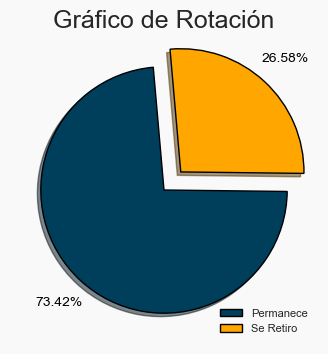

In [25]:
fig,ax=plt.subplots(figsize=(4,4))
fig.set_facecolor("#f9f9f9")
etq =["Permanece","Se Retiro"]
ax.pie(churn,radius=1,startangle=95,shadow=1,explode=(0,0.2),autopct="%1.2f%%",pctdistance=1.25, colors = paleta, 
       textprops={"fontsize":10,"color": "black"},wedgeprops={"edgecolor": "black", "linewidth": 1})
ax.set_title("Gráfico de Rotación",fontsize=18)
plt.legend(loc="lower right", labels=etq,fontsize=8)
plt.show()

### En este gráfico de torta o (Piechart) se puede resumir que el 26% de los clientes terminan abandonando el servicio de la compañía en este trimestre. Se puede Observar que hay desbalanceo entre las dos clases bastante severo.

## - **Análisis de Desnsidad**

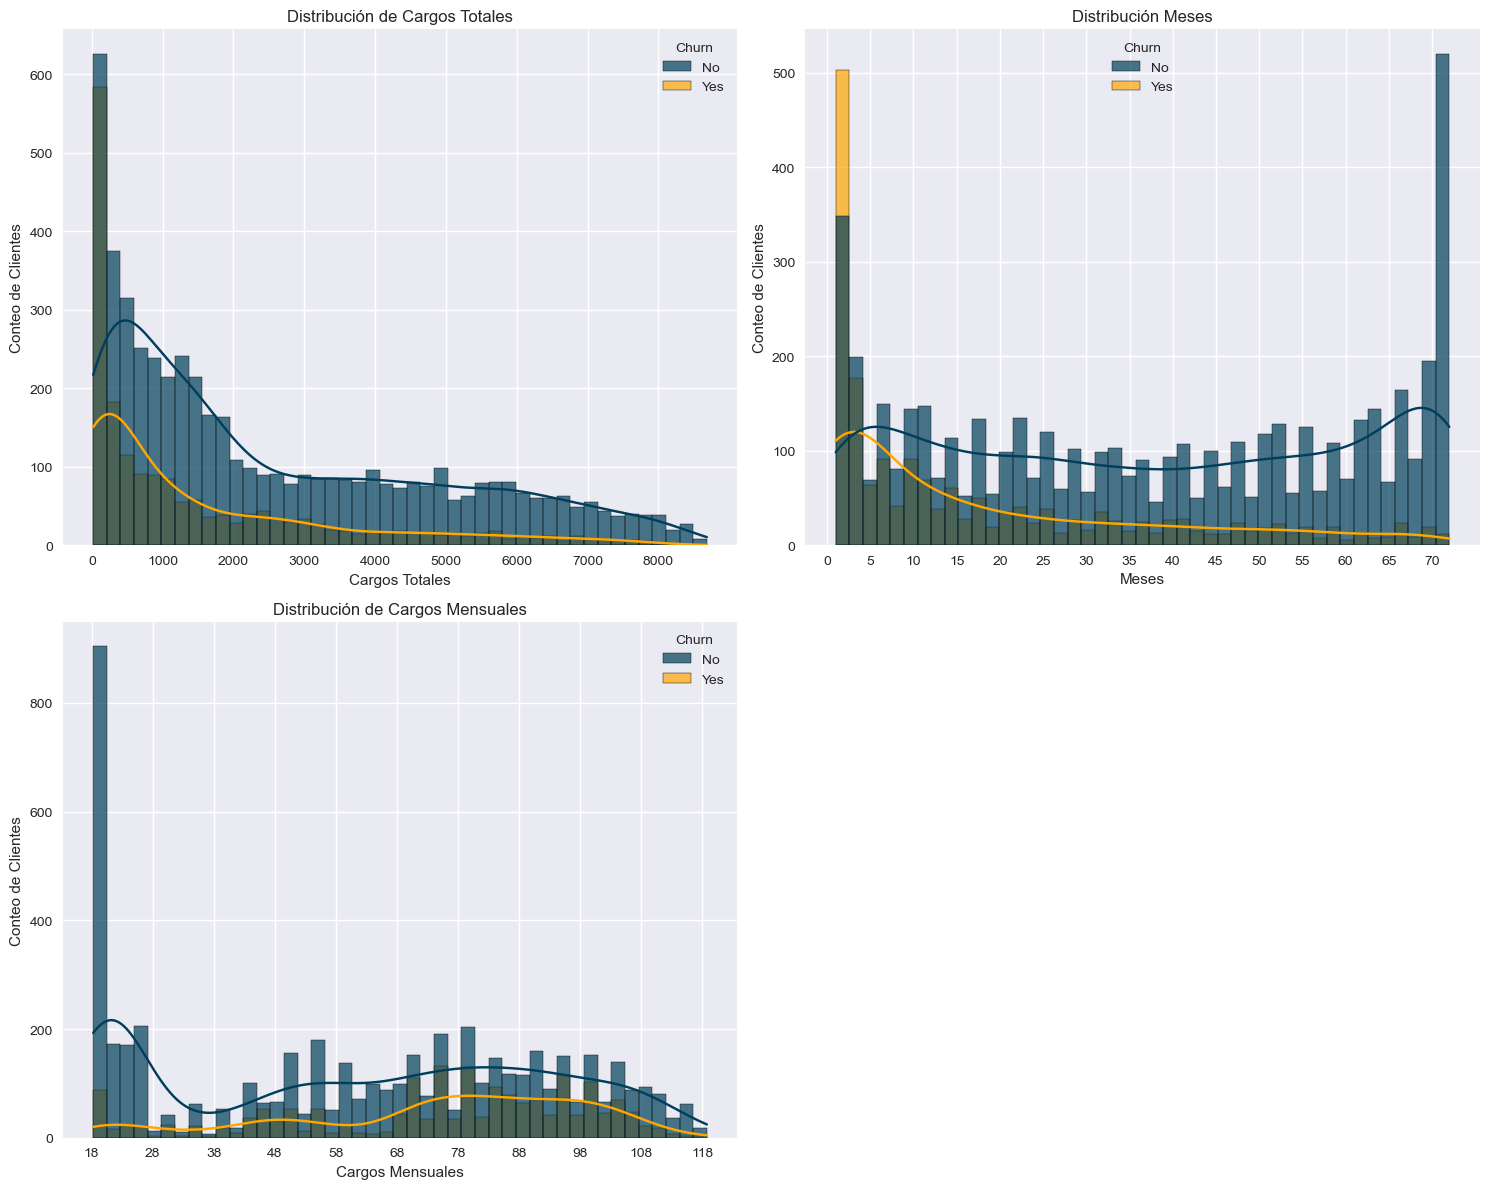

In [26]:
    # Obtener el conteo de valores de Churn
    churn_counts = df["Churn"].value_counts()
    bins1 = np.arange(int(df["MonthlyCharges"].min()),int(df["MonthlyCharges"].max())+4,10)
    plt.figure(figsize=(15, 12))  # Tamaño de la figura (ancho, alto)

    # Primera fila de gráficas: TotalCharges y tenure
    plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, primera posición
    sns.histplot(data=df, x="TotalCharges", kde=True, bins=45, palette=paleta, alpha=.7, hue="Churn")
    plt.xticks(range(0, 8700+2, 1000))
    plt.ylabel("Conteo de Clientes")
    plt.xlabel("Cargos Totales")
    plt.title("Distribución de Cargos Totales")

    plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, segunda posición
    sns.histplot(data=df, x="tenure", kde=True, bins=45, palette=paleta, alpha=.7, hue="Churn")
    plt.xticks(range(0, 72+2, 5))
    plt.ylabel("Conteo de Clientes")
    plt.xlabel("Meses")
    plt.title("Distribución Meses")

    # Segunda fila de gráficas: MonthlyCharges
    plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, tercera posición
    sns.histplot(data=df, x="MonthlyCharges", kde=True, bins=45, palette=paleta, alpha=.7, hue="Churn")
    plt.title("Distribución de Cargos Mensuales")
    plt.ylabel("Conteo de Clientes")
    plt.xlabel("Cargos Mensuales")
    plt.xticks(bins1)
    
    #fig.savefig("histogramas.png", format='png')
    plt.tight_layout()  # Ajustar el espaciado entre las subgráficas
    plt.show()
    

### Realizo el histograma de los cargos mensuales ya que es una variable numerica y ver la frecuencia de los montos que se pagaron mensuales. En este hitograma se evidencia que la gran mayoría de las personas cerca de de 1.200 pagan entre 18 y 21 dolares, luego hay un aumento en el intervalo de 24 a 27 aproximadamente, despues la grafica se mantiene mas pareja y homogenea en los intervalos siguientes,quellas personas que se dieron la baja cual era el cargo mensual para observar algún patrón, en este caso muestra que hay una alta frecuencia de personsa que se dieron la baja del servicio cuyos cargos mensuales eran de 75 Usd y entre 78 y 81. La distribución de los cargos totales parece estar sesgada a la izquierda donde se observa mayor cantidad de agrupación de los datos con cola hacia la derecha, en ambos casos sobre la rotación. De igual manera en la grafica de la distribución por mes de se agrupan los datos hacia la izquierda, esto puede mostrar un patron de los clientes cuando se dan la baja a hacerlo practicamente despues del primer año.

## - **Conteo de Clientes por Género**


### Grafico de Barras Usando Mpl, en este grafico se observa el conteo de los clientes divido por generos, los dos números estan bastante parejos en cuanto a cantidad la empresa tiene la casi la misma cantidad de clientes masculinos con un conteo de 3.555 y femeninos 3.488. Lo realice con la intención de saber si había alguna diferencia muy marcada.

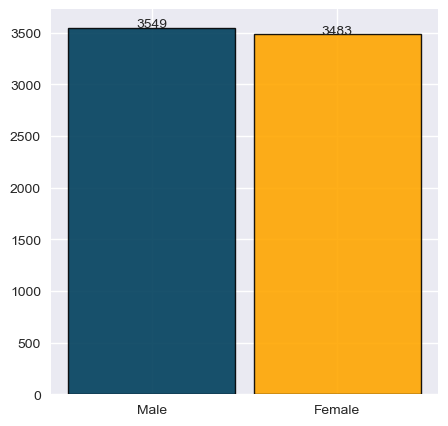

In [27]:
#generos = ["Male", "Female"]
fig,ax = plt.subplots(figsize=(5,5))
plt.bar(g.index,g,color=paleta,width=.9,linewidth=1,edgecolor="black", alpha=0.9)
for i, valor in enumerate(g.values):
    plt.text(i, valor + 0.1, str(valor), ha='center', fontsize=10)
#fig.savefig("Conteo Hombre/Mujer.pdf")
plt.show()

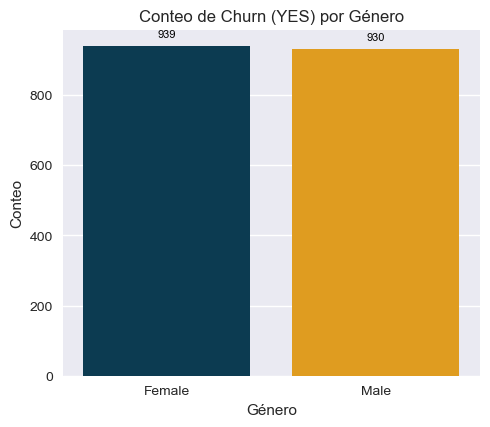

In [28]:
churn_counts = df[df["Churn"] == "Yes"]["gender"].value_counts()
plt.figure(figsize=(5, 4))
ax = sns.barplot(x=churn_counts.index, y=churn_counts, palette=paleta)

# Agregar etiquetas encima de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', 
                fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
#plt.legend(title="Genero", labels=["Hombre", "Mujer"], loc="upper right", fontsize=8)

plt.ylabel("Conteo")
plt.xlabel("Género")
plt.title("Conteo de Churn (YES) por Género")

plt.show()

### Con el filtro anterior se realiza una gráfica de barras para observar si existe una tendencia obvia entre los generos que abandonen la empresa en este caso el conteo es bastante parejo con solo una diferencia de 9 mujeres más que hombres.

## - **Conteo de Clientes por Servicio Segmentado por Churn**

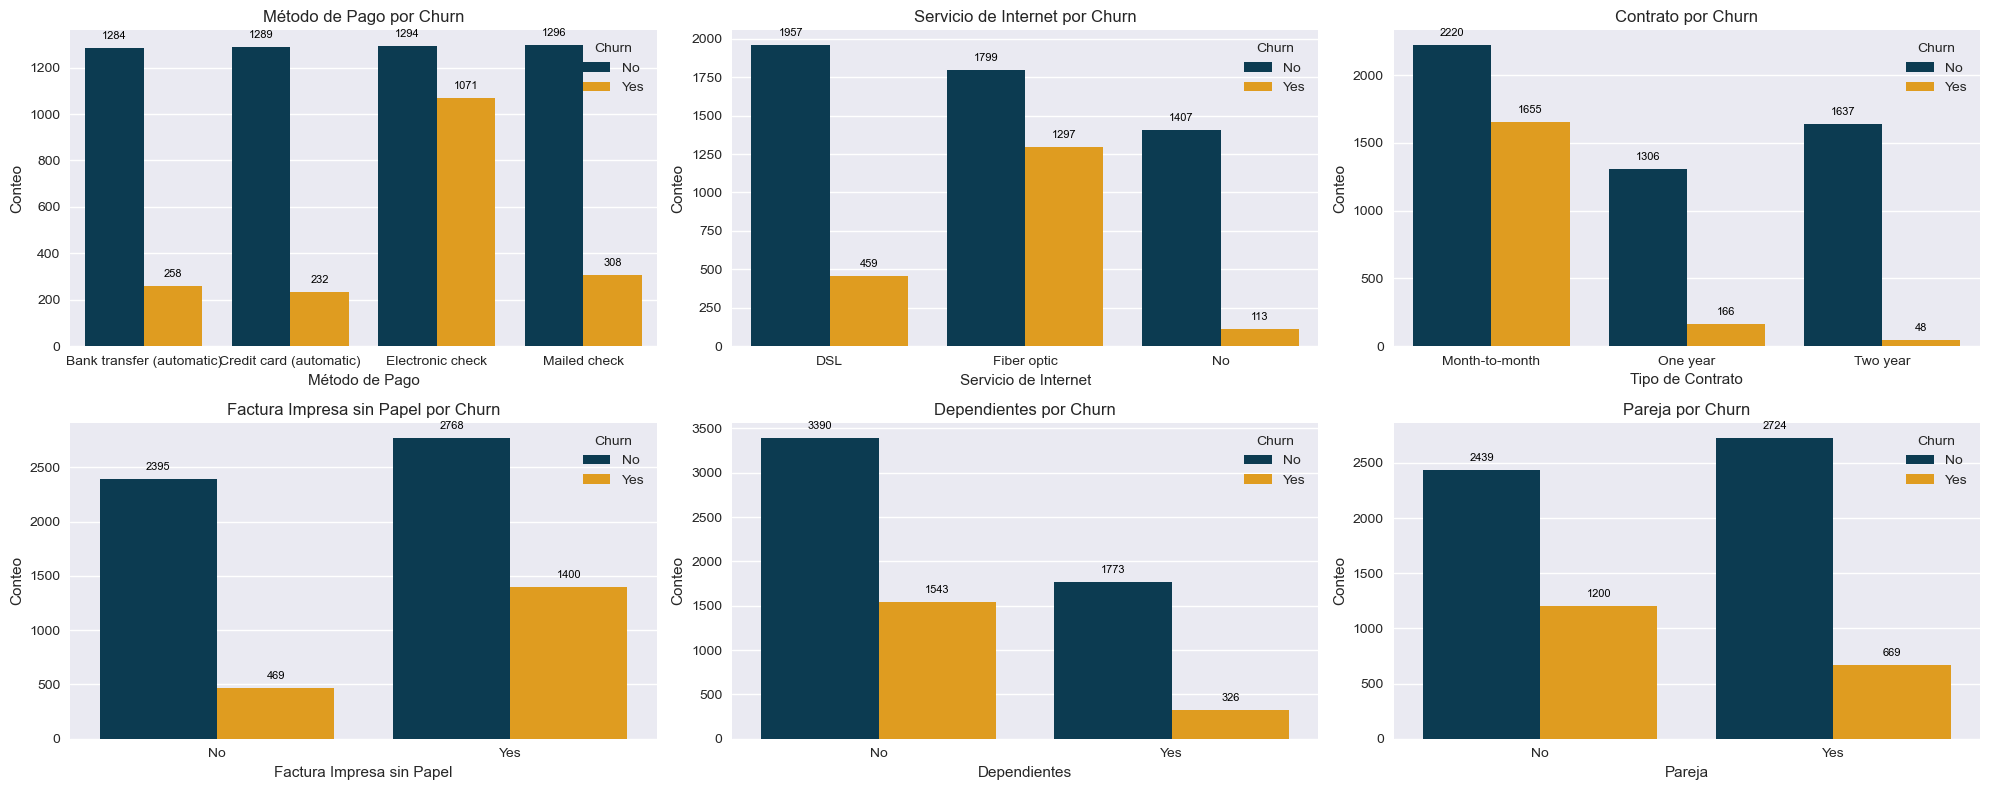

In [29]:
paleta = ["#003f5c", "#ffa600", "#2f4b7c", "#ff7c43", "#665191", "#f95d6a", "#a05195", "#00a1c1"]

# Crear una figura con 2 filas y 3 columnas de subgráficos
fig, axs = plt.subplots(2, 3, figsize=(20, 8))

# Gráfico 1
sns.countplot(data=df, x="PaymentMethod", linewidth=1, palette=paleta, hue="Churn", ax=axs[0, 0])
axs[0, 0].set_ylabel("Conteo")
axs[0, 0].set_xlabel("Método de Pago")
axs[0, 0].set_title("Método de Pago por Churn")
for p in axs[0, 0].patches:
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2
    axs[0, 0].annotate(f'{int(height)}', (width, height), ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

# Gráfico 2
sns.countplot(data=df, x="InternetService", linewidth=1, palette=paleta, hue="Churn", ax=axs[0, 1])
axs[0, 1].set_ylabel("Conteo")
axs[0, 1].set_xlabel("Servicio de Internet")
axs[0, 1].set_title("Servicio de Internet por Churn")
for p in axs[0, 1].patches:
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2
    axs[0, 1].annotate(f'{int(height)}', (width, height), ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

# Gráfico 3
sns.countplot(data=df, x="Contract", linewidth=1, palette=paleta, hue="Churn", ax=axs[0, 2])
axs[0, 2].set_ylabel("Conteo")
axs[0, 2].set_xlabel("Tipo de Contrato")
axs[0, 2].set_title("Contrato por Churn")
for p in axs[0, 2].patches:
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2
    axs[0, 2].annotate(f'{int(height)}', (width, height), ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

# Gráfico 4
sns.countplot(data=df, x="PaperlessBilling", linewidth=1, palette=paleta, hue="Churn", ax=axs[1, 0])
axs[1, 0].set_ylabel("Conteo")
axs[1, 0].set_xlabel("Factura Impresa sin Papel")
axs[1, 0].set_title("Factura Impresa sin Papel por Churn")
for p in axs[1, 0].patches:
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2
    axs[1, 0].annotate(f'{int(height)}', (width, height), ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

# Gráfico 5
sns.countplot(data=df, x="Dependents", linewidth=1, palette=paleta, hue="Churn", ax=axs[1, 1])
axs[1, 1].set_ylabel("Conteo")
axs[1, 1].set_xlabel("Dependientes")
axs[1, 1].set_title("Dependientes por Churn")
for p in axs[1, 1].patches:
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2
    axs[1, 1].annotate(f'{int(height)}', (width, height), ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

# Gráfico 6
sns.countplot(data=df, x="Partner", linewidth=1, palette=paleta, hue="Churn", ax=axs[1, 2])
axs[1, 2].set_ylabel("Conteo")
axs[1, 2].set_xlabel("Pareja")
axs[1, 2].set_title("Pareja por Churn")
for p in axs[1, 2].patches:
    height = p.get_height()
    width = p.get_x() + p.get_width() / 2
    axs[1, 2].annotate(f'{int(height)}', (width, height), ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### En base al conteo de los valores anteriores quiero evaluar que tipo de métodos de pago es el más utilizad por los clientes, en el grafico de barras (Countplot) muestra que la mayor cantidad de personas (MODA) paga el servicio a través de cheque electrónico. Hay una clara tendencia de los clientes que realizan pagos por transferencia bancaria y pago por tarjeta de crédito a darse menos la baja.

### Como se ve en el gráfico se observa que hay una preferencia de los clientes pro el servicio de internet de DSL, sobre el la fibra optica como mencione en las conclusiones de analisis descriptivo, y hay una clara tendencia de los que tuvieron el servicio de fibra optica de un total de 1.869 persona que se dieron la baja 1.297 tenian este servicio.

### En este grafico se observa que las personas realizaron contratos de mes a mes se dieron la baja, el que tiene menos es el contrato a 2 años. Pareciera ser que este tipo de contratos a dos años es menos sensible a las bajas.

### Los clientes más propensos a darse la baja no recibian la factura impresa quizá optaron por recibirla elétronicamente, esto puede facilitar el cambio de proveedor ya que estos clientes pueden estar mas familiarizados con el uso de internet donde pueden hacer comparaciones contractuales. También se aprecia que los clientes que no tuvieron dependientes ni pareja tienden a darse la baja. 

## - **Conteo de Clientes por Estatus Jubilatorio Segmentado por Churn**

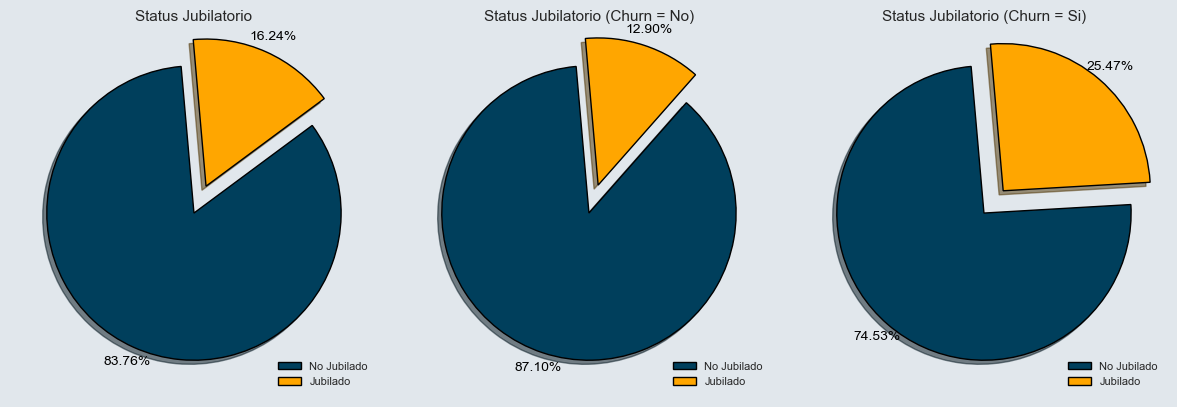

In [30]:
sty = ("seaborn-v0_8")
mp.style.use(sty)
zzz = df[df["Churn"] == "No"]["SeniorCitizen"].value_counts()
xxx = df[df["Churn"] == "Yes"]["SeniorCitizen"].value_counts()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.set_facecolor("#e1e7ec")
etq = ["No Jubilado", "Jubilado"]

# Gráfico 1 - Status Jubilatorio
ax1.pie(senior_counts, radius=1, startangle=95, shadow=1, explode=(0, 0.2),
        autopct="%1.2f%%",pctdistance=1.11, colors=paleta, textprops={"fontsize": 10, "color": "black"},
        wedgeprops={"edgecolor": "black", "linewidth": 1})
ax1.set_title("Status Jubilatorio", fontsize=11)
ax1.legend(loc="lower right", labels=etq, fontsize=8)

# Gráfico 2 - Churn = No
ax2.pie(zzz, radius=1, startangle=95, shadow=1, explode=(0, 0.2),
        autopct="%1.2f%%",pctdistance=1.11, colors=paleta, textprops={"fontsize": 10, "color": "black"},
        wedgeprops={"edgecolor": "black", "linewidth": 1})
ax2.set_title("Status Jubilatorio (Churn = No)", fontsize=11)
ax2.legend(loc="lower right", labels=etq, fontsize=8)

# Gráfico 3 - Churn = Yes
ax3.pie(xxx, radius=1, startangle=95, shadow=1, explode=(0, 0.2),
        autopct="%1.2f%%",pctdistance=1.11, colors=paleta, textprops={"fontsize": 10, "color": "black"},
        wedgeprops={"edgecolor": "black", "linewidth": 1})
ax3.set_title("Status Jubilatorio (Churn = Si)", fontsize=11)
ax3.legend(loc="lower right", labels=etq, fontsize=8)

plt.tight_layout()
plt.show()

#### 1 .- En los graficos de torta (PieChart) se interpreta que del total de datos en el primer grafico el 83% son no jubilados, y el 16%.

#### 2 .- El segundo gráfico muestra el procentaje de No jubilados en un 87% y el Jubilado en 12% que consevro el servicio.

#### 3 .- En el tercer gráfico si se observa una mayor porción que si se dió la baja en los Jubilados en comparación con los no Jubilados.

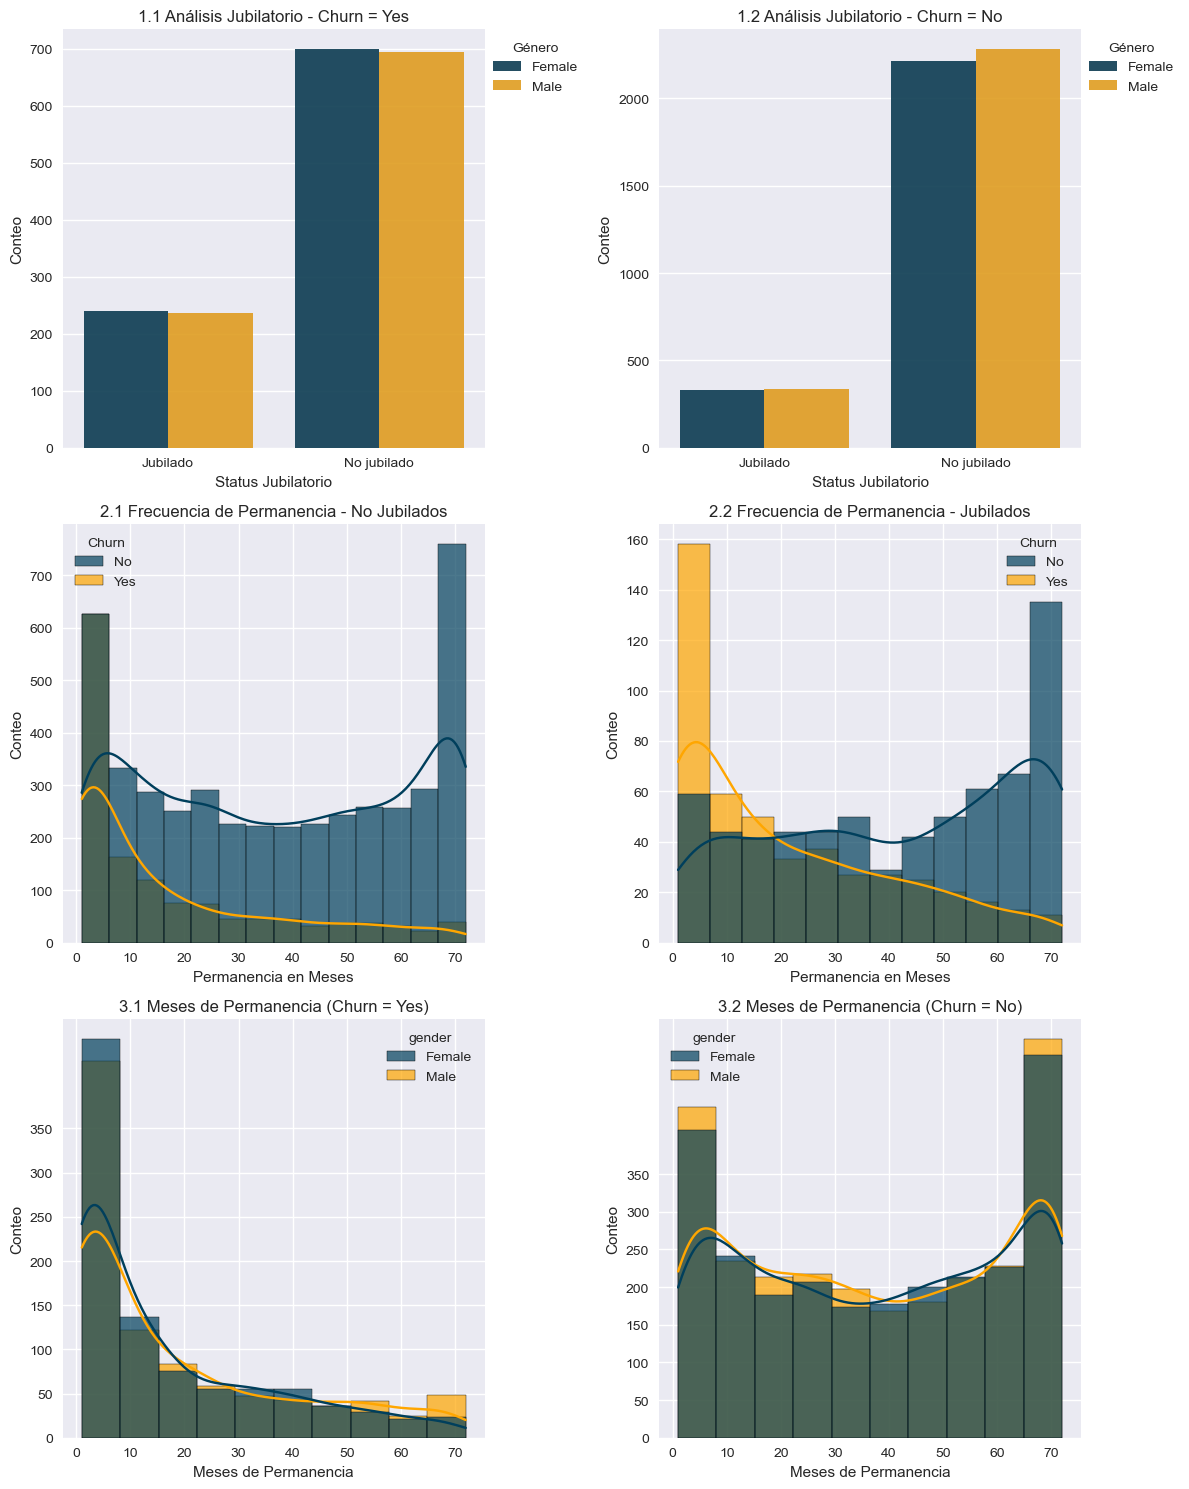

In [31]:
churn_no_data = df[df["Churn"] == "No"]
churn_yes_data = df[df["Churn"] == "Yes"]

df["SeniorCitizen"].replace({"Jubilado":1, "No jubilado": 0}, inplace=True)
njub_data = df["SeniorCitizen"].value_counts()[0]
sjub_data = df["SeniorCitizen"].value_counts()[1]
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Subplot 1 - Countplot para churn_yes_data
ax1 = axes[0, 0]
sns.countplot(data=churn_yes_data, x="SeniorCitizen", alpha=0.9, hue="gender", ax=ax1, palette=paleta)
ax1.set_xlabel("Status Jubilatorio")
ax1.set_ylabel("Conteo")
ax1.set_title("1.1 Análisis Jubilatorio - Churn = Yes")
ax1.legend(title="Género", loc="upper right", bbox_to_anchor=(1.25, 1))

# Subplot 2 - Countplot para churn_no_data
ax2 = axes[0, 1]
sns.countplot(data=churn_no_data, x="SeniorCitizen", alpha=0.9, hue="gender", ax=ax2, palette=paleta)
ax2.set_xlabel("Status Jubilatorio")
ax2.set_ylabel("Conteo")
ax2.set_title("1.2 Análisis Jubilatorio - Churn = No")
ax2.legend(title="Género", loc="upper right", bbox_to_anchor=(1.25, 1))

# Subplot 3 - Histograma para njub_data
ax3 = axes[1, 0]
sns.histplot(data=df[df["SeniorCitizen"] == 0], x="tenure", kde=True, alpha=0.7, palette=paleta,#{"Yes": "#de425b", "No": "#004c6d"}
             hue="Churn", ax=ax3)
ax3.set_ylabel("Conteo")
ax3.set_xlabel("Permanencia en Meses")
ax3.set_title("2.1 Frecuencia de Permanencia - No Jubilados")

# Subplot 4 - Histograma para sjub_data
ax4 = axes[1, 1]
sns.histplot(data=df[df["SeniorCitizen"] == 1], x="tenure", kde=True, alpha=0.7, palette=paleta,#{"Yes": "#de425b", "No": "#004c6d"},
             hue="Churn", ax=ax4)
ax4.set_ylabel("Conteo")
ax4.set_xlabel("Permanencia en Meses")
ax4.set_title("2.2 Frecuencia de Permanencia - Jubilados")

# Subplot 5 - Histograma para churn_yes_data
ax5 = axes[2, 0]
sns.histplot(data=churn_yes_data, x="tenure", bins=10, kde=True, palette=paleta, #{"Male": "#de425b", "Female": "#004c6d"},
             alpha=0.7, hue="gender", ax=ax5)
ax5.set_xlabel("Meses de Permanencia")
ax5.set_ylabel("Conteo")
ax5.set_title("3.1 Meses de Permanencia (Churn = Yes)")
ax5.set_yticks(range(0, 350+1, 50))

# Subplot 6 - Histograma para churn_no_data
ax6 = axes[2, 1]
sns.histplot(data=churn_no_data, x="tenure", bins=10, kde=True, palette=paleta,#{"Male": "#de425b", "Female": "#004c6d"},
             alpha=0.7, hue="gender", ax=ax6)
ax6.set_xlabel("Meses de Permanencia")
ax6.set_ylabel("Conteo")
ax6.set_title("3.2 Meses de Permanencia (Churn = No)")
ax6.set_yticks(range(0, 350+1, 50))

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### - En los primeros graficos de conteo se realiza un análisis sobre el conteo de los Jubilados y no Jubilados segementado por genero para evaluar si existe alguna tendencia se observa un conteo parejo entre los generos sin embargo en el grafico de la izquierda que representa las personas que abandonaron el servicio el conteo para los no jubilados es casi de 700 personas bastante parejo en comparación con los jubilados que suman cerca de 200 personas bastante parejo en cuanto a los generos. 

### - En los graficos Histplots donde se segmento por cantidad de meses los que se dan la baja segmentado por estatus jubilatorio, la curva cuando se dan la baja es una distribuición con cola hacia la derecha se ve que los primeros 15 meses las personas tienden a darse la baja, es donde mas se acumulan las frecuencias.

### - En los siguientes Histplots evaluo la frecuencia de bajas del servicio esta vez por genero, en el grafico de la izquierda se observa la misma tendencia que los Histplots anteriores la tendencia es que las 15 meses abandonen el servicio hay una pequeña diferencia entre las mujeres las cuales al parecer tienen un poco de mayor frecuencia, la mayor cantidad de los datos esan sesgados hacia la izquierda la distribuición tiene cola hacia la derecha, en el grafico de la derecha cuando no hubo abandono los datos estan agurpados hacia los extremos esto puede implicar que la mayor parte de contratos se hacen ebtre 0 y 10 meses y las renovaciones a partir de los 60 - 70 meses, me parece que estos contratos se hicieron a 5 años

### - Los datos muestran un conteo de clientes que da 1.869 (Churn = Yes) 26 % del total y los que permanecen 5.174; 76% del total (Churn = No), no hay una clara tendencia en cuanto al genero este dió 939 mujeres dadas de baja y 930 hombres que se dieron la baja. De igual manera cuando se evaluó por estatus jubilatorio no se observa tendencias marcadas por genero mas si por el estatus (Jubilado/No jubilado), de las personas que se dieron la baja del servicio 17.97 meses en promedio casi año y medio, pagaban en promedio mensual 74.44 $, manteniendo como moda el contrato mes a mes y metodo de pago cheque electronico. Tambien se ve que hay una propencion de las mujeres a darse la baja del servicio sin embargo esta diferencia no es muy significativa.

## - **Análisis Gráfico de Dispersión segmentado por CHURN**
- Variables Numéricas

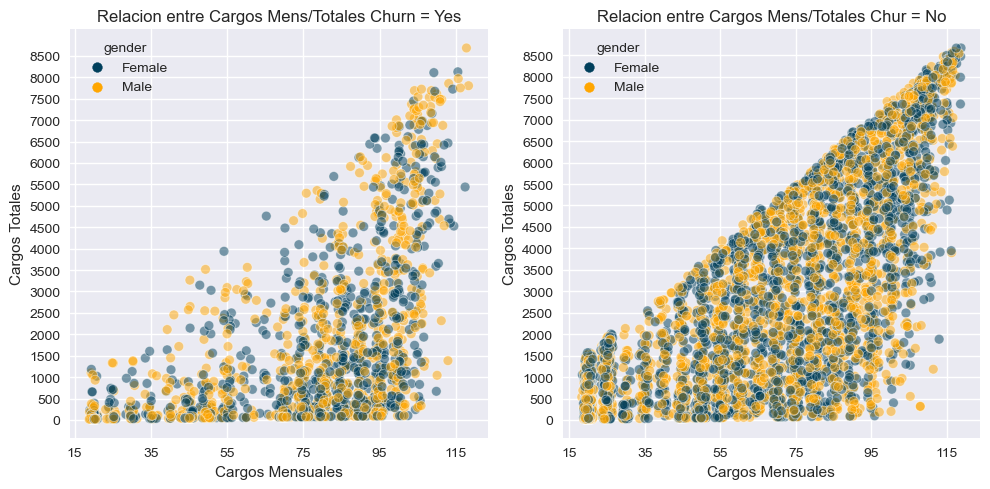

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=churn_yes_data, x="MonthlyCharges", y="TotalCharges", hue="gender", palette=paleta, alpha=0.5, ax=ax1)
ax1.set_xlabel("Cargos Mensuales")
ax1.set_ylabel("Cargos Totales")
ax1.set_title("Relacion entre Cargos Mens/Totales Churn = Yes")
ax1.set_xticks(range(15, 120+1, 20))
ax1.set_yticks(range(0, 9000, 500))

sns.scatterplot(data=churn_no_data, x="MonthlyCharges", y="TotalCharges", hue="gender", palette=paleta, alpha=0.5, ax=ax2)
ax2.set_xlabel("Cargos Mensuales")
ax2.set_ylabel("Cargos Totales")
ax2.set_title("Relacion entre Cargos Mens/Totales Chur = No")
ax2.set_xticks(range(15, 120+1, 20))
ax2.set_yticks(range(0, 9000, 500))
plt.tight_layout()
#fig.savefig("DISPERSIón.png", format='png')
plt.show()

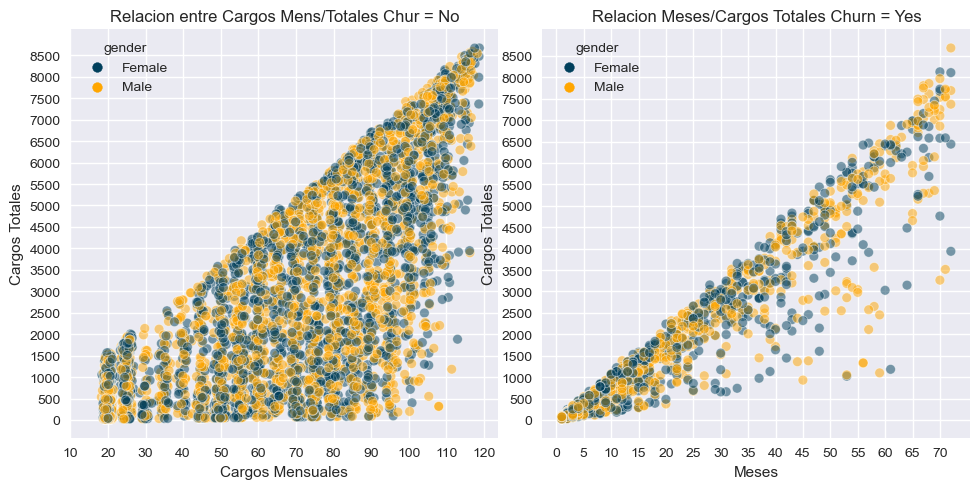

In [33]:
ig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(data=churn_no_data, x="MonthlyCharges", y="TotalCharges", hue="gender", palette=paleta, alpha=0.5, ax=ax1)
ax1.set_xlabel("Cargos Mensuales")
ax1.set_ylabel("Cargos Totales")
ax1.set_title("Relacion entre Cargos Mens/Totales Chur = No")
ax1.set_xticks(range(10, 120+1, 10))
ax1.set_yticks(range(0, 9000, 500))
plt.tight_layout()
sns.scatterplot(data=churn_yes_data, x="tenure", y="TotalCharges", hue="gender", palette=paleta, alpha=0.5, ax=ax2)
ax2.set_xlabel("Meses")
ax2.set_ylabel("Cargos Totales")
ax2.set_title("Relacion Meses/Cargos Totales Churn = Yes")
ax2.set_xticks(range(0, 72+1, 5))
ax2.set_yticks(range(0, 9000, 500))
#fig.savefig("DISPERSIón2.png", format='png')
plt.show()

### En este gráfico de puntos se evidencia una pendiente positiva ascendnte lo que muestra que las personas cuanto mas pagaban al mes mayor es el importe trimestral, queria evaluar como se comportaban las variables númerica se los cargos totales y los cargos mensuales de los hombre y mujeres que se dieron la baja del servicio. Adicional a esto se observa que existe una fuerte relacion lineal se observa sobre todo cuando en la grafica que compara cargos totales con los meses. 

## - **Análisis Gráfico de Correlación**

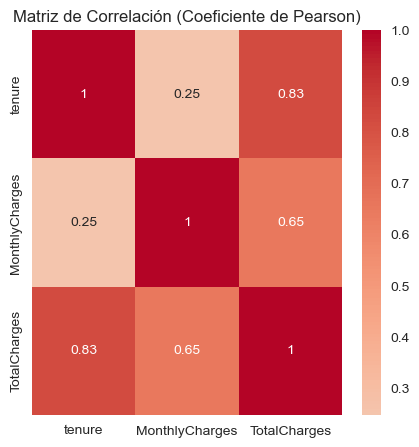

Coeficientes de Correlación:
tenure vs TotalCharges: 82.59%
MonthlyCharges vs TotalCharges: 65.11%
TotalCharges vs tenure: 82.59%
TotalCharges vs MonthlyCharges: 65.11%


In [34]:
columnas_numericas = df[["tenure", "MonthlyCharges", "TotalCharges"]]

# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()

# Crear el heatmap de correlación
plt.figure(figsize=(5, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación (Coeficiente de Pearson)")
plt.show()

# Imprimir coeficientes de correlación mayores al 0.60
print("Coeficientes de Correlación:")
for col1 in matriz_correlacion.columns:
    for col2 in matriz_correlacion.columns:
        if col1 != col2:
            coeficiente = matriz_correlacion.loc[col1, col2]
            if coeficiente > 0.60:
                coeficiente_porcentaje = coeficiente * 100
                print(f"{col1} vs {col2}: {coeficiente_porcentaje:.2f}%")

### --> Se observa fuerte relación lineal con tenure y monthlycharges


<a id="Análisis-de-Outliers"></a>

<div style="padding: 24px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px;">7. Análisis de Outliers</span>
</div>

[Volver al Indice](#indi)

## - **Anáñisis de Outliers Z-Score**

In [35]:
df["tenureZ"] = (df["tenure"]-df["tenure"].mean())/df["tenure"].std()
df["MonthlyChargesZ"] = (df["MonthlyCharges"]-df["MonthlyCharges"].mean())/df["MonthlyCharges"].std()
df["TotalChargesZ"] =(df["TotalCharges"]-df["TotalCharges"].mean())/df["TotalCharges"].std()

df["tenureZ_Out"] = 0
df.loc[(df["tenureZ"] < - 3)|(df["tenureZ"] > 3), "tenureZ_Out"] = 1
#df[["tenure","tenureZ","tenureZ_Out"]]

df["MonthlyChargesZ_Out"] = 0
df.loc[(df["MonthlyChargesZ"] < - 3)|(df["MonthlyChargesZ"] > 3), "MonthlyChargesZ_Out"] = 1

df["TotalChargesZ_out"] = 0
df.loc[(df["TotalChargesZ"] < - 3)|(df["TotalChargesZ"] > 3), "TotalChargesZ_out"] = 1


print(df["tenureZ_Out"].value_counts())
print(df["MonthlyChargesZ_Out"].value_counts())
print(df["TotalChargesZ_out"].value_counts())

0    7032
Name: tenureZ_Out, dtype: int64
0    7032
Name: MonthlyChargesZ_Out, dtype: int64
0    7032
Name: TotalChargesZ_out, dtype: int64


## - **Anáñisis de Outliers Por Rango Intercuartilico**

In [36]:
q1 = np.percentile(df["tenure"],25)
q3 = np.percentile(df["tenure"],75)
iqr = q3 - q1
limit_inf = q1 - 1.5 * iqr
limit_sup = q3 + 1.5 * iqr
tenure_out = df[(df["tenure"] < limit_inf) | (df["tenure"] > limit_sup)]
tenure_out
#fig, ax = plt.subplots(1, 3, figsize=(15, 5))


#ax[0].hist(df["tenureZ"], bins=30, edgecolor='k')
#ax[0].set_xlabel("Valor Z-score")
#ax[0].set_ylabel("Frecuencia")
#ax[0].set_title("Histograma de tenureZ")


#ax[1].hist(df["MonthlyChargesZ"], bins=30, edgecolor='k')
#ax[1].set_xlabel("Valor Z-score")
#ax[1].set_ylabel("Frecuencia")
#ax[1].set_title("Histograma de MonthlyChargesZ")


#ax[2].hist(df["TotalChargesZ"], bins=30, edgecolor='k')
#ax[2].set_xlabel("Valor Z-score")
#ax[2].set_ylabel("Frecuencia")
#ax[2].set_title("Histograma de TotalChargesZ")
#plt.tight_layout()
#plt.show()

Empty DataFrame
Columns: [index, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, tenureZ, MonthlyChargesZ, TotalChargesZ, tenureZ_Out, MonthlyChargesZ_Out, TotalChargesZ_out]
Index: []

[0 rows x 27 columns]

In [37]:
q1 = np.percentile(df["MonthlyCharges"], 25)
q3 = np.percentile(df["MonthlyCharges"], 75)
iqr = q3 -q1
limit_inf = q1 - 1.5 * iqr
limit_sup = q3 + 1.5 * iqr
MonthlyCharges_out = df[(df["MonthlyCharges"] < limit_inf) | (df["MonthlyCharges"] > limit_sup)]
MonthlyCharges_out

Empty DataFrame
Columns: [index, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, tenureZ, MonthlyChargesZ, TotalChargesZ, tenureZ_Out, MonthlyChargesZ_Out, TotalChargesZ_out]
Index: []

[0 rows x 27 columns]

In [38]:
q1 = np.percentile(df["TotalCharges"], 25)
q3 = np.percentile(df["TotalCharges"], 75)
iqr = q3 -q1
limit_inf = q1 - 1.5 * iqr
limit_sup = q3 + 1.5 * iqr
TotalCharges_out = df[(df["TotalCharges"] < limit_inf) | (df["TotalCharges"] > limit_sup)]
TotalCharges_out

Empty DataFrame
Columns: [index, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, tenureZ, MonthlyChargesZ, TotalChargesZ, tenureZ_Out, MonthlyChargesZ_Out, TotalChargesZ_out]
Index: []

[0 rows x 27 columns]

### Se calcula el Rango intercuartilico tampoco se evidencia valores outliers
### Se verifican estandirando los valores llevandolos a valores Z usando este método no se evidencia valores Outliers
### A continuación se realizan Boxplots para evaluar de manera gráfica si existen valores Outliers.

## - **Anáñisis Gráfico de Outliers** (BOXPLOT)

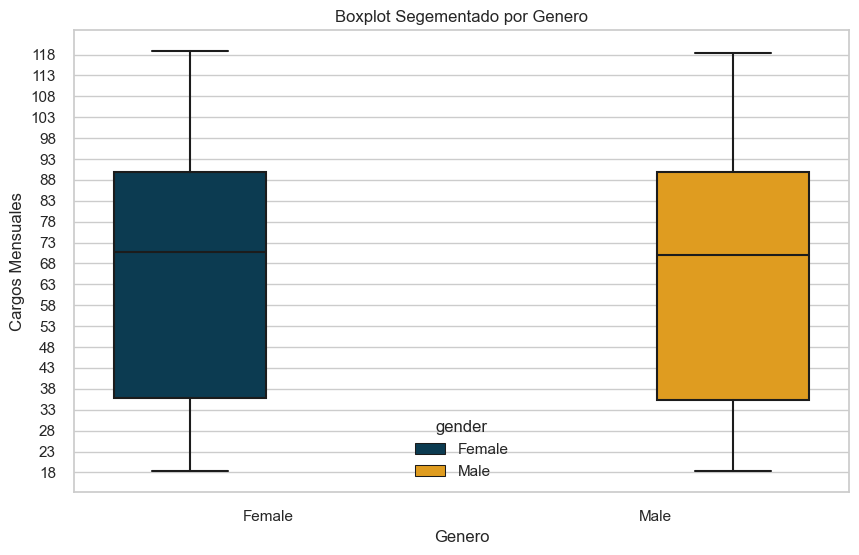

In [39]:
bins3 = np.arange((int(df["MonthlyCharges"].min())),(int(df["MonthlyCharges"].max()+4)),5)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="gender", y="MonthlyCharges", hue="gender", palette = paleta,showfliers=True)
plt.yticks(bins3)
plt.title("Boxplot Segementado por Genero")
plt.xlabel("Genero")
plt.ylabel("Cargos Mensuales")
#fig.savefig("Box1.png", format='png')
plt.show()

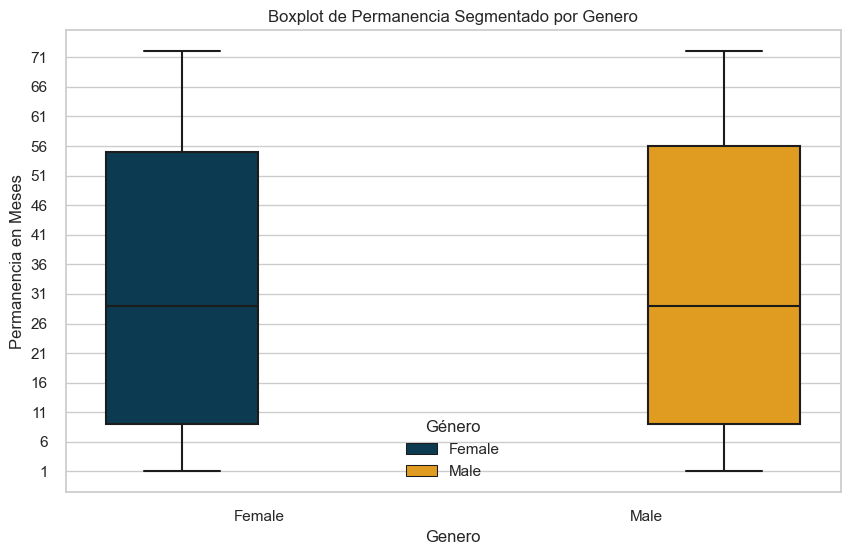

In [40]:
bins2= np.arange((df["tenure"].min()),(df["tenure"].max()),5)
bins2
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="gender", y="tenure", hue="gender", palette=paleta,showfliers=True)
plt.title("Boxplot de Permanencia Segmentado por Genero")
plt.xlabel("Genero")
plt.ylabel("Permanencia en Meses")
plt.yticks(bins2)
plt.legend(title="Género")
#fig.savefig("Box2.png", format='png')
plt.show()

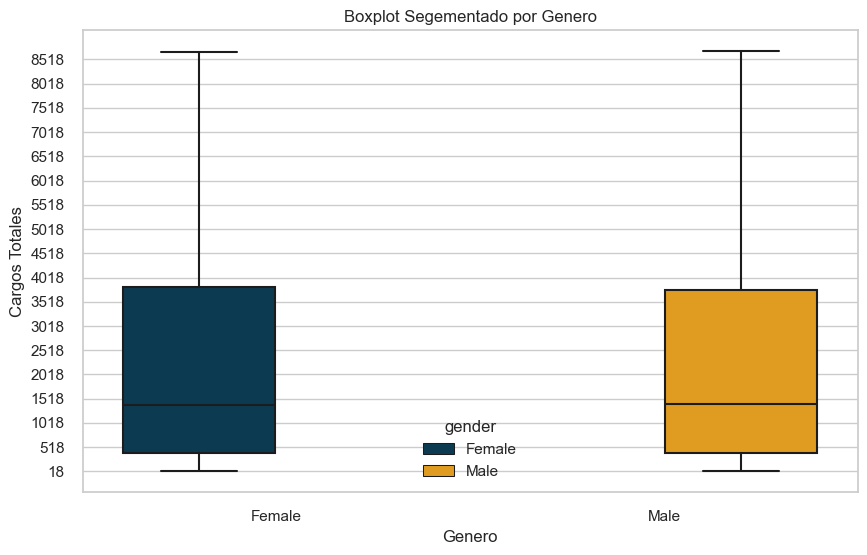

In [41]:
bins3 = np.arange((int(df["TotalCharges"].min())),(int(df["TotalCharges"].max()+4)),500)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="gender", y="TotalCharges", hue="gender", palette = paleta,showfliers=True)
plt.yticks(bins3)
plt.title("Boxplot Segementado por Genero")
plt.xlabel("Genero")
plt.ylabel("Cargos Totales")
#fig.savefig("Box3.png", format='png')
plt.show()

### con estos Boxplot no se observan outliers al parecer. 
### Se verifican valores unicos del Dataframe por Columna se identifica el ID, el Tenure que hace refencia a los meses que los clientes han estado en el servicio, MonthlyCharges, TotalCharges estos ultimos hacen referencia al costo que paga cada cliente por mes y lo que pagan en total. 
### Se eliminan los datos ausentes, decidi eliminar de momento los valores NAN que estaban apareciendo en la columna TotalCharges, **resulta complicado imputar esos datos con una regresión lineal ya que por ejemplo en esos registros los valores de tenure son 0**, esto recordando la fuerte correlación de estas dos variables.
### También se eliminana las columnas donde se transforman los valores Z para identificar los valores Outliers.

<a id="Feature-Engineering"></a>

<div style="padding: 24px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px;">8. Feature Engineering</span>
</div>

### La Feature Engineering es un proceso crucial en el campo del machine learning que implica la creación y transformación de variables (o características) para mejorar el rendimiento de los modelos predictivos. Su objetivo principal es proporcionar al modelo información más relevante y significativa, lo que puede resultar en una mejora sustancial en la precisión y eficacia del modelo.

[Volver al Indice](#indi)

## - **Feature Encoding**

### En el siguiente procedimiento separo las columnas categoricas de las numericas, también antes de pasar elimino la columna TOTAL CHARGES, este procedimiento hace referencia a que como se vió en **el análisis de correlación de pearson de variables numéricas entre Tenure y TotalCharges hay una alta correlación del 0.83, para evitar la multicolinealidad** en el entramiento de los modelos de clasificación se decidió eliminar esta variable independiente. 

In [42]:
#df
df.drop(["tenureZ","MonthlyChargesZ","TotalChargesZ","tenureZ_Out","MonthlyChargesZ_Out","TotalChargesZ_out","TotalCharges"], axis = 1, inplace=True)
#df.columns
for col in df.columns:
    print(f"{col} = {df[col].nunique()}")

index = 7032
gender = 2
SeniorCitizen = 2
Partner = 2
Dependents = 2
tenure = 72
PhoneService = 2
MultipleLines = 3
InternetService = 3
OnlineSecurity = 3
OnlineBackup = 3
DeviceProtection = 3
TechSupport = 3
StreamingTV = 3
StreamingMovies = 3
Contract = 3
PaperlessBilling = 2
PaymentMethod = 4
MonthlyCharges = 1584
Churn = 2


In [43]:
escalador = StandardScaler()
minmax = MinMaxScaler()
cat = []
num = []

for col in df.columns:
    tipo = df[col].dtype
    if tipo == "object":
        cat.append(col)
    elif tipo == "int64" or tipo == "float64":
        num.append(col)
num.pop(0)  # Se elimina SeniorCitizen ya que esta es una variable categorica
#num.pop(2)  # se elimina el Cargos Totales
#cat.pop(0)  # Se elimina el CustomerID
#cat.pop(-1)  # Se elimina el Chrun
cat.append("SeniorCitizen")
num.append("tenure")

print(f"Variables Categoricas: {cat}")
print(f"Variables Numéricas: {num}")

Variables Categoricas: ['SeniorCitizen']
Variables Numéricas: ['tenure', 'MonthlyCharges', 'tenure']


## - **Label Encoding y OneHotEncoding**

### A continuación se guardan en variables aquellos que tienen 2 y mas de 2 de forma para separada para usar los metodos de "one hot encoding" y "label encoding" esta ultima para evitar aumentar la dimensionalidad

In [44]:
#label encoding
le = []
ohe3 = []
#ohe4 = []

for col in df.columns:
    valoresunicos = df[col].nunique()
    if valoresunicos <= 2: 
        le.append(col)
    elif valoresunicos >= 3:
        ohe3.append(col)
    #elif valoresunicos == 4:
        #ohe4.append(col)
le.pop(-1) # elimino churn
#ohe3.pop(0) # elimino el Index
ohe3.pop(0) # elimino el tenure que se me colo. 
print(f" 1 .- Columnas para label encoding: {le}")
print(f" 2 .- Columnas para OneHotEncoding: {ohe3}")

 1 .- Columnas para label encoding: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
 2 .- Columnas para OneHotEncoding: ['tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges']


In [45]:
labelen = LabelEncoder()
for col in le:
    df[col] = labelen.fit_transform(df[col])
#df[le]
#df_varnum  = df[num]
#x = pd.concat([df_varnum, df[le],df_modified], axis=1)
#x.dropna(inplace=True) 
#x = x.loc[:, ~x.columns.duplicated()]
#xcopy = x.copy()
#xcopy.head()


# OneHotEncoding
ohenc = OneHotEncoder(handle_unknown='ignore', sparse=False)
column_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
              'StreamingMovies', 'Contract', 'PaymentMethod']
ohe3_codificadas = ohenc.fit_transform(df[column_cat])  # se aplica el Onehot encoder
ohe3_df = pd.DataFrame(ohe3_codificadas, columns=ohenc.get_feature_names_out(column_cat)) #se crea el df
df_codificado = pd.concat([df, ohe3_df,df[le]], axis=1) # concateno los datos decodificados
df_codificado.drop(columns=column_cat, inplace=True) # elimino las columnas duplicadas pero de ohe3
df_codificado.drop("index", axis=1, inplace=True) #elimino el indice
pd.set_option('display.max_columns', None) # se establece para ver todas las columnas
df_codificado = df_codificado.loc[:, ~df_codificado.columns.duplicated()] # Saco las columnas duplicadas por variable le[]
#df_codificado.index
df_codificado

# Se copia el df a df_mca_ para su uso posterior
df_mca_=df_codificado.copy()
df_codificado

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7027       1              0        1           1      24             1   
7028       0              0        1           1      72             1   
7029       0              0        1           1      11             0   
7030       1              1        1           0       4             1   
7031       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges Churn  MultipleLines_No  \
0                    1           29.85    No               0.0   
1                    0           56.95    No               1.0   
2                    1           53.85   Yes               1.0   
3                    0           42.30    No               0.0   
4                    1           70.70   Yes               1.0   
...                ...             ...   ...               ...   
7027                 1           84.80    No               0.0   
7028                 1          103.20    No               0.0   
7029                 1           29.60    No               0.0   
7030                 1           74.40   Yes               0.0   
7031                 1          105.65    No               1.0   

      MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                                1.0                0.0                  1.0   
1                                0.0                0.0                  1.0   
2                                0.0                0.0                  1.0   
3                                1.0                0.0                  1.0   
4                                0.0                0.0                  0.0   
...                              ...                ...                  ...   
7027                             0.0                1.0                  1.0   
7028                             0.0                1.0                  0.0   
7029                             1.0                0.0                  1.0   
7030                             0.0                1.0                  0.0   
7031                             0.0                0.0                  0.0   

      InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                             0.0                 0.0                1.0   
1                             0.0                 0.0                0.0   
2                             0.0                 0.0                0.0   
3                             0.0                 0.0                0.0   
4                             1.0                 0.0                1.0   
...                           ...                 ...                ...   
7027                          0.0                 0.0                0.0   
7028                          1.0                 0.0                1.0   
7029                          0.0                 0.0                0.0   
7030                          1.0                 0.0                1.0   
7031                          1.0                 0.0                0.0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                    0.0                 0.0              0.0   
1                                    0.0                 1.0              1.0   
2                                    0.0                 1.0              0.0   
3                                    0.0                 1.0              1.0   
4                                    0.0     

### Se eliminan aquellas columnas que duplican información y por logica no aportan información nueva ya que si el clinete no tiene por ejemplo online backup en esta columna en la otra seguramente si aparezca. 

In [46]:
Dropear = ["MultipleLines_No", "InternetService_Fiber optic", "OnlineSecurity_No",
           "OnlineBackup_No", "DeviceProtection_No", "TechSupport_No",
           "StreamingTV_No", "StreamingMovies_No"]
df_codificado.drop(Dropear, axis=1, inplace=True)
df_2 = df_codificado.copy()
df_2

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7027       1              0        1           1      24             1   
7028       0              0        1           1      72             1   
7029       0              0        1           1      11             0   
7030       1              1        1           0       4             1   
7031       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges Churn  MultipleLines_No phone service  \
0                    1           29.85    No                             1.0   
1                    0           56.95    No                             0.0   
2                    1           53.85   Yes                             0.0   
3                    0           42.30    No                             1.0   
4                    1           70.70   Yes                             0.0   
...                ...             ...   ...                             ...   
7027                 1           84.80    No                             0.0   
7028                 1          103.20    No                             0.0   
7029                 1           29.60    No                             1.0   
7030                 1           74.40   Yes                             0.0   
7031                 1          105.65    No                             0.0   

      MultipleLines_Yes  InternetService_DSL  InternetService_No  \
0                   0.0                  1.0                 0.0   
1                   0.0                  1.0                 0.0   
2                   0.0                  1.0                 0.0   
3                   0.0                  1.0                 0.0   
4                   0.0                  0.0                 0.0   
...                 ...                  ...                 ...   
7027                1.0                  1.0                 0.0   
7028                1.0                  0.0                 0.0   
7029                0.0                  1.0                 0.0   
7030                1.0                  0.0                 0.0   
7031                0.0                  0.0                 0.0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                    0.0                 0.0   
1                                    0.0                 1.0   
2                                    0.0                 1.0   
3                                    0.0                 1.0   
4                                    0.0                 0.0   
...                                  ...                 ...   
7027                                 0.0                 1.0   
7028                                 0.0                 0.0   
7029                                 0.0                 1.0   
7030                                 0.0                 0.0   
7031                                 0.0                 1.0   

      OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                  0.0               1.0   
1                                  0.0               0.0   
2                                  0.0               1.0   
3                                  0.0               0.0   
4                                  0.0               0.0   
...                                ...               ...   
7027                               0.0               0.0   
7028                               0.0               1.0   
7029                          

In [47]:
df_SMOTE=df_codificado.copy()

### se separan las features del target en este caso para el DF que es codificado para cada modelo a entrenar y a continuación se aplica Label Encoder a la Variable dependiente "Churn"

In [48]:
X_arbolall = df_codificado.copy
X_arbol = df_codificado.drop("Churn", axis=1)
#X_arbol = df_codificado.drop(["Churn","TotalCharges"], axis=1)
y_arbol = df_codificado["Churn"]
y_arbol_le = labelen.fit_transform(y_arbol)
#y_arbol_le

X_Knn = df_codificado.drop("Churn", axis=1)
#X_Knn = df_codificado.drop(["Churn","TotalCharges"], axis=1)
y_Knn = df_codificado["Churn"]
y_Knn_le = labelen.fit_transform(y_Knn)
#y_Knn_le

X_rl = df_codificado.drop("Churn", axis=1)
#X_rl = df_codificado.drop(["Churn","TotalCharges"], axis=1)
y_rl = df_codificado["Churn"]
y_rl_le = labelen.fit_transform(y_rl)
#y_arbol

X_bosque = df_codificado.drop("Churn", axis=1)
#X_bosque = df_codificado.drop(["Churn","TotalCharges"], axis=1)
y_bosque = df_codificado["Churn"]
y_bosque_le = labelen.fit_transform(y_bosque)

X_xg = df_codificado.drop("Churn", axis=1)
#X_xg = df_codificado.drop(["Churn","TotalCharges"], axis=1)
y_xg = df_codificado["Churn"]
y_xg_le = labelen.fit_transform(y_xg)

X_svm = df_codificado.drop("Churn", axis=1)
#X_xg = df_codificado.drop(["Churn","TotalCharges"], axis=1)
y_svm = df_codificado["Churn"]
y_svm_le = labelen.fit_transform(y_xg)

### Se separan y se selecciona una proporción 80 / 20 de los datos 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_arbol, y_arbol_le, test_size=0.2, random_state=7,stratify=y_arbol_le)
X_train_Knn, X_test_Knn, y_train_Knn, y_test_Knn = train_test_split(X_Knn, y_Knn_le, test_size=0.2, random_state=7,stratify=y_Knn_le)
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X_rl, y_rl_le, test_size=0.2, random_state=7, stratify=y_rl_le)
X_train_bosque, X_test_bosque, y_train_bosque, y_test_bosque = train_test_split(X_bosque,y_bosque_le, test_size=0.2, random_state=7, stratify=y_bosque_le)
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X_xg, y_xg_le, test_size=0.2, random_state=7, stratify= y_xg_le )
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_svm, y_svm_le, test_size=0.2, random_state=7, stratify= y_svm_le )

### Escalado por MinMaxScaler, use este escalador ya que hay valores muy amplios con relación entre tenure, cargos mensuales y cargos totales el cual tiene valores muy altos.

In [50]:
X_train[num] = minmax.fit_transform(X_train[num])
X_test[num] = minmax.transform(X_test[num])

<a id="K-Means-Clusterización-o-Agrupamiento-de-Clientes"></a>

<div style="padding: 24px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px;">9. K-Means (Clusterización o Agrupamiento de Clientes)</span>
</div>

### Evaluación de Variables Numéricas. para segmentación de clientes en base a su permanencia y consumo en ($), por mes y totales. A continuación se aplican varios metodos para determinar el número óptimo de K para establecer en K-MEANS

[Volver al Indice](#indi)

In [51]:
featselec = ['tenure', 'MonthlyCharges', 'TotalCharges']
k_feat = df_1[['tenure', 'MonthlyCharges', 'TotalCharges']]
k_feat_esc = minmax.fit_transform(k_feat)
k_feat_df = pd.DataFrame(k_feat_esc, columns=featselec)
#k_feat_df = pd.DataFrame(k_feat_esc, columns=featselec) para ver el escalado.

iner, db, slsc, cal = {}, {}, {}, {} 
for k in range(2, 11):
    
    # semilla de 7 para asegurar reproducibilidad
    
    kmeans = KMeans(n_clusters = k,init='k-means++', # n_init=100, max_iter=1000, tol=0.99, 
                #verbose=0, , copy_x=True, algorithm='lloyd'
                random_state=7).fit(k_feat_df)
    
    clusters = kmeans.labels_ # Extraccion de labels
    iner[k] = kmeans.inertia_ # Inercia: Suma de las distancias de las muestras a su centroide mas cercano
    db[k] = davies_bouldin_score(k_feat_df,clusters) # Calculo del indice de Davies Bouldin
    slsc[k] = silhouette_score(k_feat_df,clusters) # Calculo del indice de Silhouette
    cal[k] = calinski_harabasz_score(k_feat_df,clusters) # Calculo del indice de Calinski-Harabasz

## - **Método del Codo**

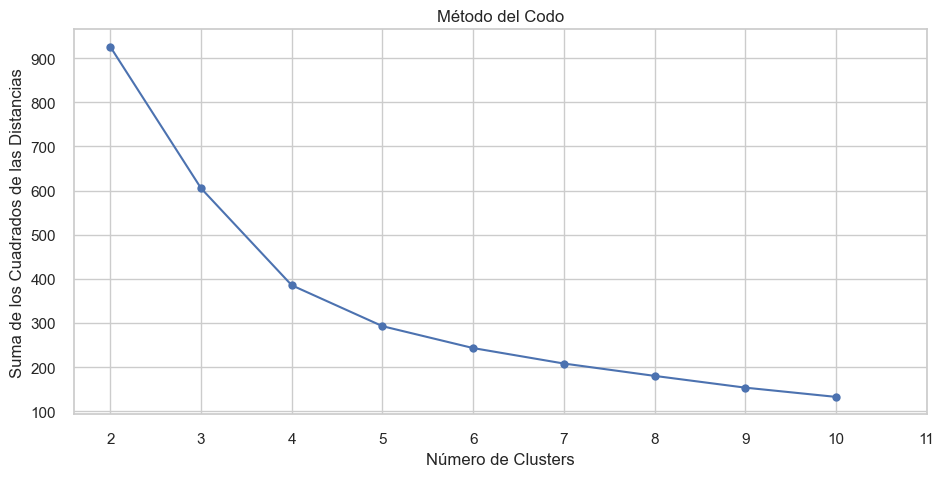

In [52]:
kfeat = df_1[['tenure', 'MonthlyCharges', 'TotalCharges']]
k_feat_esc = minmax.fit_transform(kfeat)
#k_feat_esc
#kfeat



#ssd = []
#for num_clusters in range(2, 11):
    #kmeans = KMeans(n_clusters=num_clusters, random_state=7)
    #kmeans.fit(k_feat_esc)      
    #ssd.append(kmeans.inertia_)
    #if num_clusters == 3:  
        #kmeans_optimo = kmeans

plt.figure(figsize=(11, 5))
#plt.plot(range(1, 11), ssd, marker='o')
plt.plot(list(iner.keys()), list(iner.values()), marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters")
plt.ylabel("Suma de los Cuadrados de las Distancias")
plt.xticks(np.arange(2, 12, 1))
plt.show()

# Imprimir las posiciones de los centroides y el valor de la Inercia
#print("Las posiciones de los centroides:") 
#print(kmeans_optimo.cluster_centers_)
#print(f"El valor de la Inercia: {kmeans_optimo.inertia_}")

### Con el metodo del codo parece ser bastante confuso no queda claro si el punto de quiebre esta en k = 3 o K = 4

## - **Indice Davies-Boulding**

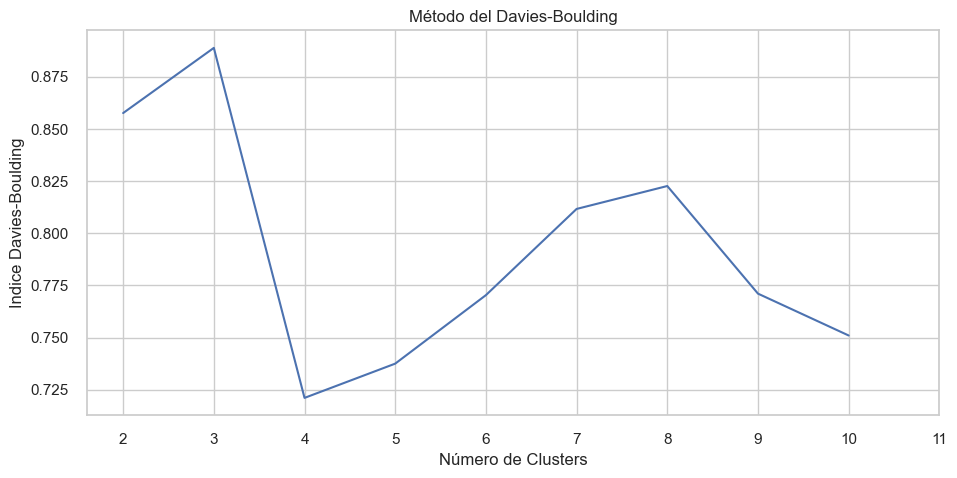

In [53]:
plt.figure(figsize=(11, 5))
plt.plot(list(db.keys()),list(db.values()))
plt.title("Método del Davies-Boulding")
plt.xlabel("Número de Clusters")
plt.ylabel("Indice Davies-Boulding")
plt.xticks(np.arange(2, 12, 1))
plt.show()

### Con el indice Davies-Boulding el mas bajo es 4, esto representa el mejor k

## - **Silhouette Score**

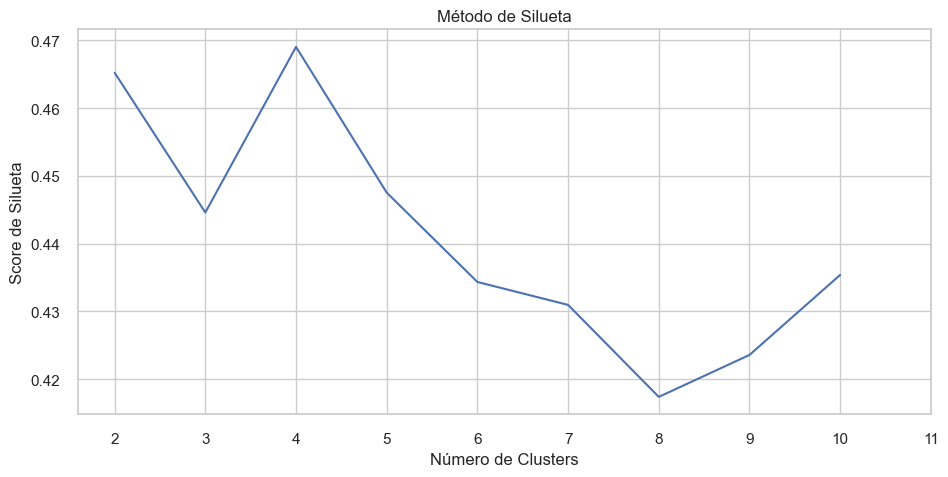

In [54]:
plt.figure(figsize=(11, 5))
plt.plot(list(slsc.keys()),list(slsc.values()))
plt.title("Método de Silueta")
plt.xlabel("Número de Clusters")
plt.ylabel("Score de Silueta")
plt.xticks(np.arange(2, 12, 1))
plt.show()

Para n_clusters = 2 El promedio del score de silhouette es:  0.46522690872395195
Para n_clusters = 3 El promedio del score de silhouette es:  0.44460237414910675
Para n_clusters = 4 El promedio del score de silhouette es:  0.46907053840062307
Para n_clusters = 5 El promedio del score de silhouette es:  0.4483097909026864


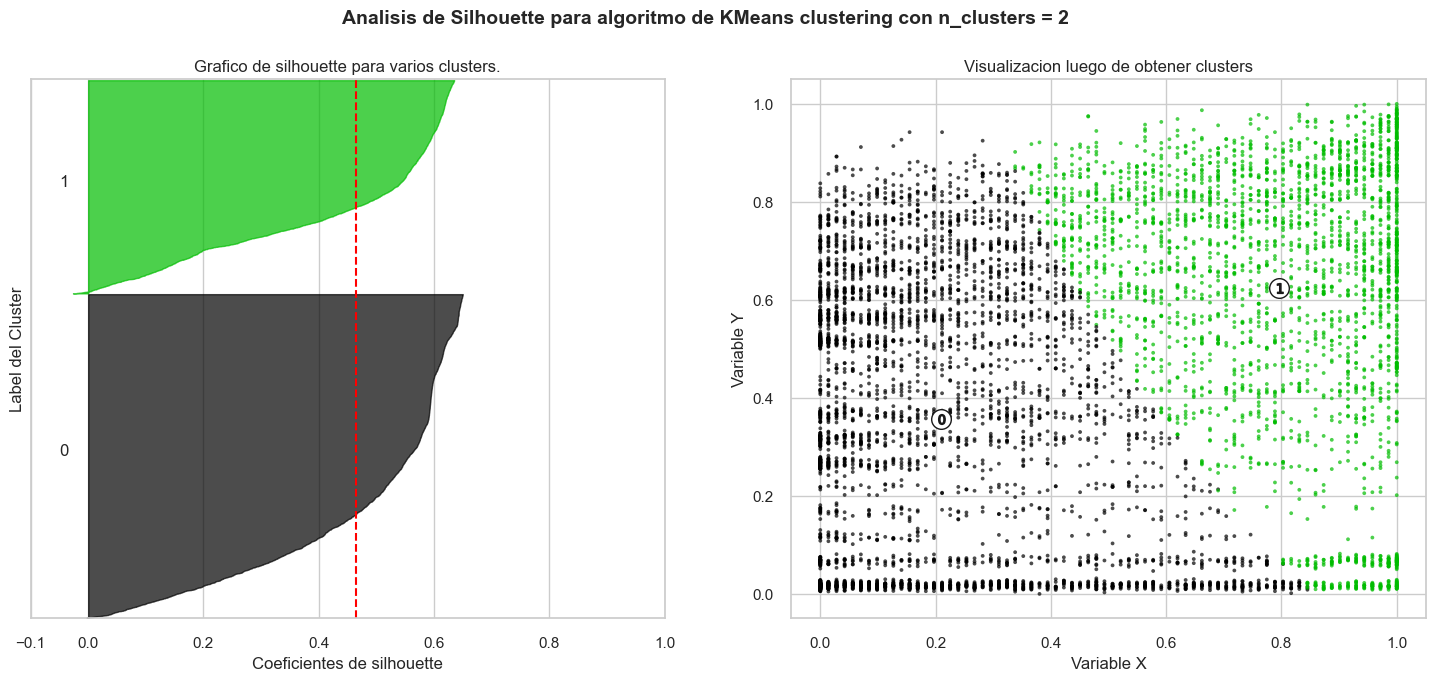

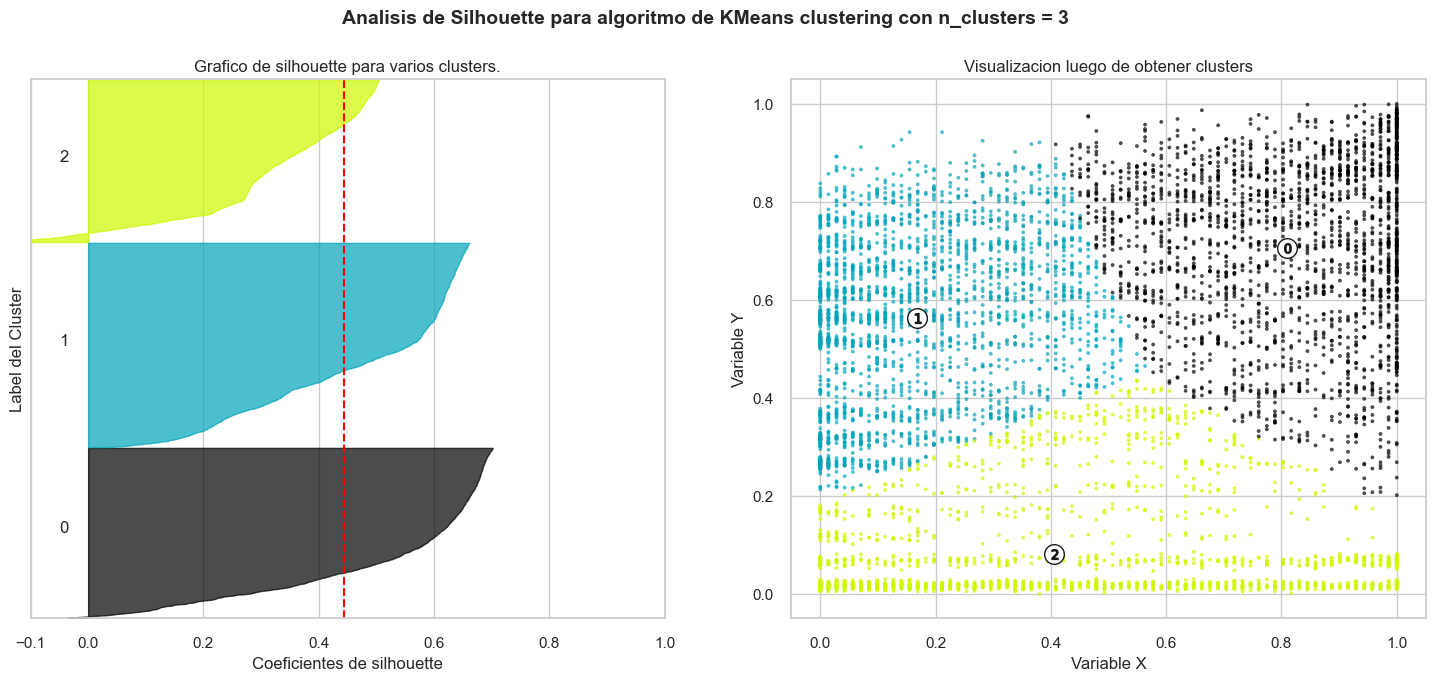

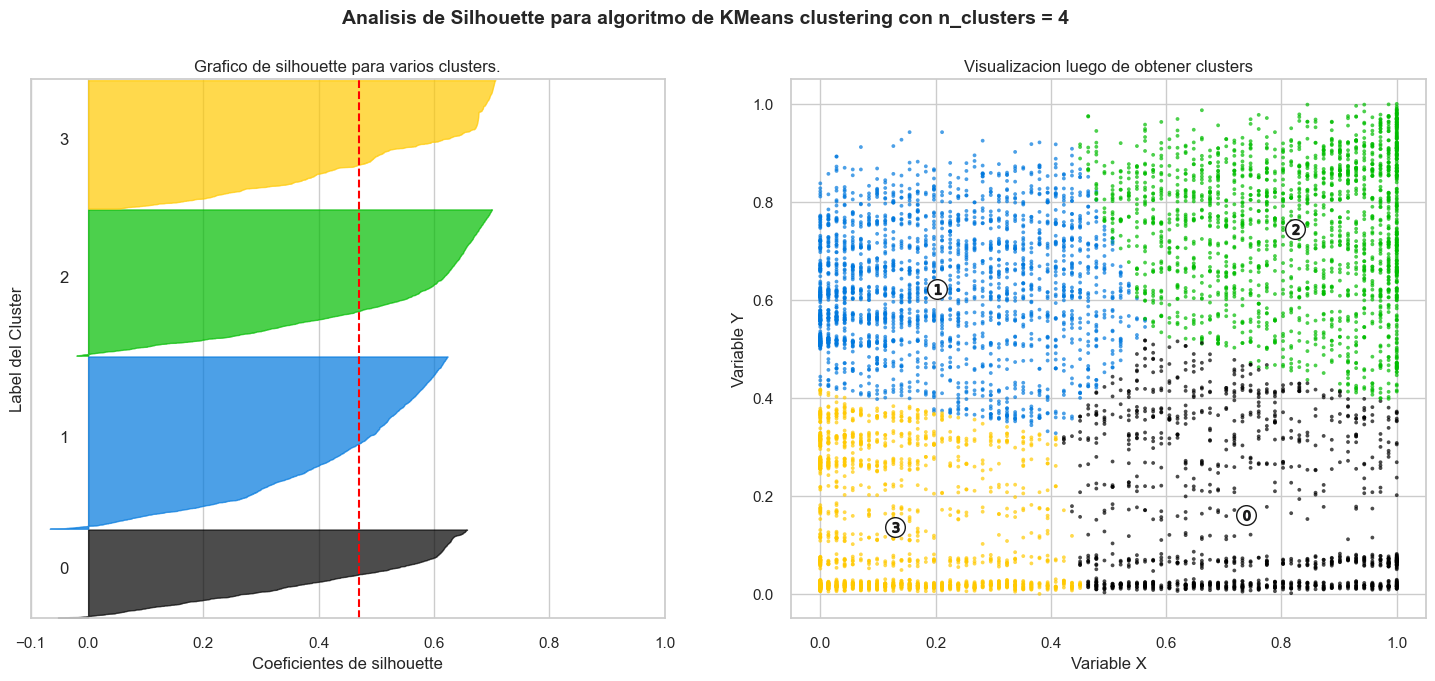

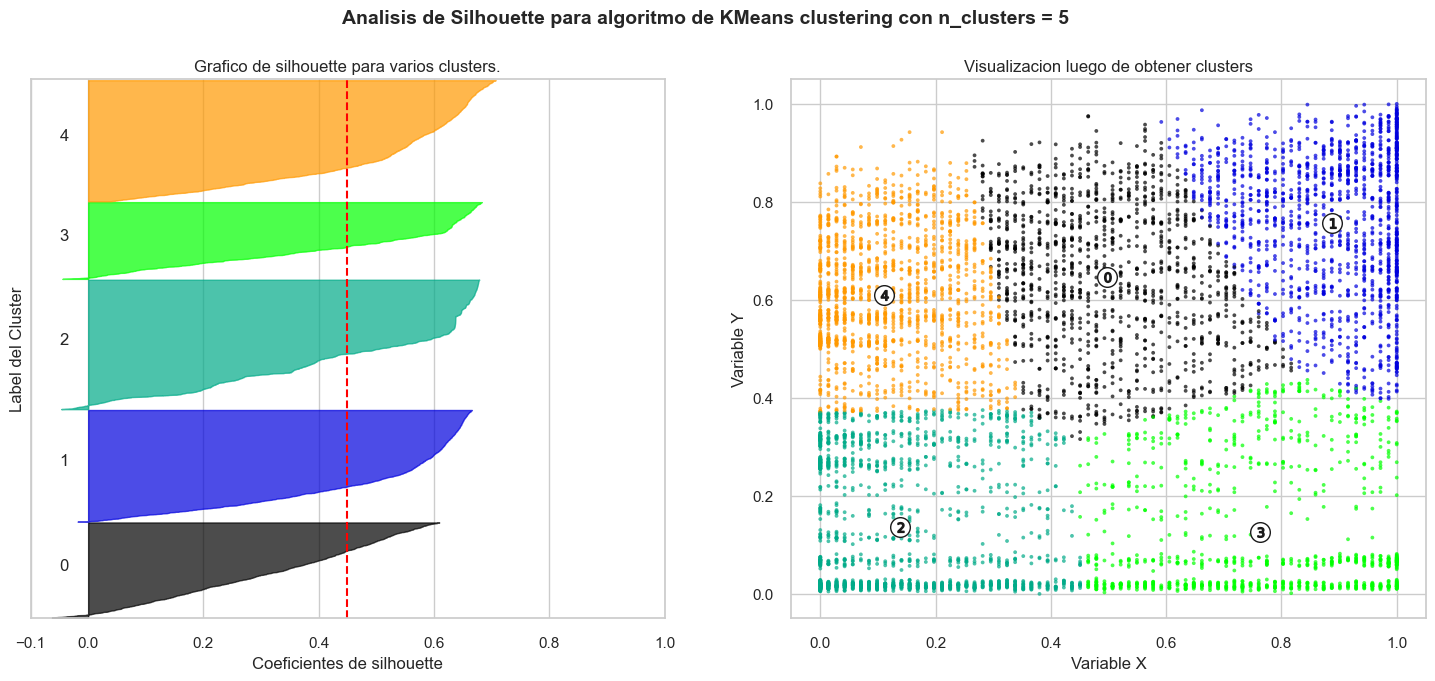

In [55]:
X = k_feat_esc
for n_clusters in range(2, 6):
    # Crear un subplot de 1 fila y 2 columnas
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # El 1 subplot es para el score de silhouette
    # El rango del Ind. silhouette es [-1, 1]
    ax1.set_xlim([-0.1, 1]) # para nuestro caso lo voy a dejar en este rango
    # El (n_clusters+1)*10 es para insertar un espacio en blanco entre la silueta
     # y el grafico de la nube de puntos
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    # Iniciamos el proceso de ajuste a los datos
    clusterer = KMeans(n_clusters=n_clusters,max_iter=1000, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # El score de silhouette_score da el promedio de todos los valores
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "El promedio del score de silhouette es: ", silhouette_avg)
    # Calcular el score de silhouette para cada muestra
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Agregar los scores de silhouette para las muestras pertenecientes al cluster i y ordenarlos
        ith_cluster_silhouette_values =sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort() # Ordenar
        size_cluster_i = ith_cluster_silhouette_values.shape[0] # Tamaño de clusters
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters) # Definir paleta de colores
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Etiquetar las graficas de silhouette con sus miembros de cluster en el medio
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Calcular el nuevo y_lower para la proxima grafica
        y_lower = y_upper + 10
    ax1.set_title("Grafico de silhouette para varios clusters.")
    ax1.set_xlabel("Coeficientes de silhouette")
    ax1.set_ylabel("Label del Cluster")
    # La linea vertical para el promedio del score de silhouette de todos los valores
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Quitar labels en y
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) # definir ticks para comparacion

    # 2 grafica mostrando los clusters formados
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters) # definir colores
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k') # scatterplot
    # Etiquetar a los clusters
    centers = clusterer.cluster_centers_
    # Dibujar en color blanco los centroides de los clusters
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')
    # Enumerar los centroides
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("Visualizacion luego de obtener clusters")
    ax2.set_xlabel("Variable X")
    ax2.set_ylabel("Variable Y")

    plt.suptitle(("Analisis de Silhouette para algoritmo de KMeans clustering "
                  "con n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### En el caso de la silueta encontramos el valor más alto en k=4. Es que gráficamente los segementos tienen el mismo tamaño y el promedio del score de la silueta es más alto de 0.47

## - **Calinski Harabasz**

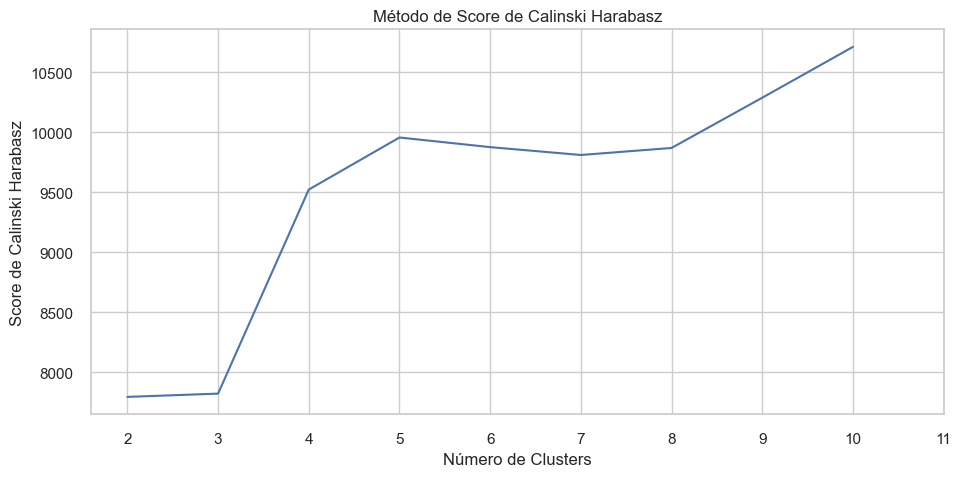

In [56]:
plt.figure(figsize=(11, 5))
plt.plot(list(cal.keys()),list(cal.values()))
plt.title("Método de Score de Calinski Harabasz")
plt.xlabel("Número de Clusters")
plt.ylabel("Score de Calinski Harabasz")
plt.xticks(np.arange(2, 12, 1))
plt.show()

### Con este método se observa una discrepancia con respecto de los anteriores el cual da como resultado el mejor K a elejir es k=10. 
### En conclusión Pareciera ser una buena opción usar k = 4 para realizar la segmentación para K-Means

## - **Entrenamiento de Modelo K-MEANS**

In [57]:
k = 4
kmeans = KMeans(n_clusters = k,init='k-means++', # n_init=100, max_iter=1000, tol=0.99, 
                #verbose=0, , copy_x=True, algorithm='lloyd'
                random_state=7).fit(k_feat_df)

In [58]:
kmeans.fit(k_feat_esc)

KMeans(n_clusters=4, random_state=7)

In [59]:
# Agregar la columna "Cluster" al DataFrame original
df_1['Cluster'] = kmeans.labels_

# Calcular las medias por cluster
means_by_cluster = df_1.groupby('Cluster').mean()

# Calcular las medianas por cluster
medians_by_cluster = df_1.groupby('Cluster').median()

# Imprimir resultados
print("Medias por cluster:")
print(means_by_cluster)

print("\nMedianas por cluster:")
print(medians_by_cluster)

Medias por cluster:
            tenure  MonthlyCharges  TotalCharges
Cluster                                         
0        53.477998       34.552286   1816.966178
1        59.441667       93.083047   5529.653516
2        10.158175       31.889485    303.595379
3        15.335099       80.823841   1245.430971

Medianas por cluster:
         tenure  MonthlyCharges  TotalCharges
Cluster                                      
0          53.0          25.250      1559.150
1          62.0          94.875      5437.425
2           7.0          24.925       219.175
3          14.0          80.100      1096.250


#### En el Modelo no supervisado K-means agrupa los clientes en 4 categorias gracias al analisis previo de los socres, aparentemente para cluster = 0 tienen en promedio 53 meses con cargos mensuales de 34 y totales de 1817, luego en el cluster = 1 se mantienen en promedio en 59 meses, con cargos mensuales en 93$, y totales de 5529; el grupo 2 con permanencia de 10 meses, 31 cargos mensuales en promedio y 303 de cargos total. El 4 grupo tiene en promedio una estadía de 15 meses, cargos mensuales de 80 y anuales de 1245.

In [60]:
#k_cluster = pd.DataFrame(k_feat_df, index = kfeat.index, columns=[featselec])
#k_cluster = pd.concat([k_feat_df.drop('Cluster', axis=1), k_feat_df['Cluster']], axis=1)
#cluster_counts = k_cluster["Cluster"].value_counts()
#print(cluster_counts)
#suma = 4239+2793
#print(f" TOTAL Clientes -->> {suma}")

## - **Gráfico de K-MEANS**

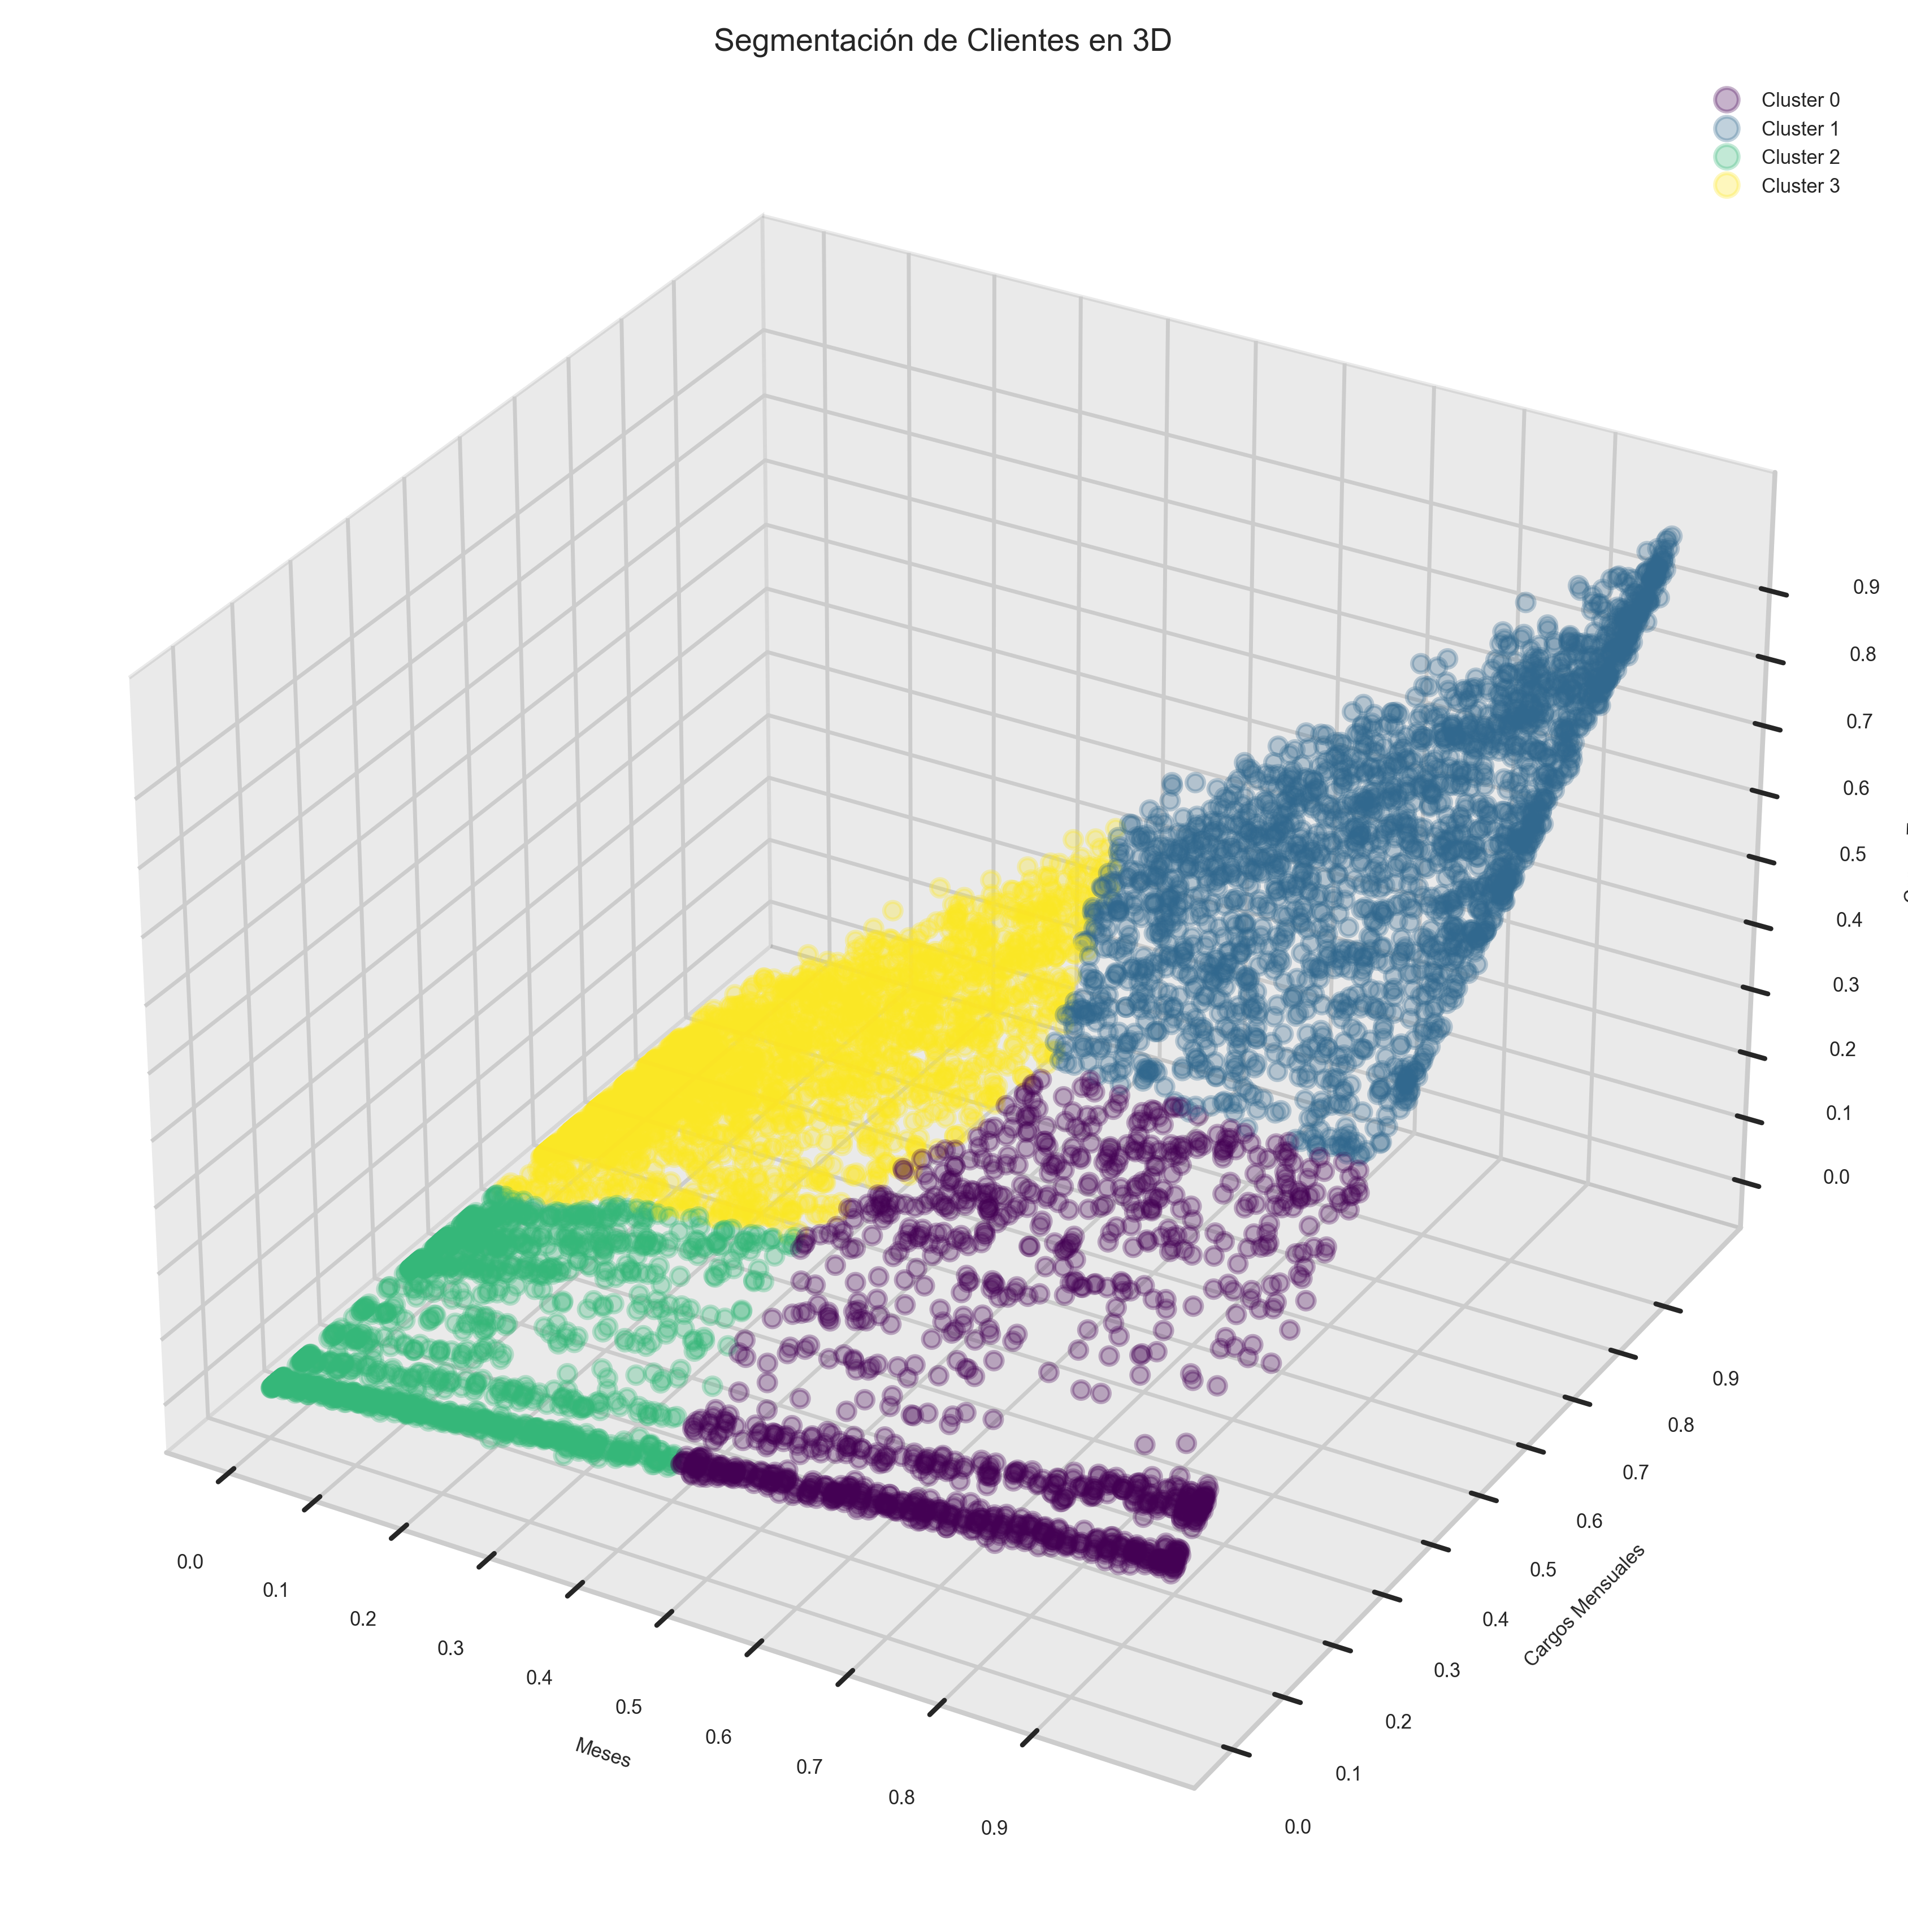

In [61]:
fig = plt.figure(figsize=(10,7), dpi=500)
ax = fig.add_subplot(111, projection="3d")

# Corregir el acceso a la columna 'Cluster'
scatter = ax.scatter(k_feat_df["tenure"], k_feat_df["MonthlyCharges"], k_feat_df["TotalCharges"], 
                     c=kmeans.labels_, cmap="viridis", alpha=0.3)

ax.set_xlabel("Meses", fontsize=5)
ax.set_ylabel("Cargos Mensuales", fontsize=5)
ax.set_zlabel("Cargos Totales", fontsize=5)
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1, 0.1))
ax.set_zticks(np.arange(0, 1, 0.1))
ax.tick_params(axis='x', labelsize=5)
ax.tick_params(axis='y', labelsize=5)
ax.tick_params(axis='z', labelsize=5)

# Ajustar la leyenda para que refleje los clusters encontrados por KMeans
legend_labels = [f'Cluster {i}' for i in range(k)]
ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels, fontsize=5)

ax.w_xaxis.set_pane_color((0.2, 0.2, 0.2, 0.1))  
ax.w_yaxis.set_pane_color((0.2, 0.2, 0.2, 0.1))  
ax.w_zaxis.set_pane_color((0.2, 0.2, 0.2, 0.1))

plt.title('Segmentación de Clientes en 3D', fontsize=8)

plt.tight_layout()
#plt.savefig("nombre_de_archivo.png", dpi=500, bbox_inches="tight")
plt.show()

In [62]:
#k_feat_df.drop("Clusters",axis=1,inplace=True)
#abels = kmeans.labels_

# check how many of the samples were correctly labeled
#correct_labels = sum(y_arbol_le == labels)

#print("Resultado: %d de %d datos fueron correctamente etiquetados." % (correct_labels, y_arbol_le.size))
#print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y_arbol_le.size)))
#print(kmeans.score(k_feat_df))
#fig = plt.figure(figsize=(10, 7), dpi=500)
#ax = fig.add_subplot(111, projection='3d')

#scatter = ax.scatter(k_feat_df['tenure'], k_feat_df['MonthlyCharges'], k_feat_df['TotalCharges'], 
                     #c=y_arbol_le, cmap="viridis", alpha=0.1)

#ax.set_xlabel("Meses", fontsize=8)
#ax.set_ylabel("Cargos Mensuales", fontsize=8)
#ax.set_zlabel("Cargos Totales", fontsize=8)

#legend_labels = [f'Cluster {i}' for i in range(num_clust)]
#ax.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

#plt.title('Segmentación de Clientes en 3D')
#plt.show()

#centroides_optimos = kmeans_optimo.cluster_centers_
#fig = plt.figure(figsize=(10, 7), dpi=500)
#ax = fig.add_subplot(111, projection='3d')

#scatter = ax.scatter(k_feat_esc['tenure'], k_feat_esc['MonthlyCharges'], k_feat_esc['TotalCharges'], 
                     #c=k_cluster['Clusters'], cmap="viridis", alpha=0.2)

# Graficar los centroides
#ax.scatter(centroides_optimos[:, 0], centroides_optimos[:, 1], centroides_optimos[:, 2], 
            #marker='*', s=70, c='black', label='Centroides', zorder=100, alpha=1)

#ax.set_xlabel("Meses", fontsize=5)
#ax.set_ylabel("Cargos Mensuales", fontsize=5)
#ax.set_zlabel("Cargos Totales", fontsize=5)

#legend_labels = [f'Cluster {i}' for i in range(num_clust)] + ['Centroides']
#ax.legend(handles=scatter.legend_elements()[0] + [plt.Line2D([0], [0], marker='*', color='w', label='Centroides', markerfacecolor='black', markersize=10)], 
          #labels=legend_labels, fontsize=5)

#ax.w_xaxis.set_pane_color((0.2, 0.2, 0.2, 0.1))  
#ax.w_yaxis.set_pane_color((0.2, 0.2, 0.2, 0.1))  
#ax.w_zaxis.set_pane_color((0.2, 0.2, 0.2, 0.1))

#plt.title('Segmentación de Clientes en 3D con Centroides (Óptimo)', fontsize=7)
#plt.show()

<a id="Modelos-de-Clasificación"></a>

<div style="padding: 24px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px;">10. Modelos de Clasificación </span>
</div>


[Volver al Indice](#indi)

<a id="Arbol-de-Decisión-Clasificación-Supervisado"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Arbol de Decisión (Clasificación, Supervisado)</span>
</div>

In [63]:
unique_labels = np.unique(y_train)
print("Etiquetas únicas en y_train:", unique_labels)

Etiquetas únicas en y_train: [0 1]


In [64]:
#Entreno el modelo 
peso = {0:0.9, 1:2}
arbolito = DecisionTreeClassifier(class_weight = peso, #"balanced", criterion="entropy",
                                  min_samples_leaf =10,max_depth=5, min_samples_split = 25, 
                                  random_state=7)
arbolito = arbolito.fit(X_train, y_train)


# Realizar predicciones en el conjunto de prueba
y_pred_arb = arbolito.predict(X_test)
y_pred_train = arbolito.predict(X_train)

f1_train = f1_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_test = f1_score(y_test, y_pred_arb)
recall_test = recall_score(y_test, y_pred_arb)
accuracy_test = accuracy_score(y_test, y_pred_arb)
conf_matrix_arb = confusion_matrix(y_test, y_pred_arb)
classification_rep_arb = classification_report(y_test, y_pred_arb)

# Imprimir resultados
#print("Reporte de Clasificación en el conjunto de prueba:\n", classification_rep_arb)
print("-" * 80)
print('Métricas en el conjunto de entrenamiento:')
print('F1-score:', f1_train)
print('Recall:', recall_train)
print('Accuracy:', accuracy_train)
print("-" * 80)
print('Métricas en el conjunto de prueba:')
print('F1-score:', f1_test)
print('Recall:', recall_test)
print('Accuracy:', accuracy_test)
print("-" * 80)
print('Matriz de Confusión en el conjunto de prueba:')
print(conf_matrix_arb)

--------------------------------------------------------------------------------
Métricas en el conjunto de entrenamiento:
F1-score: 0.641097424412094
Recall: 0.7658862876254181
Accuracy: 0.7720888888888889
--------------------------------------------------------------------------------
Métricas en el conjunto de prueba:
F1-score: 0.6377777777777777
Recall: 0.767379679144385
Accuracy: 0.7683013503909026
--------------------------------------------------------------------------------
Matriz de Confusión en el conjunto de prueba:
[[794 239]
 [ 87 287]]


In [65]:
#from sklearn.tree import plot_tree
#from matplotlib import pyplot as plt1
#class_names = [str(class_name) for class_name in np.unique(y_train)]
#fig = plt1.figure(figsize=(50, 15))
#_= plot_tree(arbolito, feature_names=feature_names, class_names=class_names, filled=True)

### Las métricas en el conjunto de entrenamiento y prueba son bastante similares, lo cual es positivo y sugiere que el modelo generaliza bien a datos no vistos.

### El recall, especialmente para la clase positiva, es bastante alto, lo cual es beneficioso en un problema desbalanceado.

### La matriz de confusión muestra un buen número de verdaderos positivos (318) y verdaderos negativos (627) en comparación con falsos positivos (390) y falsos negativos (72). En base a estas observaciones, no parece haber señales claras de **overfitting ni underfitting**. El modelo parece tener un buen rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba. 

### --> En este caso tomo en consideración en la matriz de confusión los FALSOS NEGATIVOS (72 casos para este modelo) este criterio es porque es mas riesgo en base a la hipotesis y el problema de este proyecto, **que el modelo prediga que el cliente no se dara la baja cuando realmente si se va**, es alli donde habría que poner enfasis, ya que si no se va y el modelo predice que si se estaría reforzando la fidelización de ese cliente, es por ello que se pone atención en los FALSOS NEGATIVOS.

### A continuación se presentan en un gráfico de barras las variables que el modelo tomó en consideración o fueron las más importantes para entrenarse esto puede ayudar a futuro a identificar las variables más importantes y reducir la dimensionalidad facilitando la interpretación del modelo de ML.

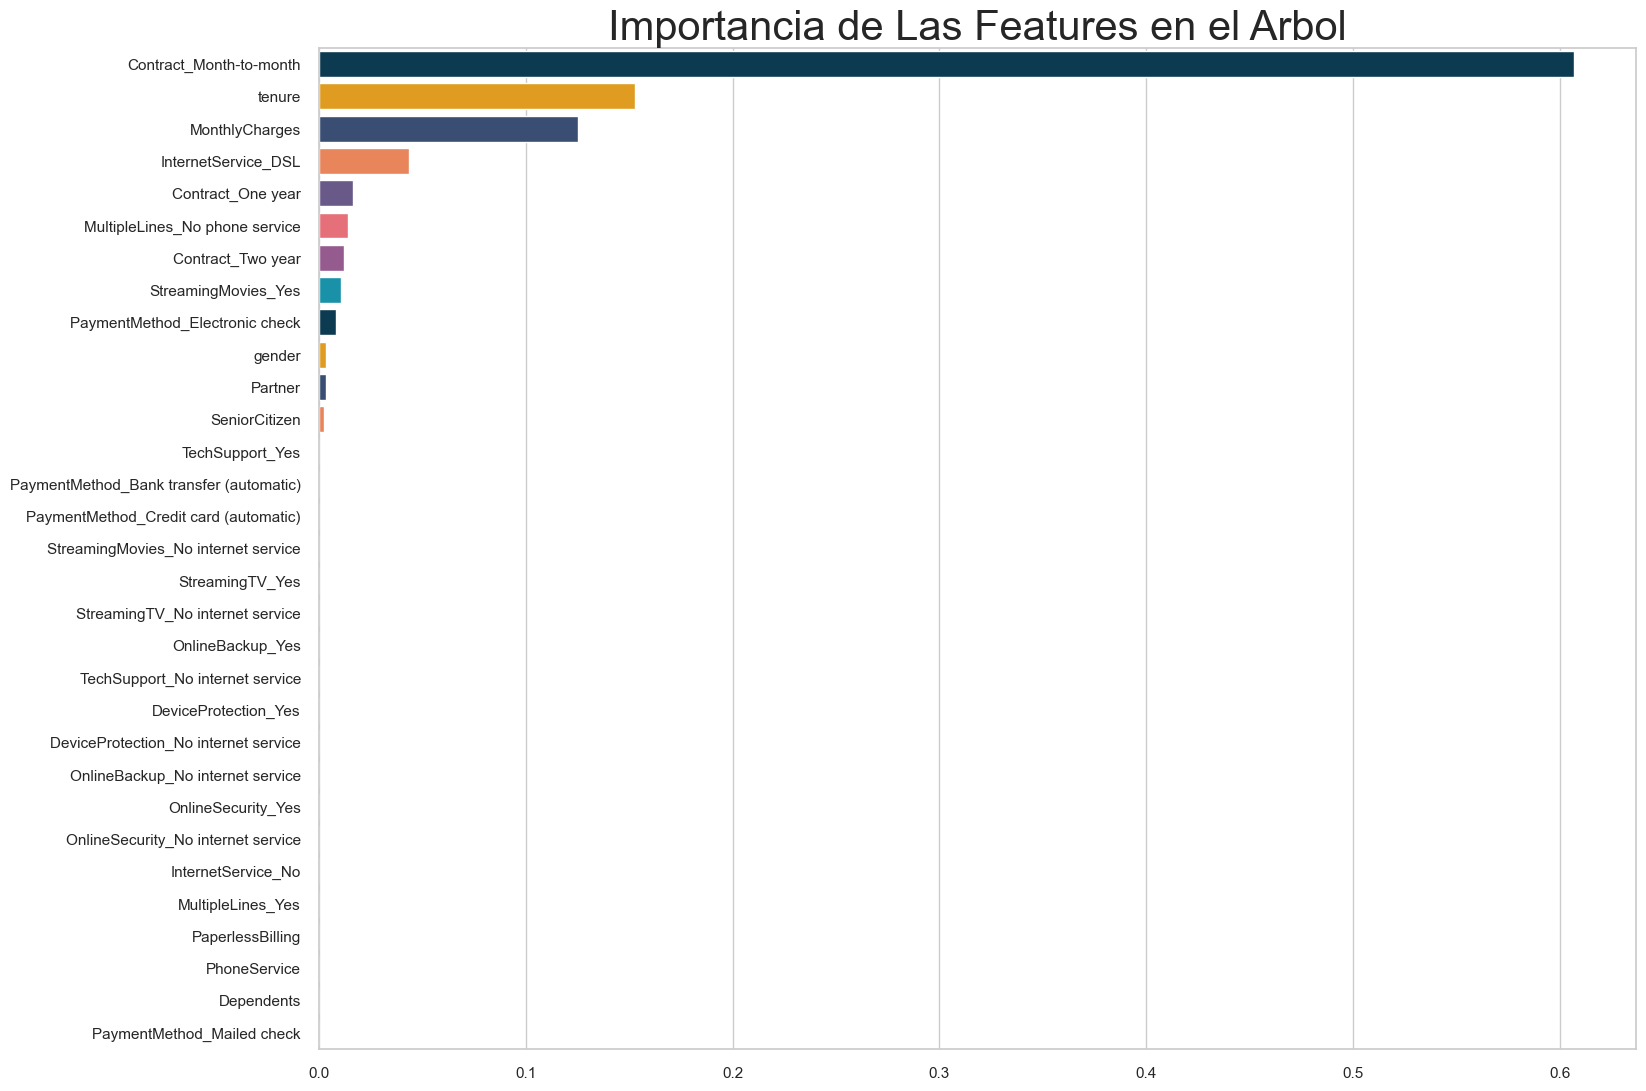

In [66]:
importancia = pd.Series(data=arbolito.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(17,13))
plt.title("Importancia de Las Features en el Arbol", fontsize=30)
ax = sns.barplot(y=importancia.index, x=importancia.values, palette=paleta, orient='h')

<a id="Arbol-de-Decisión-Feature-Engeneeringy-Reducción-del-a-Dimensionalidad"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Arbol de Decisión (Feature Engeneering y Reducción de la Dimensionalidad)</span>
</div>

### Se tomaron según las dos variables más importantes del árbol que son Contract_Month-to-month y tenure, se observa un descenso en el acuracy a 67% comparado con el anterior modelo de 77%. También hay un aumento en el recall "Yes" de 82% con respecto al anterior de 77%

In [67]:
X_arbol_fe = df_codificado[["Contract_Month-to-month","tenure"]] #"InternetService_Fiber optic"]]
y_arbol_le = labelen.fit_transform(y_arbol)
X_train, X_test, y_train, y_test = train_test_split(X_arbol_fe, y_arbol_le, test_size=0.2, random_state=7)
#Entreno el modelo 
peso = {0:0.9, 1:2}
arbolito = DecisionTreeClassifier(class_weight = peso, #"balanced", criterion="entropy",
                                  min_samples_leaf =10,max_depth=5, min_samples_split = 55, 
                                  random_state=7)
arbolito = arbolito.fit(X_train, y_train)


# Realizar predicciones en el conjunto de prueba
y_pred_arb = arbolito.predict(X_test)
y_pred_train = arbolito.predict(X_train)

#print("Recall en conjunto de entrenamiento - No:", recall_train_no)

#accuracydt = accuracy_score(y_test, y_pred_arb)
conf_matrix = confusion_matrix(y_test, y_pred_arb)
classification_rep = classification_report(y_test, y_pred_arb)

#print("Accuracy:", accuracy)
#print("Matriz de Confución:\n", conf_matrix)
print("Reporte de Clasificación:\n", classification_rep)
conf_matrix_arb = confusion_matrix(y_test, y_pred_arb)
print(conf_matrix_arb)

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.62      0.73      1017
           1       0.45      0.82      0.58       390

    accuracy                           0.67      1407
   macro avg       0.67      0.72      0.66      1407
weighted avg       0.77      0.67      0.69      1407

[[627 390]
 [ 72 318]]


<a id="K-NN-Clasificación-Supervisado"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• K-NN (Clasificación, Supervisado)</span>
</div>

In [68]:
vecino = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', 
                              leaf_size = 50, p=2, metric='minkowski', metric_params=None, n_jobs=None)
vecino.fit(X_train_Knn, y_train_Knn)
y_pred = vecino.predict(X_test_Knn)
accuracyknn = accuracy_score(y_test_Knn, y_pred)

class_report = classification_report(y_test_Knn, y_pred)

print("Informe de Clasificación:\n", class_report)
#positive_class_recall = recall_score(y_test_Knn, y_pred, pos_label=1)

confusion_mat_knn = confusion_matrix(y_test_Knn, y_pred)
#print(f"Exactitud del modelo K-NN: {accuracy:.2f}")
#print(confusion_mat_knn)

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1033
           1       0.59      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.78      0.77      1407



<a id="Regresion-Logistica-Clasificación-Supervisado"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Regresion Logistica (Clasificación, Supervisado)</span>
</div>

In [69]:
logreg_model = LogisticRegression(class_weight='balanced')
logreg_model.fit(X_train_rl, y_train_rl)
# Predicciones en el conjunto de prueba
y_pred_train_rl = logreg_model.predict(X_train_rl)
y_pred_test_rl = logreg_model.predict(X_test_rl)

# Métricas en el conjunto de entrenamiento
f1_train_rl = f1_score(y_train_rl, y_pred_train_rl)
recall_train_rl = recall_score(y_train_rl, y_pred_train_rl)
accuracy_train_rl = accuracy_score(y_train_rl, y_pred_train_rl)

# Métricas en el conjunto de prueba
f1_test_rl = f1_score(y_test_rl, y_pred_test_rl)
recall_test_rl = recall_score(y_test_rl, y_pred_test_rl)
accuracy_test_rl = accuracy_score(y_test_rl, y_pred_test_rl)

# Impresión de métricas en el conjunto de entrenamiento
print("-"*80)
print('Métricas en el conjunto de entrenamiento (Regresión Logística):')
print('F1-score:', f1_train_rl)
print('Recall:', recall_train_rl)
print('Accuracy:', accuracy_train_rl)

# Impresión de métricas en el conjunto de prueba
print("-"*80)
print('Métricas en el conjunto de prueba (Regresión Logística):')
print('F1-score:', f1_test_rl)
print('Recall:', recall_test_rl)
print('Accuracy:', accuracy_test_rl)

# Matriz de confusión en el conjunto de prueba
cnf_matrix_rl = confusion_matrix(y_test_rl, y_pred_test_rl)
print("-"*80)
print('Matriz de Confusión (Regresión Logística):')
print(cnf_matrix_rl)

--------------------------------------------------------------------------------
Métricas en el conjunto de entrenamiento (Regresión Logística):
F1-score: 0.62493424513414
Recall: 0.7946488294314381
Accuracy: 0.7464888888888889
--------------------------------------------------------------------------------
Métricas en el conjunto de prueba (Regresión Logística):
F1-score: 0.6419491525423728
Recall: 0.8101604278074866
Accuracy: 0.759772565742715
--------------------------------------------------------------------------------
Matriz de Confusión (Regresión Logística):
[[766 267]
 [ 71 303]]


In [70]:
probabilidades_todo = logreg_model.predict_proba(X_rl)
prob_churn_yes_todo = probabilidades_todo[:, 1]

# Crear una nueva serie con las probabilidades normalizadas
prob_churn_yes_normalizado_todo = pd.Series(np.round(prob_churn_yes_todo, 2), name='Prob_Churn_Yes')

df_2.insert(loc=9, column='Prob_Churn_Yes', value=prob_churn_yes_normalizado_todo)

# Mostrar el DataFrame resultante
df_2

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7027       1              0        1           1      24             1   
7028       0              0        1           1      72             1   
7029       0              0        1           1      11             0   
7030       1              1        1           0       4             1   
7031       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges Churn  Prob_Churn_Yes  \
0                    1           29.85    No            0.78   
1                    0           56.95    No            0.14   
2                    1           53.85   Yes            0.51   
3                    0           42.30    No            0.13   
4                    1           70.70   Yes            0.86   
...                ...             ...   ...             ...   
7027                 1           84.80    No            0.30   
7028                 1          103.20    No            0.26   
7029                 1           29.60    No            0.63   
7030                 1           74.40   Yes            0.84   
7031                 1          105.65    No            0.11   

      MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                                1.0                0.0                  1.0   
1                                0.0                0.0                  1.0   
2                                0.0                0.0                  1.0   
3                                1.0                0.0                  1.0   
4                                0.0                0.0                  0.0   
...                              ...                ...                  ...   
7027                             0.0                1.0                  1.0   
7028                             0.0                1.0                  0.0   
7029                             1.0                0.0                  1.0   
7030                             0.0                1.0                  0.0   
7031                             0.0                0.0                  0.0   

      InternetService_No  OnlineSecurity_No internet service  \
0                    0.0                                 0.0   
1                    0.0                                 0.0   
2                    0.0                                 0.0   
3                    0.0                                 0.0   
4                    0.0                                 0.0   
...                  ...                                 ...   
7027                 0.0                                 0.0   
7028                 0.0                                 0.0   
7029                 0.0                                 0.0   
7030                 0.0                                 0.0   
7031                 0.0                                 0.0   

      OnlineSecurity_Yes  OnlineBackup_No internet service  OnlineBackup_Yes  \
0                    0.0                               0.0               1.0   
1                    1.0                               0.0               0.0   
2                    1.0                               0.0               1.0   
3                    1.0                               0.0               0.0   
4                    0.0                               0.0               0.0   
...                  ...                               ...               ...   
7027                 1.0                               0.0

### Si el modelo predice "Sí" (Churn = Yes) > 50% con una alta probabilidad para un cliente, pero la etiqueta real es "No" (Churn = No), indica un falso positivo. Como se observa en cliente 0. En otras palabras, el modelo ha predicho incorrectamente que el cliente se dará de baja cuando, en realidad, no se dio de baja. Esto podría significar que el modelo está identificando características en ese cliente que son similares a los casos en los que los clientes realmente se dan de baja. Puede ser que el cliente tenga ciertas características o comportamientos que se asemejen a los patrones que el modelo ha aprendido como indicadores de churn, pero que en realidad no resultan en la baja del cliente. **Si observamos algunas caracteristicas este cliente es mujer lo cual no aporta mucha información, usa internet DSL, No tiene Dependientes, estas forman características de clientes que no se suelen dar la baja, pero también tiene Pareja, su método de pago es por Cheque Electrónico, Contrato es mes a mes, y su facturación es sin impresión y estas si son características de clientes que si suelen darse la baja, si vemos en detalle estas variables se podría concluír que el cliente 0 es probable que a futuro se de la baja.** Sin embargo para motivos o a efectos de este proyecto se decidió hacer enfasis en los Falsos Negativos poniendo especial atención en el RECALL
### Este tipo de errores son importantes para entender, ya que podrían indicar áreas de mejora en el modelo.

In [71]:
y_pred = logreg_model.predict(X_test_rl)
comparacion = pd.DataFrame({
    "Prediccion": y_pred,
    "Churn": y_test_rl
})
errores = comparacion[comparacion["Prediccion"] != comparacion["Churn"]]
errores
pd.reset_option("display.max_rows")
errores

Prediccion  Churn
2              1      0
4              1      0
5              1      0
8              0      1
15             1      0
...          ...    ...
1373           1      0
1378           1      0
1390           1      0
1393           1      0
1397           1      0

[338 rows x 2 columns]

<a id="Regresión-Logistica-SMOTE"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Regresión Logistica (SMOTE)</span>
</div>

### - SMOTE (Synthetic Minority Over-sampling Technique) es una técnica de sobremuestreo utilizada en el ámbito del aprendizaje automático y la minería de datos, específicamente cuando se enfrenta a conjuntos de datos desequilibrados. La desigualdad en la distribución de clases puede afectar el rendimiento de los modelos de aprendizaje automático, ya que pueden tener dificultades para aprender patrones en la clase minoritaria.

### - SMOTE aborda este problema generando sintéticamente muestras adicionales para la clase minoritaria. En lugar de simplemente duplicar instancias existentes, SMOTE crea nuevas instancias interpolando características de las muestras existentes. Esto se logra seleccionando aleatoriamente pares de instancias de la clase minoritaria y creando puntos intermedios en las líneas que los conectan.

In [72]:
df_SMOTE
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X_rl, y_rl_le, test_size=0.2, random_state=7, stratify=y_rl_le)
vc_ytrain = np.asarray(np.unique(y_train_rl, return_counts = True))
vc_ytrain

array([[   0,    1],
       [4130, 1495]], dtype=int64)

In [73]:
smote = SMOTE(k_neighbors=5,random_state=7)
Xtrain_rl_s, ytrain_rl_s = smote.fit_resample(X_train_rl,y_train_rl)
vc_ytrain_s = np.asarray(np.unique(ytrain_rl_s, return_counts = True))
vc_ytrain_s

array([[   0,    1],
       [4130, 4130]], dtype=int64)

In [74]:
logreg_model = LogisticRegression()
logreg_model.fit(Xtrain_rl_s, ytrain_rl_s)


y_pred_smote = logreg_model.predict(X_test_rl)
class_report = classification_report(y_test_rl, y_pred_smote)
confusion_matrl_smote= confusion_matrix(y_test_rl, y_pred_smote)

print("Informe de Clasificación:\n", class_report)
print(confusion_matrl_smote)

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.52      0.75      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.75      0.76      1407

[[780 253]
 [ 95 279]]


### En comparación con la regresión logistica sin balancear con SMOTE, en este caso al balancear con este algoritmo se observa una caida en los valores de recall para la clase 1 la cual pasa de 0.81 a 0.76 con SMOTE, de igual manera se ve disminución en la presición de 0.92 para la clase 0 a 0.89 y para la clase 1 de 0.53 a 0.51 con el SMOTE, el uso de este algoritmo no favorece el objeivo que es disminuir los falsos negativos lo cual significa en este caso que la regresión logistic me identifica que el cliente no se va cuando realmente si se va. 

<a id="Regresión-Logística-SMOTETomek"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Regresión Logística (SMOTETomek)</span>
</div>

###  SMOTE se centra únicamente en generar muestras sintéticas para aumentar la representación de la clase minoritaria, SMOTETomek combina esta generación sintética con la eliminación de instancias que pueden considerarse ruido.

In [75]:
sm_tk = SMOTETomek(random_state=7)
Xtrain_rl_sk, ytrain_rl_sk = sm_tk.fit_resample(X_train_rl,y_train_rl)
vc_ytrain_sk = np.asarray(np.unique(ytrain_rl_sk, return_counts = True))
vc_ytrain_s

array([[   0,    1],
       [4130, 4130]], dtype=int64)

In [76]:
logreg_model = LogisticRegression(class_weight="balanced")
logreg_model.fit(Xtrain_rl_sk, ytrain_rl_sk)

y_pred_smotek = logreg_model.predict(X_test_rl)
class_report = classification_report(y_test_rl, y_pred_smotek)
confusion_matrl_smotek= confusion_matrix(y_test_rl, y_pred_smotek)

print("Informe de Clasificación:\n", class_report)
print(confusion_matrl_smotek)

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1033
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.71      0.75      0.72      1407
weighted avg       0.79      0.75      0.76      1407

[[784 249]
 [ 99 275]]


### Se puede concluir tanto para SMOTE como para SMOTETomek, que no hay una diferencia siginificativa tanto para la precisión como para el Recall que en este caso es el objetivo a mejorar, se siguen teniendo mejores resultados aboradando este algoritmo de regresión para este caso especifico el peso de las clases como el mejor criterio para tratar el recall. 

<a id="Random-Forest-Clasificación-Supervisado"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Random Forest (Clasificación, Supervisado)</span>
</div>


In [77]:
Bospeso = {0: 1, 1:3.1}
bosque = RandomForestClassifier(n_estimators=99,
                                class_weight = Bospeso,max_depth=7,
                                random_state=7 , min_samples_leaf=25 , bootstrap= True) #max_leaf_nodes = 2)

bosque.fit(X_train_bosque, y_train_bosque)
y_pred_bosque = bosque.predict(X_test_bosque)
class_report = classification_report(y_test_bosque, y_pred_bosque)
print("Informe de Clasificación:\n", class_report)
confusionbosque = confusion_matrix(y_test_bosque, y_pred_bosque)
print(confusionbosque)

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80      1033
           1       0.51      0.86      0.64       374

    accuracy                           0.74      1407
   macro avg       0.72      0.78      0.72      1407
weighted avg       0.82      0.74      0.76      1407

[[725 308]
 [ 52 322]]



<a id="Random-Forest-GridSearch"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Random Forest (GridSearch)</span>
</div>


In [78]:
from sklearn.metrics import make_scorer
Bospeso = {0: 1, 1: 3.5}
srf_gdcv = RandomForestClassifier(class_weight=Bospeso,random_state=7)
hiperparametros={'max_depth':[1],'min_samples_leaf':[1], 'max_leaf_nodes':[5], 'n_estimators':[55],
                 "criterion": ["gini"]} #,'class_weight': [None, {0: 1, 1: 3}]}
grilla=GridSearchCV(srf_gdcv,hiperparametros,cv=5,scoring="recall", verbose=1, return_train_score = True)
grilla.fit(X_train_bosque, y_train_bosque) # se fitea conjunto de entrenamiento.
print("-"*80)
print("Mejores Parámetros")
print(grilla.best_params_)
print("-"*80)
print("Recall")
print(grilla.best_score_)

srf_modelo = grilla.best_estimator_
y_pred_train = srf_modelo.predict(X_test_bosque)

y_pred_test = srf_modelo.predict(X_test_bosque)
y_pred_train = srf_modelo.predict(X_train_bosque)

f1_train = f1_score(y_train_bosque, y_pred_train)
f1_test = f1_score(y_test_bosque, y_pred_test)

recall_train = recall_score(y_train_bosque, y_pred_train)
recall_test = recall_score(y_test_bosque, y_pred_test)

accuracy_train = accuracy_score(y_train_bosque, y_pred_train)
accuracy_test = accuracy_score(y_test_bosque, y_pred_test)
print("-"*80)
print('Métricas en el conjunto de entrenamiento:')
print('F1-score:', f1_train)
print('Recall:', recall_train)
print('Accuracy:', accuracy_train)
print("-"*80)
print('Métricas en el conjunto de prueba:')
print('F1-score:', f1_test)
print('Recall:', recall_test)
print('Accuracy:', accuracy_test)
cnf_rf_gdcv = confusion_matrix(y_test_bosque, y_pred_test)
print("-"*80)
print(cnf_rf_gdcv)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
--------------------------------------------------------------------------------
Mejores Parámetros
{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'n_estimators': 55}
--------------------------------------------------------------------------------
Recall
0.8421404682274247
--------------------------------------------------------------------------------
Métricas en el conjunto de entrenamiento:
F1-score: 0.5917020273455917
Recall: 0.8394648829431438
Accuracy: 0.6920888888888889
--------------------------------------------------------------------------------
Métricas en el conjunto de prueba:
F1-score: 0.6032350142721218
Recall: 0.8475935828877005
Accuracy: 0.7036247334754797
--------------------------------------------------------------------------------
[[673 360]
 [ 57 317]]


<a id="Random-Forest-GridSearchCV/StratifiedKfold"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Random Forest (GridSearchCV/StratifiedKfold)</span>
</div>


In [79]:
Skfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 7) #Se crea el stratifiedKFold con 5 divisiones shuffle = true es mezcla el orden de los datos 

Bospeso = {0: 1, 1: 3}

srf = RandomForestClassifier(class_weight = Bospeso)
hiperparametros = hiperparametros = {
    'max_depth': [5],
    'min_samples_leaf': [30],
    'max_leaf_nodes': [30],
    'n_estimators': [100],
    'criterion': ['gini'],
    'random_state': [7]
}
grilla = GridSearchCV(srf,hiperparametros,cv=Skfold,scoring="recall", verbose=1, return_train_score = True, n_jobs=-1) # en cv se sustiye por variable skfold
grilla.fit(X_train_bosque, y_train_bosque) # fiteo de entrenamiento 
print("-"*80)
print ("Mejores Parámetros:")
print(grilla.best_params_)
print("-"*80)
print ("Mejores Recall:")
print(grilla.best_score_)

srf_modelo = grilla.best_estimator_
y_pred_test = srf_modelo.predict(X_test_bosque)

df_resultado = grilla.cv_results_
df_resultado = pd.DataFrame(df_resultado)
df_resultado = df_resultado[["mean_test_score", "mean_train_score" , "params"]]
df_resultado = df_resultado.round(3).sort_values("mean_test_score", ascending = False)

print("-"*80)
print ("Mejor Resultado:")
print(df_resultado)

#y_pred_test = srf_modelo.predict(X_test_bosque)
y_pred_train = srf_modelo.predict(X_train_bosque)

f1_train = f1_score(y_train_bosque, y_pred_train)
f1_test = f1_score(y_test_bosque, y_pred_test)

recall_train = recall_score(y_train_bosque, y_pred_train)
recall_test = recall_score(y_test_bosque, y_pred_test)

accuracy_train = accuracy_score(y_train_bosque, y_pred_train)
accuracy_test = accuracy_score(y_test_bosque, y_pred_test)
print("-"*80)
print('Métricas en el conjunto de entrenamiento:')
print('F1-score:', f1_train)
print('Recall:', recall_train)
print('Accuracy:', accuracy_train)
print("-"*80)
print('Métricas en el conjunto de prueba:')
print('F1-score:', f1_test)
print('Recall:', recall_test)
print('Accuracy:', accuracy_test)

print("-"*80)
cnf_rf_skfold = confusion_matrix(y_test_bosque, y_pred_test)
cnf_rf_skfold

Fitting 5 folds for each of 1 candidates, totalling 5 fits
--------------------------------------------------------------------------------
Mejores Parámetros:
{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 30, 'min_samples_leaf': 30, 'n_estimators': 100, 'random_state': 7}
--------------------------------------------------------------------------------
Mejores Recall:
0.8227424749163881
--------------------------------------------------------------------------------
Mejor Resultado:
   mean_test_score  mean_train_score  \
0            0.823             0.834   

                                              params  
0  {'criterion': 'gini', 'max_depth': 5, 'max_lea...  
--------------------------------------------------------------------------------
Métricas en el conjunto de entrenamiento:
F1-score: 0.6027330405075647
Recall: 0.8260869565217391
Accuracy: 0.7105777777777778
--------------------------------------------------------------------------------
Métricas en el conjunt

array([[706, 327],
       [ 56, 318]], dtype=int64)

<a id="Random-Forest-GridsearchCV-HalvingGridSearchCV"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Random Forest (GridsearchCV/HalvingGridSearchCV)</span>
</div>

In [80]:
Bospeso = {0: 1, 1: 3.1}

srf = RandomForestClassifier(class_weight = Bospeso)
hiperparametros = {
    'max_depth': [1],
    'min_samples_leaf': [1],
    'max_leaf_nodes': [100],
    'n_estimators': [250],
    'criterion': ['gini'],
    'random_state': [42]
}

RF_halving_cv = HalvingGridSearchCV(srf,param_grid = hiperparametros,cv=5,scoring="recall", min_resources = 100, n_jobs = -1,
                                    verbose=1, return_train_score = True) # en cv se sustiye por variable skfold

RF_halving_cv.fit(X_train_bosque, y_train_bosque) # fiteo de entrenamiento 
print ("Mejores Parámetros: --------------------------------------------------")
print(RF_halving_cv.best_params_)

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 4
min_resources_: 100
max_resources_: 5625
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 100
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores Parámetros: --------------------------------------------------
{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'n_estimators': 250, 'random_state': 42}


In [81]:
srf_modelo = RF_halving_cv.best_estimator_
y_pred_test = srf_modelo.predict(X_test_bosque)
f1 = recall_score(y_test_bosque , y_pred_test)
print("-"*80)
print(f"El resultado de score Recall es: {f1}")
#y_pred_test = srf_modelo.predict(X_test_bosque)
y_pred_train = srf_modelo.predict(X_train_bosque)

f1_train = f1_score(y_train_bosque, y_pred_train)
f1_test = f1_score(y_test_bosque, y_pred_test)

recall_train = recall_score(y_train_bosque, y_pred_train)
recall_test = recall_score(y_test_bosque, y_pred_test)

accuracy_train = accuracy_score(y_train_bosque, y_pred_train)
accuracy_test = accuracy_score(y_test_bosque, y_pred_test)
print("-"*80)
print('Métricas en el conjunto de entrenamiento:')
print('F1-score:', f1_train)
print('Recall:', recall_train)
print('Accuracy:', accuracy_train)
print("-"*80)
print('Métricas en el conjunto de prueba:')
print('F1-score:', f1_test)
print('Recall:', recall_test)
print('Accuracy:', accuracy_test)
cnf_rf_halcv = confusion_matrix(y_test_bosque, y_pred_test)
print(cnf_rf_halcv)

--------------------------------------------------------------------------------
El resultado de score Recall es: 0.8796791443850267
--------------------------------------------------------------------------------
Métricas en el conjunto de entrenamiento:
F1-score: 0.5797230906654756
Recall: 0.8682274247491639
Accuracy: 0.6654222222222222
--------------------------------------------------------------------------------
Métricas en el conjunto de prueba:
F1-score: 0.590134529147982
Recall: 0.8796791443850267
Accuracy: 0.6751954513148543
[[621 412]
 [ 45 329]]


<a id="Matrices-de-Confusión-para-Los-modelos-de-Random-Forest-Optimizados"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Matrices de Confusión para Los modelos de Random Forest (Optimizados)</span>
</div>

### En este caso se uso GriddSearchCV / Stratified - K-Folg / HalvingGriddSearchCV, para encontrar los mejores hiper parametros y optimizar este modelo de Random Forest pareciera ser el que mejor rendimiento tiene es el segundo donde solo se uso GridSearhCV. Sin embargo el que mejor rendimiento obtuvo no solo en los falsos negativos fue el optimizado manualmente. 

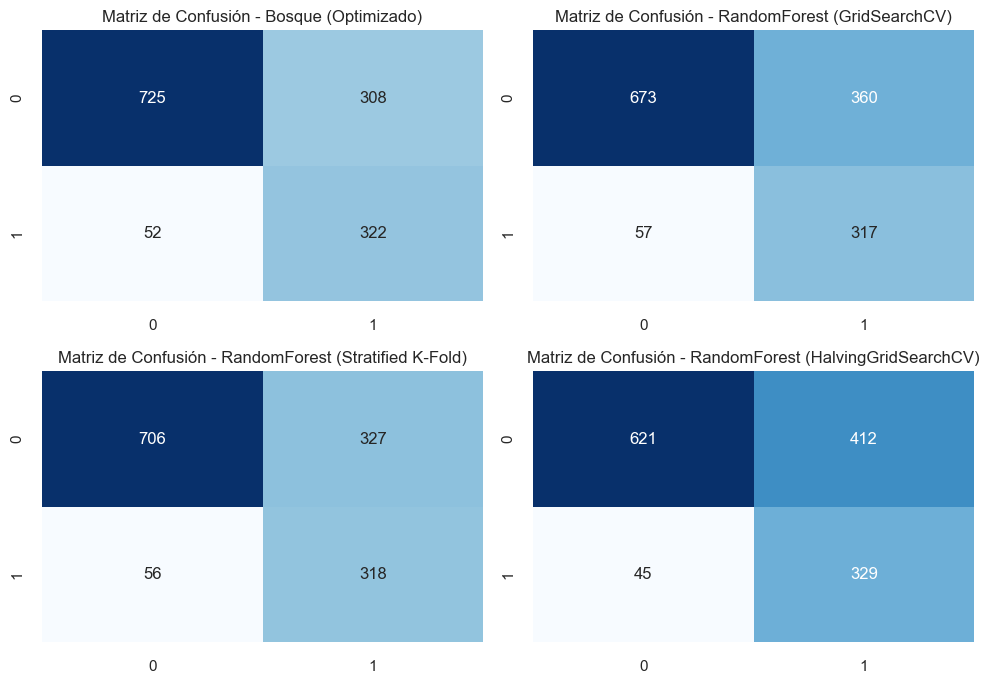

In [82]:
# Configuración de la figura y los ejes
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

ax = axes[0, 0]
sns.heatmap(confusionbosque, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_title('Matriz de Confusión - Bosque (Optimizado)')

ax = axes[0, 1]
sns.heatmap(cnf_rf_gdcv, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_title('Matriz de Confusión - RandomForest (GridSearchCV)')

ax = axes[1, 0]
sns.heatmap(cnf_rf_skfold, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_title('Matriz de Confusión - RandomForest (Stratified K-Fold)')

# Matriz de confusión para RandomForest con Holdout Cross-Validation
ax = axes[1, 1]
sns.heatmap(cnf_rf_halcv, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_title('Matriz de Confusión - RandomForest (HalvingGridSearchCV)')

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()

### Según estas matrices de confusión a pesar de que el Modelo Random Forest/HalvingGridSearchCV se observa 45 Falsos Negatigos es decir este modelo comete 45 errores donde los clientes se van realmente el se equivoca y los identifica como que se quedan. Usaremos un criterio mas objetivo viendo que el modelo Random Forest/optimizado tendría un mejor rendimiento general. Se resalta el uso en la optimización de estos modelos la asignación de pesos ya que los datos están desbalanceados

<a id="Modelo-XGBoost"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Modelo XGBoost</span>
</div>

In [83]:
proporcion_clase_0 = (y_train_xg == 0).sum() / len(y_train_xg)
proporcion_clase_1 = 1 - proporcion_clase_0

print(proporcion_clase_0)
print(proporcion_clase_1)

peso = proporcion_clase_0 / proporcion_clase_1

XGB = XGBClassifier(
    objective='binary:logistic',
    n_estimators=50,
    max_depth=2,
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight=peso
)

XGB.fit(X_train_xg, y_train_xg)

# Predicciones en el conjunto de prueba
y_pred_train_xgb = XGB.predict(X_train_xg)
y_pred_test_xgb = XGB.predict(X_test_xg)

# Métricas en el conjunto de entrenamiento
f1_train_xgb = f1_score(y_train_xg, y_pred_train_xgb)
recall_train_xgb = recall_score(y_train_xg, y_pred_train_xgb)
accuracy_train_xgb = accuracy_score(y_train_xg, y_pred_train_xgb)

# Métricas en el conjunto de prueba
f1_test_xgb = f1_score(y_test_xg, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test_xg, y_pred_test_xgb)
accuracy_test_xgb = accuracy_score(y_test_xg, y_pred_test_xgb)
print("-"*80)
print('Métricas en el conjunto de entrenamiento (XGBoost):')
print('F1-score:', f1_train_xgb)
print('Recall:', recall_train_xgb)
print('Accuracy:', accuracy_train_xgb)
print("-"*80)
print('Métricas en el conjunto de prueba (XGBoost):')
print('F1-score:', f1_test_xgb)
print('Recall:', recall_test_xgb)
print('Accuracy:', accuracy_test_xgb)
conf_matrix_xgb = confusion_matrix(y_test_xg, y_pred_test_xgb)
print("-"*80)
print('Matriz de Confusión (XGBoost):')
print(conf_matrix_xgb)

0.7342222222222222
0.2657777777777778
--------------------------------------------------------------------------------
Métricas en el conjunto de entrenamiento (XGBoost):
F1-score: 0.6263291139240507
Recall: 0.8274247491638796
Accuracy: 0.7376
--------------------------------------------------------------------------------
Métricas en el conjunto de prueba (XGBoost):
F1-score: 0.631578947368421
Recall: 0.8342245989304813
Accuracy: 0.7412935323383084
--------------------------------------------------------------------------------
Matriz de Confusión (XGBoost):
[[731 302]
 [ 62 312]]


<a id="Modelo-XGBoost-GridSearch-Strafied-K-Fold"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Modelo XGBoost (GridSearch/Strafied-K-Fold) </span>
</div>

In [84]:
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)

# Definir los parámetros a ajustar
param_grid = {
    "n_estimators": [50],
    "max_depth": [4],
    "learning_rate": [0.1],
    "scale_pos_weight": [73/27],
    "min_child_weight":[0.4],
}

cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='recall', cv=cv_stratified)
grid_search.fit(X_train_xg, y_train_xg)
best_xgb_model = grid_search.best_estimator_

y_pred_train_xgb = best_xgb_model.predict(X_train_xg)
y_pred_test_xgb = best_xgb_model.predict(X_test_xg)


f1_train_xgb = f1_score(y_train_xg, y_pred_train_xgb)
recall_train_xgb = recall_score(y_train_xg, y_pred_train_xgb)
accuracy_train_xgb = accuracy_score(y_train_xg, y_pred_train_xgb)


f1_test_xgb = f1_score(y_test_xg, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test_xg, y_pred_test_xgb)
accuracy_test_xgb = accuracy_score(y_test_xg, y_pred_test_xgb)

# Imprimir métricas y matriz de confusión
print("-"*80)
print('Mejores hiperparámetros:', grid_search.best_params_)
print("-"*80)
print('Métricas en el conjunto de entrenamiento (XGBoost):')
print('F1-score:', f1_train_xgb)
print('Recall:', recall_train_xgb)
print('Accuracy:', accuracy_train_xgb)
print("-"*80)
print('Métricas en el conjunto de prueba (XGBoost):')
print('F1-score:', f1_test_xgb)
print('Recall:', recall_test_xgb)
print('Accuracy:', accuracy_test_xgb)
conf_matrix_xgb_op = confusion_matrix(y_test_xg, y_pred_test_xgb)
print("-"*80)
print("Matriz de Confusión (XGBoost):")
print(conf_matrix_xgb_op)

--------------------------------------------------------------------------------
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 0.4, 'n_estimators': 50, 'scale_pos_weight': 2.7037037037037037}
--------------------------------------------------------------------------------
Métricas en el conjunto de entrenamiento (XGBoost):
F1-score: 0.6584145377929944
Recall: 0.8361204013377926
Accuracy: 0.7694222222222222
--------------------------------------------------------------------------------
Métricas en el conjunto de prueba (XGBoost):
F1-score: 0.6548117154811716
Recall: 0.8368983957219251
Accuracy: 0.7654584221748401
--------------------------------------------------------------------------------
Matriz de Confusión (XGBoost):
[[764 269]
 [ 61 313]]


<a id="svm"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Suport Vector Machine (SVM) </span>
</div>

In [85]:
modelo_svm = svm.SVC(kernel="rbf", C=1, class_weight={0:1,1:3}, gamma=0.1)
modelo_svm.fit(X_train_svm, y_train_svm)


y_pred_svm = modelo_svm.predict(X_test_svm)

y_pred_train_svm = modelo_svm.predict(X_train_svm)
f1_train_svm = f1_score(y_train_svm, y_pred_train_svm)
recall_train_svm = recall_score(y_train_svm, y_pred_train_svm)
accuracy_train_svm = accuracy_score(y_train_svm, y_pred_train_svm)


f1_test_svm = f1_score(y_test_svm, y_pred_svm)
recall_test_svm = recall_score(y_test_svm, y_pred_svm)
accuracy_test_svm = accuracy_score(y_test_svm, y_pred_svm)

# Imprimir métricas y matriz de confusión para SVM
print("-" * 80)
print("Métricas en el conjunto de entrenamiento (SVM):")
print("F1-score:", f1_train_svm)
print("Recall:", recall_train_svm)
print("Accuracy:", accuracy_train_svm)
print("-" * 80)
print("Métricas en el conjunto de prueba (SVM):")
print("F1-score:", f1_test_svm)
print("Recall:", recall_test_svm)
print("Accuracy:", accuracy_test_svm)
conf_matrix_svm = confusion_matrix(y_test_svm, y_pred_svm)
print("-" * 80)
print("Matriz de Confusión (SVM):")
print(conf_matrix_svm)

--------------------------------------------------------------------------------
Métricas en el conjunto de entrenamiento (SVM):
F1-score: 0.8131129167834127
Recall: 0.9705685618729097
Accuracy: 0.8814222222222222
--------------------------------------------------------------------------------
Métricas en el conjunto de prueba (SVM):
F1-score: 0.6479820627802692
Recall: 0.7727272727272727
Accuracy: 0.7768301350390903
--------------------------------------------------------------------------------
Matriz de Confusión (SVM):
[[804 229]
 [ 85 289]]


<a id="Evaluación-de-Desempeño-de-los-Modelos-DATAFRAME"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Evaluación de Desempeño de los Modelos (DATAFRAME)</span>
</div>

### En este Cuadro se destacan  aquellos probados anteriormente que dieron los mejores rendimientos

In [86]:
models = [
    ("Árb. Decisión", arbolito, X_train, y_train, X_test, y_test),
    ("K-NN", vecino, X_train_Knn, y_train_Knn, X_test_Knn, y_test_Knn),
    ("Reg. Log-", logreg_model, X_train_rl, y_train_rl, X_test_rl, y_test_rl),
    ("R.F. Op.", bosque, X_train_bosque, y_train_bosque, X_test_bosque, y_test_bosque),
    ("XGBOOST (Op.)", best_xgb_model, X_train_xg, y_train_xg, X_test_xg, y_test_xg),
    ("SVM", modelo_svm, X_train_svm, y_train_svm, X_test_svm, y_test_svm)
]

# Inicializar una lista para almacenar los resultados de las métricas
results = []

# Iterar a través de los modelos
for model_name, model, X_train_model, y_train_model, X_test_model, y_test_model in models:
    # Realizar predicciones en el conjunto de entrenamiento y prueba
    y_pred_train = model.predict(X_train_model)
    y_pred_test = model.predict(X_test_model)
    
    # Calcular métricas para la clase "Yes" en el conjunto de entrenamiento y prueba
    accuracy_train_yes = accuracy_score(y_train_model[y_train_model == 1], y_pred_train[y_train_model == 1])
    f1_score_train_yes = f1_score(y_train_model[y_train_model == 1], y_pred_train[y_train_model == 1], pos_label=1)
    recall_train_yes = recall_score(y_train_model[y_train_model == 1], y_pred_train[y_train_model == 1], pos_label=1)
    
    accuracy_test_yes = accuracy_score(y_test_model[y_test_model == 1], y_pred_test[y_test_model == 1])
    f1_score_test_yes = f1_score(y_test_model[y_test_model == 1], y_pred_test[y_test_model == 1], pos_label=1)
    recall_test_yes = recall_score(y_test_model[y_test_model == 1], y_pred_test[y_test_model == 1], pos_label=1)
    
    # Calcular métricas para la clase "No" en el conjunto de entrenamiento y prueba
    accuracy_train_no = accuracy_score(y_train_model[y_train_model == 0], y_pred_train[y_train_model == 0])
    f1_score_train_no = f1_score(y_train_model[y_train_model == 0], y_pred_train[y_train_model == 0], pos_label=0)
    recall_train_no = recall_score(y_train_model[y_train_model == 0], y_pred_train[y_train_model == 0], pos_label=0)
    
    accuracy_test_no = accuracy_score(y_test_model[y_test_model == 0], y_pred_test[y_test_model == 0])
    f1_score_test_no = f1_score(y_test_model[y_test_model == 0], y_pred_test[y_test_model == 0], pos_label=0)
    recall_test_no = recall_score(y_test_model[y_test_model == 0], y_pred_test[y_test_model == 0], pos_label=0)
    
    # Agregar los resultados al DataFrame
    results.append({
        'Modelo': model_name,
        'Train - Accuracy (Yes)': accuracy_train_yes,
        'Test - Accuracy (Yes)': accuracy_test_yes,
        'Train - Accuracy (No)': accuracy_train_no,
        'Test - Accuracy (No)': accuracy_test_no,
        'Train - F1 Score (Yes)': f1_score_train_yes,
        'Test - F1 Score (Yes)': f1_score_test_yes,
        'Train - F1 Score (No)': f1_score_train_no,
        'Test - F1 Score (No)': f1_score_test_no,
        'Train - Recall (Yes)': recall_train_yes,
        'Test - Recall (Yes)': recall_test_yes,
        'Train - Recall (No)': recall_train_no,
        'Test - Recall (No)': recall_test_no
})

# Crear el DataFrame final
metricas_df = pd.DataFrame(results)
metricas_df = metricas_df.round(2)
metricas_df

Modelo  Train - Accuracy (Yes)  Test - Accuracy (Yes)  \
0  Árb. Decisión                    0.81                   0.82   
1           K-NN                    0.99                   0.53   
2      Reg. Log-                    0.75                   0.74   
3       R.F. Op.                    0.85                   0.86   
4  XGBOOST (Op.)                    0.84                   0.84   
5            SVM                    0.97                   0.77   

   Train - Accuracy (No)  Test - Accuracy (No)  Train - F1 Score (Yes)  \
0                   0.64                  0.62                    0.90   
1                   1.00                  0.87                    1.00   
2                   0.75                  0.76                    0.85   
3                   0.70                  0.70                    0.92   
4                   0.75                  0.74                    0.91   
5                   0.85                  0.78                    0.99   

   Test - F1 Score (Yes)  Train - F1 Score (No)  Test - F1 Score (No)  \
0                   0.90                   0.78                  0.76   
1                   0.69                   1.00                  0.93   
2                   0.85                   0.86                  0.86   
3                   0.93                   0.82                  0.82   
4                   0.91                   0.85                  0.85   
5                   0.87                   0.92                  0.88   

   Train - Recall (Yes)  Test - Recall (Yes)  Train - Recall (No)  \
0                  0.81                 0.82                 0.64   
1                  0.99                 0.53                 1.00   
2                  0.75                 0.74                 0.75   
3                  0.85                 0.86                 0.70   
4                  0.84                 0.84                 0.75   
5                  0.97                 0.77                 0.85   

   Test - Recall (No)  
0                0.62  
1                0.87  
2                0.76  
3                0.70  
4                0.74  
5                0.78

### **Evaluación Gráfica de los Modelos:**

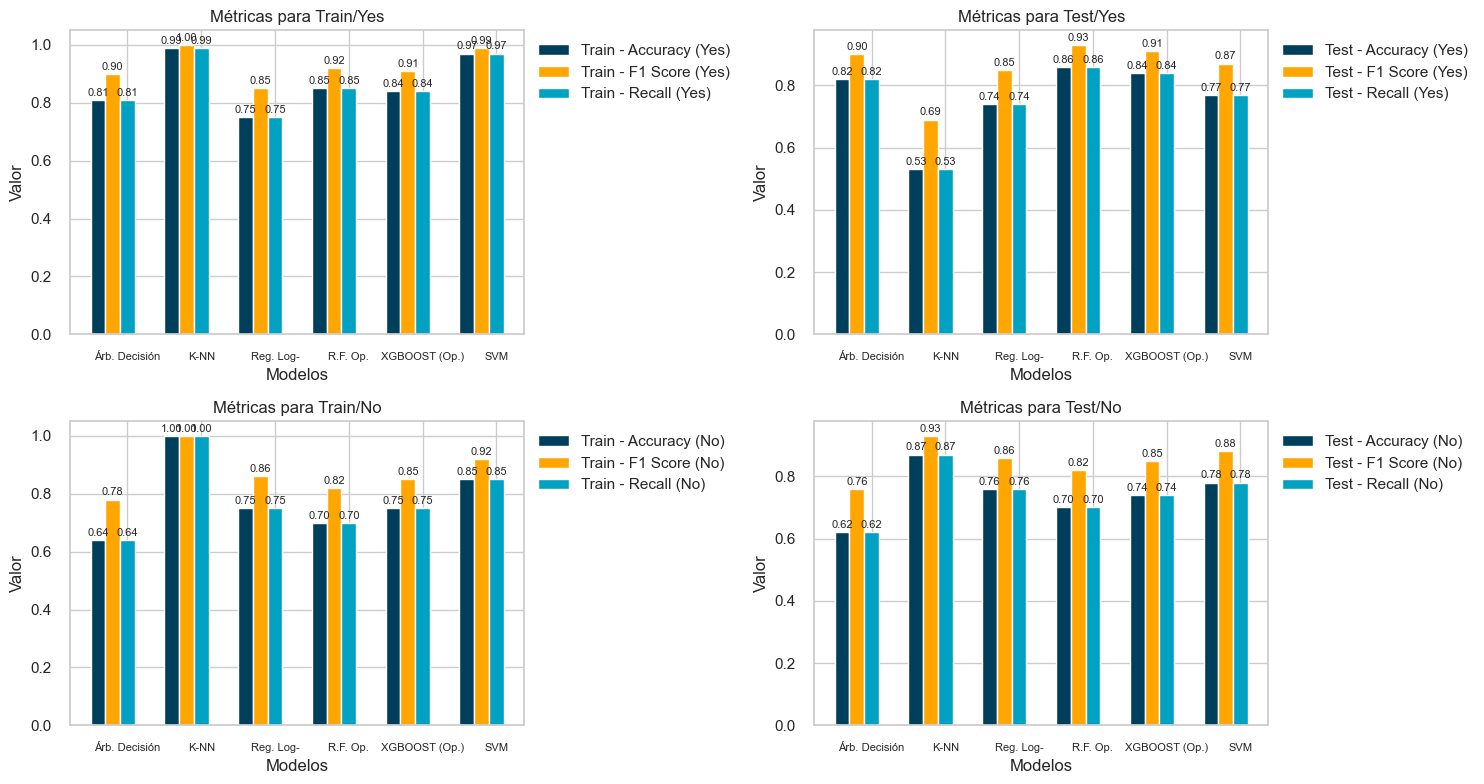

In [87]:
paleta = ["#003f5c","#ffa600","#00a1c1"]

metricas_train_yes = ["Train - Accuracy (Yes)",
                      "Train - F1 Score (Yes)",
                      "Train - Recall (Yes)"]

metricas_test_yes = ["Test - Accuracy (Yes)",
                     "Test - F1 Score (Yes)",
                     "Test - Recall (Yes)"]

metricas_train_no = ["Train - Accuracy (No)",
                     "Train - F1 Score (No)",
                     "Train - Recall (No)"]

metricas_test_no = ["Test - Accuracy (No)",
                    "Test - F1 Score (No)",
                    "Test - Recall (No)"]

# Crear un gráfico de barras para Train/Yes
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
bar_width = 0.2
index = np.arange(len(models))

for i, metrica in enumerate(metricas_train_yes):
    valores = metricas_df[metrica]
    bars = axes[0, 0].bar(index + i * bar_width, valores, bar_width, label=metrica, color=paleta[i])
    
    # Agregar etiquetas a las barras
    for bar in bars:
        height = bar.get_height()
        axes[0, 0].annotate(f"{height:.2f}",  # Texto de la etiqueta
                           xy=(bar.get_x() + bar.get_width() / 2, height),  # Posición de la etiqueta
                           xytext=(0, 3),  # Desplazamiento vertical
                           textcoords="offset points",
                           ha="center",  # Alineación horizontal centrada
                           fontsize=8)  # Tamaño de la letra
axes[0, 0].set_xticks(index + 2 * bar_width)
axes[0, 0].set_xticklabels([model[0] for model in models], fontsize=8) 
axes[0, 0].set_title("Métricas para Train/Yes")
axes[0, 0].set_xlabel("Modelos")
axes[0, 0].set_ylabel("Valor")
axes[0, 0].legend(loc="upper left", bbox_to_anchor=(1, 1)) 

for i, metrica in enumerate(metricas_test_yes):
    valores = metricas_df[metrica]
    bars = axes[0, 1].bar(index + i * bar_width, valores, bar_width, label=metrica, color=paleta[i])
    
   
    for bar in bars:
        height = bar.get_height()
        axes[0, 1].annotate(f"{height:.2f}", 
                           xy=(bar.get_x() + bar.get_width() / 2, height),  
                           xytext=(0, 3),  
                           textcoords="offset points",
                           ha="center", 
                           fontsize=8)  # Tamaño de la letra


axes[0, 1].set_xticks(index + 2 * bar_width)
axes[0, 1].set_xticklabels([model[0] for model in models], fontsize=8)  
axes[0, 1].set_title("Métricas para Test/Yes")
axes[0, 1].set_xlabel("Modelos")
axes[0, 1].set_ylabel("Valor")
axes[0, 1].legend(loc="upper left", bbox_to_anchor=(1, 1))
for i, metrica in enumerate(metricas_train_no):
    valores = metricas_df[metrica]
    bars = axes[1, 0].bar(index + i * bar_width, valores, bar_width, label=metrica, color=paleta[i])  
    for bar in bars:
        height = bar.get_height()
        axes[1, 0].annotate(f"{height:.2f}", 
                           xy=(bar.get_x() + bar.get_width() / 2, height), 
                           xytext=(0, 3),  
                           textcoords="offset points",
                           ha="center",  
                           fontsize=8)  


axes[1, 0].set_xticks(index + 2 * bar_width)
axes[1, 0].set_xticklabels([model[0] for model in models], fontsize=8)  
axes[1, 0].set_title("Métricas para Train/No")
axes[1, 0].set_xlabel("Modelos")
axes[1, 0].set_ylabel("Valor")
axes[1, 0].legend(loc="upper left", bbox_to_anchor=(1, 1))

for i, metrica in enumerate(metricas_test_no):
    valores = metricas_df[metrica]
    bars = axes[1, 1].bar(index + i * bar_width, valores, bar_width, label=metrica, color=paleta[i])
    for bar in bars:
        height = bar.get_height()
        axes[1, 1].annotate(f"{height:.2f}", 
                           xy=(bar.get_x() + bar.get_width() / 2, height), 
                           xytext=(0, 3),  
                           textcoords="offset points",
                           ha="center",  
                           fontsize=8)  

axes[1, 1].set_xticks(index + 2 * bar_width)
axes[1, 1].set_xticklabels([model[0] for model in models], fontsize=8)  
axes[1, 1].set_title("Métricas para Test/No")
axes[1, 1].set_xlabel("Modelos")
axes[1, 1].set_ylabel("Valor")
axes[1, 1].legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### **Evaluación de la matriz de Confusión de los Modelos:**

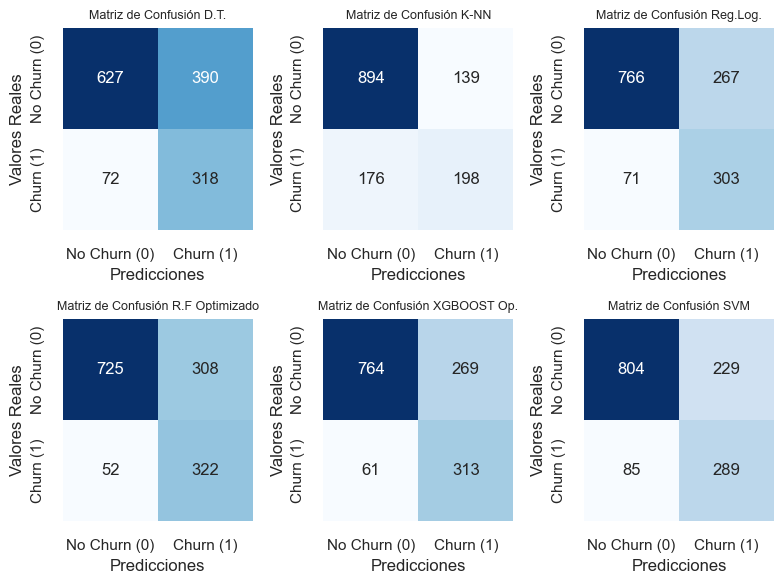

In [88]:
confusion_matrices = [
    ("Matriz de Confusión D.T.", conf_matrix_arb),
    ("Matriz de Confusión K-NN", confusion_mat_knn),
    ("Matriz de Confusión Reg.Log.", cnf_matrix_rl),
    ("Matriz de Confusión R.F Optimizado", confusionbosque),
    ("Matriz de Confusión XGBOOST Op.", conf_matrix_xgb_op),
    ("Matriz de Confusión SVM",conf_matrix_svm)
]

fig, axes = plt.subplots(2, 3, figsize=(8, 6))
for i, (title, conf_matrix) in enumerate(confusion_matrices):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["No Churn (0)", "Churn (1)"],
                yticklabels=["No Churn (0)", "Churn (1)"],
                ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(title, fontsize=9)
    axes[i // 3, i % 3].set_xlabel('Predicciones')
    axes[i // 3, i % 3].set_ylabel('Valores Reales')

plt.tight_layout()
plt.show()

<a id="Conclusiones"></a>

<div style="padding: 24px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px;">11. 🥁Conclusiones Generales Sobre los Modelos🥁</span>
</div>


[Volver al Indice](#indi)

### **Análisis del Los Modelos Supervisados de Clasificación.**
#### (Antes del Ajuste de los Hiperparametros)

- De los modelos seleccionados intenté hacerlos funcionar sin hacer el OHE y no se pudo, asi que los  modelos fueron probados con datos codificados con Label Encoding para evitar agregar mas features y OneHotEncoding cuando hubo mas de 2 datos unicos por feature para evitar que por razones de codificaciones que esto afecte el rendimiento de los modelos.

- Matrices de Confusión: en vista de la hipotesis del problema que es predecir cuando los clientes se van o se quedan tomo como criterio en las matrices los falsos negativos ya que estos hacen referencia a los clientes que asumen que no se iran y en realidad puede ser que si, esto por sobre los falsos positivos ya que esto implicaria quiza un esfuerzo extra haciendo alguna campaña para tratar de retenerlos y esto podria fidelizarlos mas con la marca. Para los modelos de arbol de desición clasifico 193 datos como falsos negativos, el K-NN 120 casos y la regresion logistica 105 esto muestra que hay una mayor presicion en la regresión logisti cuya extactitud esl 80% por encima de los otros dos modelos. (ESTE ANALISIS FUE REALIZADO EN BASE A RESULTADOS INICIALES ANTES DE AJUSTAR HIPERPARAMETROS.)

- Los modelos parecián tener debilidad para predecir cuando si los clientes se van, esto esta determinado o sesgado por el data set esta desbalanceado teniendo mas casos en los que se quedaron y menos casos para aprender de los que si se fueron esto afecta su precision. 

- Precisión (Accuracy): Mide la proporción de predicciones correctas en general. Un mayor valor de precisión indica un mejor rendimiento en términos de clasificación general.

- Puntaje F1 (F1 Score): Es una métrica que combina precisión y recall. Es útil cuando las clases están desequilibradas. Un F1 Score más alto es deseable.

- Recall (Sensibilidad): Mide la proporción de ejemplos positivos que se clasifican correctamente. En problemas donde la identificación de los positivos es crítica, un recall más alto es importante.

### **Análisis del Los Modelos Supervisados de Clasificación.**
#### (Después del Ajuste de los Hiperparametros)

#### En base a los resultados del DataFrame anterior donde se evaluan los resultados para cada etiqueta tanto los set de prueba como de entrenamiento, aquí hay algunas observaciones generales: 

### **Árbol de Decisión:**

- Tiene un rendimiento razonable tanto en precisión como en F1-score y recall, aunque ligeramente inferior en la predicción de la clase "No" en comparación con otros modelos. No hay indicios claros de overfitting o underfitting. El rendimiento es bastante consistente entre el conjunto de entrenamiento y prueba.

### **K-NN (Vecinos más Cercanos):**

- Muestra un rendimiento notablemente alto en la precisión de la clase "Yes", pero tiene una baja precisión en la clase "No". Esto indica que K-NN es efectivo para predecir la clase mayoritaria, pero menos preciso para la clase minoritaria. Hay una diferencia significativa entre la precisión del conjunto de entrenamiento y prueba, lo que sugiere cierto grado de overfitting. El modelo parece haberse adaptado demasiado a los datos de entrenamiento y podría no generalizar bien a nuevos datos.

### **Regresión Logística:**

- Ofrece un equilibrio sólido entre precisión, F1-score y recall para ambas clases. Es un modelo que generaliza bien para ambas clases en el conjunto de prueba. No se observan señales evidentes de overfitting o underfitting. El modelo generaliza bien a nuevos datos.

### **Random Forest Optimizado:**

- Presenta buenos resultados en términos de precisión, F1-score y recall para ambas clases. Es un modelo robusto y equilibrado en la clasificación de ambas clases. El rendimiento es bastante equilibrado entre el conjunto de entrenamiento y prueba, indicando una buena capacidad de generalización. No hay indicios fuertes de overfitting o underfitting.

### **XGBoost (Optimizado):**

- Similar al Random Forest, el modelo XGBoost muestra un rendimiento sólido en ambas clases, aunque ligeramente inferior en la precisión de la clase "No". Similar al Random Forest, muestra un buen equilibrio entre el rendimiento en los conjuntos de entrenamiento y prueba. No hay señales claras de overfitting o underfitting.

### **SVM (Support Vector Machine):**

- Es el modelo con el mejor rendimiento en términos de F1-score y recall para ambas clases. Proporciona una alta precisión en la clase "Yes" y una precisión razonable en la clase "No". Este modelo ha demostrado ser eficaz en la clasificación desbalanceada. Aunque hay una pequeña brecha entre el rendimiento en entrenamiento y prueba, no es lo suficientemente grande como para indicar overfitting significativo. El modelo SVM generaliza bien.

### En general, el modelo Support Vector Machine (SVM) se destaca como el más efectivo para el problema de clasificación desbalanceada, mostrando un buen equilibrio entre precisión y recall para ambas clases. **Esto se refleja en que el SVM tuvo las mejores marcas el en F1 Score siendo en el conjunto prueba para las dos clases de un 0.87** La mayoría de los modelos presentan un buen equilibrio entre sesgo (bias) y varianza, indicando que han logrado un nivel adecuado de generalización en nuevos datos. Sin embargo, es importante señalar que la presencia de overfitting en algunos modelos, como K-NN, sugiere que puede ser necesario ajustar parámetros o considerar técnicas adicionales para mejorar la generalización.


<a id="Reducción-de-Dimensionalidad-MCA"></a>

<div style="padding: 24px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px;">12. Reducción de Dimensionalidad (MCA)</span>
</div>

### MCA (Multiple Correspondence Analysis) es una técnica estadística utilizada para analizar la asociación entre categorías en tablas de contingencia con más de dos variables categóricas. Su objetivo principal es explorar y visualizar la estructura de dependencia entre las diferentes categorías de las variables categóricas. En este caso se usará para reducir la cantidad de variables categóricas de 37 a 9 componentes, para después estas ser usadas en un modelo de ML.

[Volver al Indice](#indi)

In [89]:
df_mca_

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7027       1              0        1           1      24             1   
7028       0              0        1           1      72             1   
7029       0              0        1           1      11             0   
7030       1              1        1           0       4             1   
7031       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges Churn  MultipleLines_No  \
0                    1           29.85    No               0.0   
1                    0           56.95    No               1.0   
2                    1           53.85   Yes               1.0   
3                    0           42.30    No               0.0   
4                    1           70.70   Yes               1.0   
...                ...             ...   ...               ...   
7027                 1           84.80    No               0.0   
7028                 1          103.20    No               0.0   
7029                 1           29.60    No               0.0   
7030                 1           74.40   Yes               0.0   
7031                 1          105.65    No               1.0   

      MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                                1.0                0.0                  1.0   
1                                0.0                0.0                  1.0   
2                                0.0                0.0                  1.0   
3                                1.0                0.0                  1.0   
4                                0.0                0.0                  0.0   
...                              ...                ...                  ...   
7027                             0.0                1.0                  1.0   
7028                             0.0                1.0                  0.0   
7029                             1.0                0.0                  1.0   
7030                             0.0                1.0                  0.0   
7031                             0.0                0.0                  0.0   

      InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                             0.0                 0.0                1.0   
1                             0.0                 0.0                0.0   
2                             0.0                 0.0                0.0   
3                             0.0                 0.0                0.0   
4                             1.0                 0.0                1.0   
...                           ...                 ...                ...   
7027                          0.0                 0.0                0.0   
7028                          1.0                 0.0                1.0   
7029                          0.0                 0.0                0.0   
7030                          1.0                 0.0                1.0   
7031                          1.0                 0.0                0.0   

      OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                                    0.0                 0.0              0.0   
1                                    0.0                 1.0              1.0   
2                                    0.0                 1.0              0.0   
3                                    0.0                 1.0              1.0   
4                                    0.0     

In [90]:
#df_NOcodificado_cat = df_NOcodificado_cat.reset_index(drop=True)
#df_codificado_cat = df_2.drop(["tenure", "MonthlyCharges","Prob_Churn_Yes"], axis=1)
#df_codificado_cat = df_1.iloc[:4900, :]
#df_codificado_cat = df_codificado_cat.reset_index(drop=True)
df_mca_
df_codificado = df_mca_.loc[:, (df_mca_.columns != "Churn") & (df_mca_.columns != "tenure") & (df_mca_.columns != "MonthlyCharges")]
df_codificado_churn = df_mca_.loc[:, ['Churn', 'tenure', 'MonthlyCharges']]
df_codificado_churn

Churn  tenure  MonthlyCharges
0       No       1           29.85
1       No      34           56.95
2      Yes       2           53.85
3       No      45           42.30
4      Yes       2           70.70
...    ...     ...             ...
7027    No      24           84.80
7028    No      72          103.20
7029    No      11           29.60
7030   Yes       4           74.40
7031    No      66          105.65

[7032 rows x 3 columns]

### Se aplica MCA para reducir de 37 variables a 9 variables.

In [91]:
import prince

# Extraer solo las columnas categóricas
df_categoricas = df_codificado.select_dtypes(include=['object'])

# Realizar el MCA
mca = prince.MCA(
    n_components=9,  # Elige el número de dimensiones principales
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42,
    one_hot=False
)
mca = mca.fit(df_codificado)
mca_resultado = mca.transform(df_codificado)
mca_resultado

0         1         2         3         4         5         6  \
0    -0.572775 -0.445341  0.650823  0.532913 -0.347551  0.011714  0.508508   
1    -0.253262 -0.109297  0.710543 -0.257313  0.727384  0.079882 -0.151227   
2    -0.296444 -0.349296  0.620217 -0.393580  0.127715 -0.006614 -0.175131   
3    -0.474621  0.440877  1.166652  0.302634  0.218567  0.563188  0.462208   
4    -0.466161 -0.886078 -0.084888 -0.174971 -0.003318 -0.045608 -0.110737   
...        ...       ...       ...       ...       ...       ...       ...   
7027 -0.251763  0.633657  0.196743  0.098084  0.532849  0.113632 -0.336551   
7028 -0.346997  0.528249 -0.472062  0.031917  0.411665 -0.288194  0.376694   
7029 -0.499500 -0.325311  0.816931  0.367853 -0.315942  0.005568  0.245288   
7030 -0.366352 -0.573469 -0.107120 -0.158335 -0.134787 -0.029681  0.044043   
7031 -0.289569  0.659429 -0.154566 -0.103468 -0.082420  0.344122 -0.574703   

             7         8  
0     0.416620 -0.355845  
1    -0.017223  0.261081  
2     0.579635  0.050613  
3    -0.394899  0.527312  
4    -0.133856 -0.049937  
...        ...       ...  
7027 -0.092965 -0.166766  
7028 -0.075139 -0.412775  
7029 -0.097266 -0.521358  
7030  0.193237  0.140524  
7031 -0.402929  0.457648  

[7032 rows x 9 columns]

In [92]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.586        31.34%                     31.34%
1              0.210        11.24%                     42.58%
2              0.156         8.34%                     50.92%
3              0.089         4.75%                     55.67%
4              0.080         4.26%                     59.92%
5              0.077         4.13%                     64.05%
6              0.073         3.92%                     67.97%
7              0.066         3.53%                     71.51%
8              0.062         3.31%                     74.82%

### Se observa en la tabla anterior como los componentes aportan a la varianza, de las 8 componentes se destaca una varianza de la información de los datos originales del 74.82%

### En la tabla que aparece debajo se describe la cantidad en porcentaje de contribución de la varianza por cada una de las 37 variables.

In [93]:
mca.column_contributions_.head(36).style.format("{:.0%}")

### Se aplica get dummies a la variable churn para su uso en modelo Random Forest

In [94]:
# Aplicar get dummies a la columna "Churn"
df_codificado_churn = pd.get_dummies(df_codificado_churn, columns=["Churn"], drop_first=True)

# Reorganizar las columnas
df_codificado_churn = df_codificado_churn[[ "tenure", "MonthlyCharges","Churn_Yes"]]
df_codificado_churn

tenure  MonthlyCharges  Churn_Yes
0          1           29.85          0
1         34           56.95          0
2          2           53.85          1
3         45           42.30          0
4          2           70.70          1
...      ...             ...        ...
7027      24           84.80          0
7028      72          103.20          0
7029      11           29.60          0
7030       4           74.40          1
7031      66          105.65          0

[7032 rows x 3 columns]

### Se unen los Data Frames previamente procesados para su posterior uso, vale recordar que debido a la alta correlación entre la variable "TotalCharges" y "Tenure" para evitar la multicolinealidad y que esto pueda afectar el rendimiento del modelo se sigue excluyendo.

In [95]:
df_mca = pd.concat([df_codificado_churn, mca_resultado], axis=1)
df_mca

tenure  MonthlyCharges  Churn_Yes         0         1         2  \
0          1           29.85          0 -0.572775 -0.445341  0.650823   
1         34           56.95          0 -0.253262 -0.109297  0.710543   
2          2           53.85          1 -0.296444 -0.349296  0.620217   
3         45           42.30          0 -0.474621  0.440877  1.166652   
4          2           70.70          1 -0.466161 -0.886078 -0.084888   
...      ...             ...        ...       ...       ...       ...   
7027      24           84.80          0 -0.251763  0.633657  0.196743   
7028      72          103.20          0 -0.346997  0.528249 -0.472062   
7029      11           29.60          0 -0.499500 -0.325311  0.816931   
7030       4           74.40          1 -0.366352 -0.573469 -0.107120   
7031      66          105.65          0 -0.289569  0.659429 -0.154566   

             3         4         5         6         7         8  
0     0.532913 -0.347551  0.011714  0.508508  0.416620 -0.355845  
1    -0.257313  0.727384  0.079882 -0.151227 -0.017223  0.261081  
2    -0.393580  0.127715 -0.006614 -0.175131  0.579635  0.050613  
3     0.302634  0.218567  0.563188  0.462208 -0.394899  0.527312  
4    -0.174971 -0.003318 -0.045608 -0.110737 -0.133856 -0.049937  
...        ...       ...       ...       ...       ...       ...  
7027  0.098084  0.532849  0.113632 -0.336551 -0.092965 -0.166766  
7028  0.031917  0.411665 -0.288194  0.376694 -0.075139 -0.412775  
7029  0.367853 -0.315942  0.005568  0.245288 -0.097266 -0.521358  
7030 -0.158335 -0.134787 -0.029681  0.044043  0.193237  0.140524  
7031 -0.103468 -0.082420  0.344122 -0.574703 -0.402929  0.457648  

[7032 rows x 12 columns]

In [96]:
df_mca.columns

Index(['tenure', 'MonthlyCharges', 'Churn_Yes', 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='object')

<a id="Random-Fores-Después-de-MCA"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Random Forest (Después de MCA)</span>
</div>

In [97]:
X_bosque =  df_mca.loc[:, df_mca.columns != "Churn_Yes"]
y_bosque_le = df_mca[["Churn_Yes"]]
X_train_bosque, X_test_bosque, y_train_bosque, y_test_bosque = train_test_split(X_bosque, y_bosque_le, test_size=0.2, random_state=7, stratify=y_bosque_le)
X_train_bosque.columns = X_train_bosque.columns.astype(str)
X_test_bosque.columns = X_test_bosque.columns.astype(str)
Bospeso = {0: 1, 1: 3}
bosque = RandomForestClassifier(n_estimators=99,
                                class_weight=Bospeso, max_depth=7,
                                random_state=7, min_samples_leaf=25, bootstrap=True)

bosque.fit(X_train_bosque, y_train_bosque)
y_pred_bosque = bosque.predict(X_test_bosque)

#class_report = classification_report(y_test_bosque, y_pred_bosque)
#print("Informe de Clasificación:\n", class_report)

confusionbosque = confusion_matrix(y_test_bosque, y_pred_bosque)
#print(confusionbosque)
# Calcular métricas y mostrar resultados

f1_train = f1_score(y_train_bosque, y_pred_train)
f1_test = f1_score(y_test_bosque, y_pred_bosque)

recall_train = recall_score(y_train_bosque, y_pred_train)
recall_test = recall_score(y_test_bosque, y_pred_bosque)

accuracy_train = accuracy_score(y_train_bosque, y_pred_train)
accuracy_test = accuracy_score(y_test_bosque, y_pred_bosque)

print("-" * 80)
print('Métricas en el conjunto de entrenamiento:')
print('F1-score:', f1_train)
print('Recall:', recall_train)
print('Accuracy:', accuracy_train)

print("-" * 80)
print('Métricas en el conjunto de prueba:')
print('F1-score:', f1_test)
print('Recall:', recall_test)
print('Accuracy:', accuracy_test)

print("-" * 80)
print(confusionbosque)

--------------------------------------------------------------------------------
Métricas en el conjunto de entrenamiento:
F1-score: 0.8131129167834127
Recall: 0.9705685618729097
Accuracy: 0.8814222222222222
--------------------------------------------------------------------------------
Métricas en el conjunto de prueba:
F1-score: 0.6315789473684211
Recall: 0.786096256684492
Accuracy: 0.7562189054726368
--------------------------------------------------------------------------------
[[770 263]
 [ 80 294]]


<a id="Random-Fores-Después-de-MCA-GridSearchCV"></a>

<div style="padding: 20px;
            color: #003f5c;
            margin: 0;
            font-size: 20px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px; text-align: left;">• Random Forest/GridSearchCV (Después de MCA)</span>
</div>

In [98]:
Bospeso = {0: 1, 1: 3}
srf_gdcv = RandomForestClassifier(class_weight=Bospeso,random_state=7)
hiperparametros={'max_depth':[10],'min_samples_leaf':[25], 'max_leaf_nodes':[10], 'n_estimators':[350],
                 "criterion": ["gini"]} #,'class_weight': [None, {0: 1, 1: 3}]}
grilla=GridSearchCV(srf_gdcv,hiperparametros,cv=5,scoring="recall", verbose=1, return_train_score = True)
grilla.fit(X_train_bosque, y_train_bosque) # se fitea conjunto de entrenamiento.
print("-"*80)
grilla.best_params_
print(grilla.best_params_)
grilla.best_score_
print("-"*80)
print(grilla.best_score_)

srf_modelo = grilla.best_estimator_
y_pred_train = srf_modelo.predict(X_test_bosque)


y_pred_test = srf_modelo.predict(X_test_bosque)
y_pred_train = srf_modelo.predict(X_train_bosque)

f1_train = f1_score(y_train_bosque, y_pred_train)
f1_test = f1_score(y_test_bosque, y_pred_test)

recall_train = recall_score(y_train_bosque, y_pred_train)
recall_test = recall_score(y_test_bosque, y_pred_test)

accuracy_train = accuracy_score(y_train_bosque, y_pred_train)
accuracy_test = accuracy_score(y_test_bosque, y_pred_test)
print("-"*80)
print('Métricas en el conjunto de entrenamiento:')
print('F1-score:', f1_train)
print('Recall:', recall_train)
print('Accuracy:', accuracy_train)
print("-"*80)
print('Métricas en el conjunto de prueba:')
print('F1-score:', f1_test)
print('Recall:', recall_test)
print('Accuracy:', accuracy_test)
cnf_rf_gdcv = confusion_matrix(y_test_bosque, y_pred_test)
print("-"*80)
print(cnf_rf_gdcv)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
--------------------------------------------------------------------------------
{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 10, 'min_samples_leaf': 25, 'n_estimators': 350}
--------------------------------------------------------------------------------
0.8093645484949834
--------------------------------------------------------------------------------
Métricas en el conjunto de entrenamiento:
F1-score: 0.6310952259382181
Recall: 0.8267558528428094
Accuracy: 0.7431111111111111
--------------------------------------------------------------------------------
Métricas en el conjunto de prueba:
F1-score: 0.6391752577319587
Recall: 0.8288770053475936
Accuracy: 0.7512437810945274
--------------------------------------------------------------------------------
[[747 286]
 [ 64 310]]


### Comparando este modelo después de MCA con el antrior sin aplicar MCA se notan ciertas mejores en las métricas mejorando los verdaderos positivos a 747 de 673 asi como la dsiminución de los falsos negativos pasando de 360 a 286 como se muestra en la matriz anterior, Se observa incremento en los valores de F1 y Accuracy. En contraste con el recall que en el modelo después de MCA se ve una caida de este valor, 

### En conclusión, la aplicación de MCA parece ser beneficioso para mejorar el rendimiento del modelo Random Forest en la tarea de clasificación del Churn. La reducción de dimensiones proporcionada por MCA podría haber contribuido a capturar patrones latentes más efectivamente, mejorando así la capacidad predictiva del modelo.

### En conclusión, la aplicación de MCA parece ser beneficioso para mejorar el rendimiento del modelo Random Forest en la tarea de clasificación del Churn. La reducción de dimensiones proporcionada por MCA podría haber contribuido a capturar patrones latentes más efectivamente, mejorando así la capacidad predictiva del modelo.

<a id="Insights"></a>

<div style="padding: 24px;
            color: #003f5c;
            margin: 0;
            font-size: 30px;
            font-family: 'Arial', sans-serif;
            text-align: center;
            border-radius: 8px;
            background-color: #ffa600;
            border: 3px solid #003f5c;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
            transform: translateY(10px);
            transition: transform 0.3s ease-in-out;
            text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">
   <span style="display: block; margin-bottom: 8px;">13. 🚀 Insights del Proyecto 🌐</span>
</div>

### Con el conjunto de datos explorado en este proyecto de **DATA SCIENCE**, se logró obtener valiosas perspectivas sobre las características del servicio y el comportamiento de los clientes, brindándonos una comprensión más profunda del funcionamiento interno de la empresa. En un mercado que evoluciona constantemente con la llegada de nuevos y atractivos servicios, especialmente en el ámbito de las transmisiones, donde cada vez más empresas se suman a la competencia, surge un desafío crucial para las compañías: retener y fidelizar a sus clientes. Por lo tanto, resulta fundamental mantenerse informado sobre los gustos y preferencias de la audiencia.

### Durante el desarrollo de este proyecto, se examinó minuciosamente el comportamiento de 7,043 clientes a partir de una base de datos con 22 columnas. Utilizando el algoritmo de K-Means, los clientes fueron categorizados en 4 segmentos, considerando variables clave como el tiempo de permanencia, el costo mensual y el gasto total. Además, se implementaron cinco modelos de clasificación con el objetivo principal de determinar si un cliente optaría por quedarse o abandonar la empresa. Siendo los que mejores resultados obtuvieron en primer lugar el SVM, el XGBoost (Algoritmo de Boosting) y el Random Forest o Bosque Aleatorio (Algoritmo de Bagging). Estos modelos fueron sometidos a pruebas rigurosas, y se realizaron ajustes para optimizar su rendimiento, garantizando así la obtención de resultados de alta calidad. Sin embargo estos modelos se vieron afectados por el desbalanceo entre los clientes que se fueron que representan un 27% y los que se quedaron 73%. Alimentar estos modelos con más datos de clientes con la caractrística de haberse dado la baja o saber el motivo por el cual lo hicieron puede ser nuestro proximo desafío.

### Si bien las técnicas de Machine Learning contribuirán significativamente a fortalecer nuestro poder de predicción, es importante destacar que a lo largo del proyecto, el análisis estadístico, especialmente en el ámbito descriptivo, nos permitió identificar patrones de comportamiento que podrían estar ejerciendo influencia en la decisión de los clientes de dar de baja el servicio. Este enfoque integral nos proporciona una visión completa y enriquecedora para abordar los desafíos presentes y futuros en el sector.

[Volver al Indice](#indi)